In [1]:
# Run this again after editing submodules so Colab uses the updated versions
from citylearn import  CityLearn
from pathlib import Path
from agent_final import Agent
import numpy as np                                                                                                                                                                                      
import torch
import matplotlib.pyplot as plt

In [2]:
# Load environment
climate_zone = 1
end_time = 8759 # total number of hours to train for
cost_analysis = 24 # analyze costs every x hours
checkpoint = 24 * 7 # save parameters every x hours

params = {'data_path':Path("data/Climate_Zone_"+str(climate_zone)), 
        'building_attributes':'building_attributes.json', 
        'weather_file':'weather_data.csv', 
        'solar_profile':'solar_generation_1kW.csv', 
        'carbon_intensity':'carbon_intensity.csv',
        'building_ids':["Building_"+str(i) for i in [1,2,3,4,5,6,7,8,9]],
        'buildings_states_actions':'buildings_state_action_space.json', 
        'simulation_period': (0, end_time), 
        'cost_function': ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption','carbon_emissions'], 
        'central_agent': False,
        'cost_analysis' : cost_analysis,
        'save_memory': False }

# Contain the lower and upper bounds of the states and actions, to be provided to the agent to normalize the variables between 0 and 1.
env = CityLearn(**params)
env.pretrain_baseline_model((0, end_time))

observations_spaces, actions_spaces = env.get_state_action_spaces()

# Provides information on Building type, Climate Zone, Annual DHW demand, Annual Cooling Demand, Annual Electricity Demand, Solar Capacity, and correllations among buildings
building_info = env.get_building_information()

Time taken to add RBC pretrained model (sec): 33.776


In [3]:
params_agent = {'building_ids':["Building_"+str(i) for i in [1,2,3,4,5,6,7,8,9]],
                 'buildings_states_actions':'buildings_state_action_space.json', 
                 'building_info':building_info,
                 'observation_spaces':observations_spaces, 
                 'action_spaces':actions_spaces}

# Instantiating the control agent(s)
agents = Agent(**params_agent)

state = env.reset()
rewards = []
done = False

action, coordination_vars = agents.select_action(state)    
while not done:
    next_state, reward, done, _ = env.step(action)
    action_next, coordination_vars_next = agents.select_action(next_state)
    agents.add_to_buffer(state, action, reward, next_state, done, coordination_vars, coordination_vars_next)
    coordination_vars = coordination_vars_next
    state = next_state
    action = action_next
    
    rewards.append(reward)
    
    try:
        print(f"\r {env.time_step}\t{env.costs_periodic[-1]['total']}", end="")
    except:
        print(f"\r {env.time_step}", end="")

 8759	0.9649196712315076

In [4]:
env.cost((0, end_time))

({'ramping': 0.83390313,
  '1-load_factor': 1.0100231577754115,
  'average_daily_peak': 0.98613054,
  'peak_demand': 0.9535845,
  'net_electricity_consumption': 1.002115,
  'carbon_emissions': 1.0026097,
  'total': 0.9647276767392969,
  'coordination_score': 0.9459103298634315},
 <citylearn.CityLearn at 0x7f95ef412f10>)

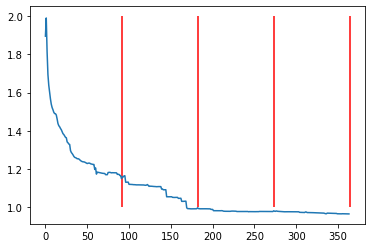

In [289]:
total = [x["total"] for x in env.costs_periodic]
plt.plot(total)
SEASON = 2190//24
plt.vlines(SEASON, 1.0, 2.0, colors='r')
plt.vlines(2 * SEASON, 1.0, 2.0, colors='r')
plt.vlines(3 * SEASON, 1.0, 2.0, colors='r')
plt.vlines(4 * SEASON, 1.0, 2.0, colors='r')

In [292]:
total[839//24]

1.266199561637303

In [82]:
from collections import defaultdict
table = defaultdict(list)

for x in env.costs_periodic:
    for k, v in x.items():
        table[k].append(v)

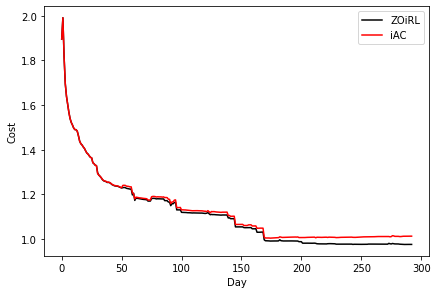

In [99]:
plt.plot(table['total'][:len(iAC)], label="ZOiRL", c='k')
plt.plot(iAC_table['total'], label='iAC', c='r')
plt.tight_layout()

plt.legend()
plt.xlabel("Day")
plt.ylabel("Cost")
plt.show()

In [258]:
marlisa = np.load("marlisa_data.npy", allow_pickle=True)
marlisa_table = defaultdict(list)

for x in marlisa:
    for k, v in x.items():
        marlisa_table[k].append(v)

In [87]:
iAC = np.load("data_dump_iAC_citylearn.npy", allow_pickle=True)

In [91]:
iAC_table = defaultdict(list)

for x in iAC:
    for k, v in x.items():
        iAC_table[k].append(v)

In [106]:
# TD3
ramping = [1.6408246, 1.4672998, 1.3830278, 1.4102416, 1.3850541, 1.3373524, 1.2857156, 1.2383511, 1.2096213, 1.1981359, 1.2008797, 1.1899372, 1.1858847, 1.1842233, 1.1686779, 1.1558695, 1.1514367, 1.1568676, 1.1571136, 1.148671, 1.1397798, 1.1324131, 1.131419, 1.1319308, 1.1334032, 1.134596, 1.1304994, 1.1278232, 1.1204554, 1.1152571, 1.1163068, 1.1155102, 1.1163634, 1.1146011, 1.1070217, 1.1024026, 1.0954634, 1.0954148, 1.0952126, 1.0978539, 1.100697, 1.0970919, 1.0931375, 1.0908266, 1.0901895, 1.0895677, 1.0922472, 1.0910561, 1.0896846, 1.0875734, 1.0857042, 1.0876977, 1.0873407, 1.0891107, 1.0907421, 1.0915874, 1.0906432, 1.0892891, 1.089237, 1.0931611, 1.0940537, 1.0948043, 1.0912731, 1.0913295, 1.0903126, 1.0903635, 1.0937033, 1.0942866, 1.0944316, 1.0946215, 1.0973945, 1.1002713, 1.100023, 1.1039792, 1.1051707, 1.1057757, 1.1061488, 1.1079739, 1.1078157, 1.1087136, 1.1130307, 1.1133378, 1.112504, 1.1148671, 1.1178775, 1.1193519, 1.1182108, 1.121588, 1.121665, 1.1220908, 1.1218873, 1.1208982, 1.1248231, 1.1270224, 1.129939, 1.130632, 1.1301627, 1.1309204, 1.1326156, 1.1350209, 1.1387016, 1.1423805, 1.1426716, 1.1421475, 1.1418895, 1.1420102, 1.1436352, 1.1452799, 1.1475186, 1.1457891, 1.1457397, 1.1446786, 1.144607, 1.1479313, 1.1503305, 1.1515608, 1.1502663, 1.1489729, 1.1471792, 1.1464882, 1.1484064, 1.1485231, 1.1493578, 1.1477966, 1.1487696, 1.1487213, 1.1487787, 1.1499672, 1.1504023, 1.1529696, 1.1519735, 1.151791, 1.151225, 1.1516937, 1.1544129, 1.1563408, 1.1583738, 1.1579839, 1.1590598, 1.1599132, 1.1627249, 1.1634243, 1.166161, 1.1679602, 1.166444, 1.1675959, 1.167341, 1.166951, 1.1670514, 1.1679454, 1.1698384, 1.1706797, 1.1705751, 1.170086, 1.171258, 1.1728595, 1.173028, 1.1749095, 1.1752468, 1.1740024, 1.1742121, 1.1737752, 1.1755046, 1.176316, 1.1778072, 1.1780703, 1.1792399, 1.1790025, 1.179197, 1.1808813, 1.1816906, 1.1821355, 1.1824687, 1.1813176, 1.1796254, 1.1810279, 1.1834228, 1.1836236, 1.1845435, 1.1861641, 1.1865599, 1.186062, 1.1863283, 1.1881816, 1.1886065, 1.1900438, 1.1898905, 1.1910397, 1.1905824, 1.1920193, 1.1945692, 1.1955645, 1.1965659, 1.1968961, 1.197513, 1.1966634, 1.1964326, 1.1983043, 1.1981975, 1.1985868, 1.199487, 1.1989886, 1.1986393, 1.1998259, 1.2015804, 1.2012684, 1.2019242, 1.2009636, 1.2012843, 1.2015798, 1.202334, 1.204067, 1.2047348, 1.2057117, 1.205853, 1.206182, 1.2057185, 1.2064009, 1.2075093, 1.2078366, 1.2085127, 1.2082269, 1.208193, 1.2078946, 1.2085502, 1.2096473, 1.2112484, 1.2116241, 1.2118125, 1.2117379, 1.2113214, 1.2127008, 1.213278, 1.2140453, 1.2146288, 1.214214, 1.214431, 1.2152172, 1.2159121, 1.2171816, 1.217759, 1.2182151, 1.218859, 1.2186732, 1.2189596, 1.2195908, 1.2209265, 1.221305, 1.2226617, 1.2232609, 1.2235489, 1.223478, 1.2239377, 1.2235742, 1.2232022, 1.2236648, 1.2232147, 1.2234566, 1.2231122, 1.2234848, 1.2242987, 1.2241443, 1.2245752, 1.225133, 1.2260598, 1.2262121, 1.2268368, 1.2275792, 1.2265584, 1.2276646, 1.227458, 1.2272872, 1.2268953, 1.2263064, 1.2264593, 1.2268816, 1.2276297, 1.2273965, 1.2272995, 1.227658, 1.2276592, 1.2284667, 1.2289966, 1.2298193, 1.2293501, 1.2292686, 1.2283844, 1.2280169, 1.2288016, 1.2289052, 1.2293184, 1.2295146, 1.2295331, 1.2298973, 1.2300771, 1.2303493, 1.2305806, 1.2309597, 1.2306145, 1.230985, 1.2309587, 1.2305667, 1.230897, 1.2313548, 1.2306999, 1.2306103, 1.2304888, 1.2306621, 1.2303252, 1.2301345, 1.2302856, 1.2307357, 1.2296064, 1.2291185, 1.2287303, 1.2280276, 1.227931, 1.2275819, 1.2270509, 1.2266374, 1.2261204, 1.2258537, 1.2246544, 1.223896, 1.2239709, 1.2235272, 1.2222168, 1.2213695, 1.2209129, 1.2203488, 1.2201588, 1.2196429, 1.2189369, 1.218543, 1.2176169, 1.2166579, 1.2162201, 1.2154132, 1.2146187, 1.2144132, 1.2145897, 1.2137747, 1.2132587, 1.2126861, 1.2118379, 1.2115669, 1.2112164, 1.2111018, 1.2109988, 1.2109033, 1.2106153, 1.2100203, 1.2092547, 1.2093625, 1.2095809, 1.2092957, 1.2086278, 1.2084969, 1.2080028, 1.2073747, 1.2071042, 1.2068822, 1.2065532, 1.205801]
load_factor = [0.8871146196529502, 0.969647028884587, 1.0086387485428618, 1.0822452787112709, 1.0783466760101132, 1.074393847581331, 1.0762324734191242, 1.0751104800575186, 1.0780890578042175, 1.1056943464737388, 1.112949574868301, 1.1129904204365335, 1.1129944360323685, 1.1215404477096051, 1.1161062307628846, 1.111653329070037, 1.1099625147623708, 1.1158830139644673, 1.1181880784433478, 1.1191000499747734, 1.148039412133053, 1.1456831419058393, 1.1448496523597609, 1.1442721012974706, 1.1424063308700814, 1.1606730969831327, 1.1552354295208778, 1.1554123661239553, 1.15487787162458, 1.158031344770131, 1.147950230235671, 1.2281138094216681, 1.2182272948007113, 1.201069942595552, 1.1920537123709427, 1.1780666206802177, 1.1808582661446043, 1.181839393708981, 1.1814330428515079, 1.1825965494270183, 1.1825035379728985, 1.1814911466032383, 1.1756406297660285, 1.1747254389800994, 1.173457122928126, 1.1758384779937383, 1.1738298815291666, 1.174904232697012, 1.1724498383106485, 1.1708315995857341, 1.1686588548273185, 1.1784115746858612, 1.1827273607366313, 1.1821152340916352, 1.186499046021522, 1.1847088720745884, 1.1827743168998968, 1.1829932704805604, 1.1851412096276026, 1.1572687602815392, 1.2984648121940587, 1.2023664504879106, 1.1834161291472185, 1.1781564212205817, 1.1821077683961803, 1.1804559438236422, 1.1784542712710009, 1.1786866887390963, 1.1748677538824694, 1.1748515463346534, 1.1721061119727167, 1.1772727380650676, 1.1412050651101096, 1.1413644010160366, 1.142017695807513, 1.1951555077316582, 1.19730587537399, 1.1958589133883575, 1.196959065261825, 1.198205163897823, 1.2010085814864768, 1.203024976937154, 1.2034346327348582, 1.203367356079681, 1.2020706287049827, 1.2074336550293272, 1.1738970916666536, 1.1740339506182116, 1.1752096351183403, 1.1745194537560215, 1.1740608668724295, 1.119244715016746, 1.1538141702241262, 1.1838264763991067, 1.1867131661960952, 1.195997416163964, 1.1841818205163186, 1.1881653366164584, 1.1857190826721644, 1.1913552028038477, 1.1952313664827687, 1.1974472877514217, 1.197421238215457, 1.1976910113103383, 1.196956841745166, 1.1954305830994105, 1.1954442351797014, 1.1941366412192038, 1.1927686029880538, 1.1915734375032512, 1.1907523892845386, 1.1893958930906239, 1.1876792031095418, 1.1872689516432207, 1.1871708986242566, 1.1869200223552043, 1.1877412684858788, 1.1884139142926036, 1.1883325287713074, 1.1868898983696154, 1.1876896124315475, 1.2231748428380085, 1.2502930531599998, 1.2285214717671098, 1.2256509182065662, 1.2219514933661992, 1.2149017184926683, 1.2156150512776756, 1.212640251202843, 1.2104312592988837, 1.210646819901384, 1.20800943750298, 1.2080449065498526, 1.2055851977900283, 1.207321506676953, 1.207878704603417, 1.2084778263932565, 1.2082700819986176, 1.209290654602829, 1.2018574009307488, 1.2026066906846422, 1.201006293325359, 1.2019427915608574, 1.2034015420599389, 1.2043081003207459, 1.1761028940365144, 1.1787897055926888, 1.178993231789954, 1.1790217685724296, 1.1794991797894676, 1.1797444537988426, 1.1798922685261237, 1.1974589351752447, 1.1928030330845902, 1.1834829337303046, 1.1915558995095017, 1.1937032616754073, 1.1945344799930382, 1.19400243793458, 1.1721918872982873, 1.1718299456182861, 1.171863314444826, 1.1785962714045024, 1.1742862246432852, 1.175225744835796, 1.1755906610717632, 1.1762420046537168, 1.1757731966719116, 1.1752706287085788, 1.1672713438910043, 1.165266329070793, 1.166469738617738, 1.1671698482534465, 1.1678194615981279, 1.1681489901351254, 1.167970918101987, 1.1682023347700774, 1.1682302690320574, 1.168391971797323, 1.1684278880813215, 1.1683462525894628, 1.1681825778865274, 1.2038916832842306, 1.1779241161272525, 1.171295444716891, 1.1724713387098438, 1.173413929155049, 1.1744647783322217, 1.174661696265923, 1.1738842575379624, 1.1746427547489027, 1.1753788645193701, 1.1774820147232192, 1.178081502046263, 1.1774701245776784, 1.1768192092888248, 1.175753692537045, 1.176223775920904, 1.1619514730347085, 1.1625566328518742, 1.1626810164119066, 1.1555867653821996, 1.1566268775452848, 1.1564202339723424, 1.156625464638314, 1.1567681125268654, 1.1566606520779772, 1.156855297841014, 1.1569121252307386, 1.1569339572266553, 1.1565897560643574, 1.1566036234501, 1.1598974858826927, 1.1732501882131237, 1.1725803910486632, 1.1687282297019155, 1.1675514477968538, 1.165352219292295, 1.1663251478253347, 1.1665399995882448, 1.167456352460824, 1.167447196580444, 1.1664675244004385, 1.1671648080841301, 1.1667802838602719, 1.1673899609242906, 1.1682855573539137, 1.1686338345620912, 1.1650420480678085, 1.1453773807561798, 1.1458066281398758, 1.1458385732398613, 1.1462146021183135, 1.1461496504279285, 1.1461374379721305, 1.1463414287789753, 1.146526303962648, 1.1464404969411657, 1.1463562385167918, 1.1469201515631822, 1.1471255954736432, 1.1472795059701737, 1.147482190283205, 1.1541898949860039, 1.158352954289077, 1.1567987616301185, 1.1565592084927598, 1.153356946923094, 1.1545451432710048, 1.1544833659469431, 1.1547107535475036, 1.1533554819607459, 1.1521529629467047, 1.1518393760146612, 1.1517994636573796, 1.1517534882803404, 1.1514333389119364, 1.1515401933610379, 1.1510208732956397, 1.1500491081172959, 1.1500864998596076, 1.1508433140058532, 1.1510836896325696, 1.1511279786611524, 1.1512676857149406, 1.1512978822615276, 1.1510602163327568, 1.1509957510381168, 1.1509544661930264, 1.1508181331795386, 1.1504636962269243, 1.1504261523037669, 1.1502639206763856, 1.1909331364203306, 1.1559508102613822, 1.176554668895657, 1.1813522192040633, 1.1768858483758897, 1.1615864463138614, 1.1625659615963544, 1.1611605816945985, 1.16120537040955, 1.15813477337556, 1.157658340969137, 1.1560067340688527, 1.1515384972011233, 1.15158264825473, 1.1511777758441333, 1.1510281669578912, 1.1510169793493725, 1.1510842316563314, 1.1508697083807966, 1.150944862569752, 1.150975307542244, 1.1504177261136195, 1.150046351870841, 1.1498889199893376, 1.1497100044239659, 1.14920106965894, 1.1487793207936496, 1.1483222064166418, 1.1478682873194805, 1.1479404612775022, 1.147753552806366, 1.1441447941447052, 1.1497842887755396, 1.1519755948038641, 1.1514884949803097, 1.1506951363606546, 1.1513264532671859, 1.1524125752457302, 1.1609924122362216, 1.1613959420540951, 1.1419252372505984, 1.142570942256579, 1.1424226841288099, 1.1424460825652625, 1.1428578640468312, 1.1430248322848215, 1.1428415305377477, 1.1427937651854876, 1.1426852473415736, 1.1429465124234024, 1.143377549525697, 1.1435574959809929, 1.1437871263256725, 1.143710773654478, 1.1438987586813347, 1.1437001478524498, 1.1435241884270828, 1.1434638651572837, 1.1434422676664824, 1.143459027606503, 1.1434439821559435, 1.1424733491472288, 1.148930346447039, 1.1481283366938895, 1.1521575611964483, 1.152155409946674, 1.152566539983721, 1.151771923118277, 1.1526700121281643, 1.1531098048343917, 1.1529173410915485, 1.1529186047754, 1.1528444057203822, 1.1527306569593478, 1.1535051182837481, 1.165806966380756, 1.1509244273303263, 1.1506102782275582, 1.1517127902612119, 1.152092927693698, 1.1522168619895437, 1.1520674920528695, 1.1520824697881151, 1.1517714646771071, 1.1514297499557669, 1.151050751570251, 1.1509958274928893, 1.1512109720010237, 1.151171044169073, 1.15112924344252, 1.1513252742326248]
average_daily_peak = [0.9400095, 1.0354282, 1.0718305, 1.0800471, 1.0849262, 1.1083254, 1.111899, 1.1072242, 1.1123571, 1.1134901, 1.1128566, 1.1176682, 1.1243738, 1.1231899, 1.1083543, 1.1084613, 1.110266, 1.1129931, 1.1170506, 1.122493, 1.1247315, 1.1142285, 1.1216669, 1.120724, 1.1220434, 1.1286198, 1.1280712, 1.1305441, 1.1230278, 1.125453, 1.1287407, 1.131326, 1.1340225, 1.1371638, 1.1353765, 1.1328917, 1.1320479, 1.1323929, 1.1334873, 1.1338288, 1.1345761, 1.1336886, 1.1315106, 1.133701, 1.1328374, 1.1336366, 1.1338359, 1.1350365, 1.1342554, 1.1330384, 1.1322564, 1.1335125, 1.1332718, 1.1344901, 1.1371017, 1.1386689, 1.137135, 1.1398379, 1.1392436, 1.1392267, 1.1417547, 1.1427143, 1.1424918, 1.1420124, 1.1429459, 1.143512, 1.1436726, 1.1440121, 1.1472744, 1.1498653, 1.1497228, 1.1500657, 1.1490607, 1.1526269, 1.1547619, 1.158355, 1.162047, 1.1642016, 1.1648513, 1.1644206, 1.1659368, 1.1665677, 1.1692307, 1.1725712, 1.1717588, 1.1745259, 1.1738076, 1.1771408, 1.1785772, 1.17962, 1.1801449, 1.1785488, 1.1785719, 1.1790739, 1.1814364, 1.1818694, 1.1838009, 1.1870126, 1.1883523, 1.188896, 1.1911432, 1.191766, 1.1928097, 1.1925534, 1.1937101, 1.1920216, 1.1916375, 1.1925082, 1.1924317, 1.1911278, 1.1923212, 1.194612, 1.195164, 1.1967038, 1.1973648, 1.1983778, 1.1979642, 1.1984657, 1.198066, 1.197404, 1.197434, 1.196098, 1.1978481, 1.198079, 1.1992394, 1.2003248, 1.201801, 1.2016076, 1.2006035, 1.2002383, 1.2002584, 1.2004585, 1.2010841, 1.2012599, 1.202512, 1.2033051, 1.2044649, 1.2056586, 1.2067279, 1.2074528, 1.2078211, 1.2073028, 1.2079216, 1.2079023, 1.2070076, 1.2060983, 1.2068474, 1.2079912, 1.2071953, 1.2070754, 1.2080591, 1.208863, 1.2087649, 1.2096714, 1.2106082, 1.2106853, 1.2102793, 1.2110145, 1.211734, 1.210519, 1.211466, 1.2115738, 1.2121019, 1.2113197, 1.2111319, 1.211346, 1.211117, 1.2119294, 1.2122788, 1.2114669, 1.2100894, 1.2089456, 1.208158, 1.2068075, 1.2056139, 1.206512, 1.206789, 1.207038, 1.2072458, 1.2077658, 1.2078657, 1.2084702, 1.2092657, 1.2091206, 1.2089775, 1.2084725, 1.2081647, 1.2083544, 1.208157, 1.2088783, 1.2091974, 1.2093054, 1.2085636, 1.2086644, 1.2092994, 1.2088624, 1.2088145, 1.2081668, 1.2071869, 1.2062191, 1.2060562, 1.2048059, 1.2036703, 1.2033426, 1.2032683, 1.2028226, 1.202839, 1.2019634, 1.2017245, 1.2017932, 1.2025559, 1.2027116, 1.2028546, 1.2027991, 1.2021697, 1.2028234, 1.202791, 1.202822, 1.2028805, 1.203299, 1.2034049, 1.2037349, 1.2037873, 1.2039505, 1.2036631, 1.2038176, 1.2038064, 1.2037479, 1.2037042, 1.2026299, 1.2022882, 1.2022877, 1.201587, 1.2019511, 1.2019783, 1.2017374, 1.2013696, 1.2016199, 1.2015798, 1.2016139, 1.2013338, 1.2009896, 1.2008448, 1.2009203, 1.2010581, 1.2008905, 1.2012111, 1.2010969, 1.2012968, 1.2015039, 1.2016338, 1.2021174, 1.2024736, 1.202386, 1.2025607, 1.2027295, 1.2026515, 1.2024677, 1.202831, 1.2032305, 1.2035048, 1.203771, 1.2035055, 1.203707, 1.2036246, 1.2039821, 1.20443, 1.2047645, 1.204512, 1.2046967, 1.2050964, 1.2049185, 1.2049766, 1.2050167, 1.2047724, 1.2054305, 1.2061385, 1.2067186, 1.2071602, 1.2078441, 1.2083713, 1.2084215, 1.2088743, 1.2091068, 1.2090726, 1.2088643, 1.2091322, 1.2097367, 1.2101824, 1.210687, 1.2112176, 1.2114754, 1.2117769, 1.2123795, 1.212632, 1.2124976, 1.2126896, 1.2124698, 1.2119893, 1.2123507, 1.2124388, 1.2124875, 1.2121559, 1.2118663, 1.2117324, 1.2118235, 1.211965, 1.2118101, 1.2114412, 1.2115318, 1.2114977, 1.2117792, 1.2123351, 1.2121052, 1.2122126, 1.2119514, 1.2121704, 1.2123375, 1.2123003, 1.2127194, 1.213339, 1.2133589, 1.213059, 1.2132133, 1.2132351, 1.2132896, 1.2129523, 1.2129598, 1.2130017, 1.2125965, 1.2126638, 1.2126313, 1.2124914, 1.2124462, 1.2123497, 1.2122135, 1.2116172, 1.2116512, 1.2114655, 1.2113701, 1.2113502, 1.2115264, 1.2114125, 1.2111092, 1.2109264, 1.2109075, 1.2107892, 1.210909, 1.2114897, 1.2115808, 1.2110505, 1.2112877, 1.2112435, 1.211591, 1.2114258, 1.2116232, 1.2115344, 1.211102, 1.2108195, 1.2105843, 1.2104819, 1.2103043, 1.2102988, 1.2101653]
peak_demand = [0.9400095, 0.98322135, 1.0147727, 1.0683142, 1.0683142, 1.0683142, 1.0683142, 1.0683142, 1.0683142, 1.088352, 1.0963398, 1.0963398, 1.0963398, 1.1020509, 1.1020509, 1.1020509, 1.1020509, 1.1048108, 1.1048108, 1.1048108, 1.13965, 1.13965, 1.13965, 1.13965, 1.13965, 1.1690027, 1.1665319, 1.1665319, 1.1665319, 1.1665319, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2007141, 1.2170405, 1.2170405, 1.2170405, 1.2527634, 1.2527634, 1.2527634, 1.2527634, 1.2527634, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2057023, 1.2925627, 1.2925627, 1.2925627, 1.2925627, 1.2925627, 1.2925627, 1.2925627, 1.2925627, 1.2925627, 1.2925627, 1.3002841, 1.29142, 1.29142, 1.29142, 1.2911264, 1.2911264, 1.2911264, 1.2911264, 1.2911264, 1.3313316, 1.3313316, 1.3240355, 1.3240355, 1.3240355, 1.3240355, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3385035, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3309718, 1.3310755, 1.2941571, 1.2941571, 1.2765002, 1.2765002, 1.2765002, 1.2765002, 1.1481986, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1631354, 1.1494998, 1.1494998, 1.1494998, 1.1636958, 1.147486, 1.147486, 1.147486, 1.147486, 1.147486, 1.147486, 1.1494554, 1.1301887, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.132118, 1.0920223, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.0984584, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154, 1.1078154]
net_electricity_consumption = [1.0244666, 1.0034143, 1.0039369, 0.99915016, 0.9973158, 0.9969881, 0.9947349, 0.99194777, 0.9905309, 0.9884002, 0.98820615, 0.9874182, 0.98710465, 0.98614866, 0.9838895, 0.982044, 0.9830501, 0.9832143, 0.98386383, 0.98434424, 0.98469687, 0.98519754, 0.986463, 0.9858029, 0.9861977, 0.9880799, 0.9876084, 0.9877142, 0.9874703, 0.9874979, 0.98852324, 0.98844206, 0.98839355, 0.9890601, 0.98832834, 0.9878669, 0.9875374, 0.9877527, 0.9873977, 0.9870546, 0.98714334, 0.9869522, 0.9861726, 0.98654544, 0.9863819, 0.98588705, 0.9863141, 0.98663306, 0.98642063, 0.9860313, 0.9863597, 0.9867849, 0.9863936, 0.98674655, 0.98743737, 0.98786247, 0.98747647, 0.98832434, 0.9884531, 0.9883714, 0.98865056, 0.98876786, 0.988515, 0.98828775, 0.9882188, 0.9885384, 0.9882808, 0.988042, 0.9882839, 0.9883811, 0.9882268, 0.98838425, 0.9882469, 0.98864037, 0.98888034, 0.98945516, 0.9897055, 0.9900518, 0.98995036, 0.98996323, 0.99029595, 0.9901087, 0.9906338, 0.9909353, 0.9907321, 0.9910393, 0.99095476, 0.9914255, 0.99147385, 0.9916963, 0.991505, 0.9913298, 0.9912924, 0.9914531, 0.9919664, 0.99210674, 0.99250126, 0.99250644, 0.99278086, 0.9929013, 0.9931526, 0.99333006, 0.99338746, 0.9934719, 0.9933976, 0.9932051, 0.99319065, 0.9932533, 0.9931699, 0.99338275, 0.9936135, 0.99371785, 0.993826, 0.9940515, 0.9942616, 0.9943472, 0.9944558, 0.99455374, 0.9944147, 0.99428034, 0.99437964, 0.99433875, 0.99462014, 0.9945371, 0.9947478, 0.99501747, 0.99512607, 0.99508727, 0.99510527, 0.9951919, 0.99527156, 0.99535465, 0.9953464, 0.9953435, 0.9955749, 0.99568796, 0.99575543, 0.9959886, 0.99615043, 0.9961984, 0.9961849, 0.99628985, 0.9963706, 0.9965011, 0.99653965, 0.9965324, 0.9967882, 0.996845, 0.9967283, 0.99672014, 0.9968837, 0.99702287, 0.997024, 0.9971392, 0.99722767, 0.99734515, 0.99728435, 0.9972973, 0.9973835, 0.9973707, 0.99747986, 0.99746877, 0.9975468, 0.9975964, 0.99766743, 0.99763346, 0.99768645, 0.99776226, 0.99781036, 0.9978658, 0.99782336, 0.99788034, 0.99786115, 0.99783593, 0.9978086, 0.9978767, 0.9979077, 0.99789673, 0.9979045, 0.99790543, 0.9979322, 0.9980733, 0.9981358, 0.9981385, 0.9980825, 0.9980975, 0.99812466, 0.9981718, 0.9981649, 0.99821573, 0.9983348, 0.9983473, 0.9983859, 0.99840736, 0.99841917, 0.9983921, 0.9983472, 0.9983547, 0.9983665, 0.9983556, 0.9983371, 0.9983464, 0.9983773, 0.9983969, 0.9984745, 0.99843234, 0.99842125, 0.99841523, 0.9984914, 0.9985189, 0.9985027, 0.99860203, 0.99861825, 0.9986481, 0.99861014, 0.9986216, 0.9986239, 0.9986273, 0.9986153, 0.9986406, 0.99860895, 0.9986755, 0.9987103, 0.99866927, 0.99863935, 0.9986789, 0.99866, 0.9986832, 0.9986938, 0.9986812, 0.9986651, 0.9986984, 0.9986541, 0.998669, 0.9986618, 0.9986514, 0.99865437, 0.9986846, 0.9986795, 0.9986825, 0.9986605, 0.9986605, 0.99867076, 0.99871093, 0.99874365, 0.99871916, 0.9987659, 0.99873674, 0.99869883, 0.9986571, 0.99870175, 0.9986741, 0.9987383, 0.99873704, 0.9986897, 0.9986937, 0.9987706, 0.9987349, 0.99877065, 0.9987851, 0.99876624, 0.9988069, 0.99873424, 0.99878466, 0.99877197, 0.9987391, 0.99871856, 0.9986973, 0.99868923, 0.9986625, 0.9986595, 0.9986485, 0.99857086, 0.99854493, 0.99850166, 0.99852574, 0.9985896, 0.99859977, 0.9986766, 0.99867064, 0.9987026, 0.99866617, 0.9986832, 0.9986908, 0.99867564, 0.99865496, 0.9986784, 0.99869424, 0.99869883, 0.9987687, 0.99877304, 0.9987644, 0.9988258, 0.99880415, 0.9987984, 0.9988127, 0.99880433, 0.9987203, 0.99868, 0.9987133, 0.9986882, 0.9987122, 0.99865305, 0.9986359, 0.9985746, 0.99855083, 0.99854684, 0.9985355, 0.9985097, 0.9984987, 0.9985181, 0.99858797, 0.9986465, 0.9986694, 0.99864453, 0.9986185, 0.9986201, 0.9985725, 0.99851906, 0.99856013, 0.9986119, 0.9986043, 0.9985733, 0.9985677, 0.998541, 0.9985596, 0.99855286, 0.998472, 0.99851644, 0.99850047, 0.9985143, 0.99847674, 0.99842274, 0.9983965, 0.9983829, 0.99832946, 0.99833405, 0.99830765, 0.9982689, 0.9982066, 0.99819845, 0.9982055, 0.9981502, 0.998106, 0.99806136, 0.9980539, 0.9980026, 0.9980192, 0.9980611, 0.998098, 0.9980627, 0.9980994, 0.99807125, 0.99810773, 0.998048, 0.9980865, 0.99806046, 0.9979915, 0.99790406, 0.9978745, 0.9978092, 0.9977632, 0.9978, 0.99775416]
carbon_emissions = [1.0393919, 1.0209594, 1.0145211, 1.0100087, 1.0124696, 1.0112706, 1.0074295, 1.0048945, 1.0022217, 0.9998433, 0.99970406, 0.99884963, 0.99944276, 0.99658644, 0.99409384, 0.99173915, 0.99269116, 0.99335825, 0.99308914, 0.9938515, 0.9948874, 0.9956314, 0.9969661, 0.99589825, 0.99655694, 0.9983593, 0.99826694, 0.9980757, 0.99728817, 0.997159, 0.9988942, 0.99905515, 0.9995777, 0.9998683, 0.9986484, 0.9982313, 0.9976712, 0.99750865, 0.996961, 0.99623394, 0.99597526, 0.995448, 0.9944964, 0.9949265, 0.9948387, 0.994167, 0.9951196, 0.9959074, 0.9958346, 0.995745, 0.9965012, 0.9963802, 0.9964548, 0.99713564, 0.9978289, 0.9981776, 0.9981129, 0.9988153, 0.99881625, 0.99896276, 0.9996031, 0.99957645, 0.99916404, 0.998858, 0.9986954, 0.9990134, 0.9986905, 0.9983672, 0.99856937, 0.9987428, 0.9989188, 0.9988819, 0.999104, 0.99938655, 0.99932325, 0.9996901, 1.0000018, 1.0007315, 1.0005136, 1.0008351, 1.0013218, 1.0011718, 1.0016906, 1.0020746, 1.0018817, 1.0023339, 1.0020536, 1.0026177, 1.0025043, 1.0030307, 1.0028522, 1.0027242, 1.0027283, 1.0029882, 1.0032971, 1.0032336, 1.0032967, 1.0031902, 1.0032777, 1.0035964, 1.0038645, 1.0039634, 1.0039359, 1.0038651, 1.0037626, 1.0036284, 1.0038462, 1.0037547, 1.0036901, 1.0039067, 1.0041971, 1.004162, 1.0042719, 1.0045038, 1.0045277, 1.0046319, 1.0046431, 1.0045795, 1.0042326, 1.0041519, 1.0040619, 1.0038404, 1.0041195, 1.004173, 1.0045241, 1.0047493, 1.0047685, 1.0046184, 1.004606, 1.0047337, 1.0047283, 1.0048151, 1.0047792, 1.0046382, 1.0047661, 1.004954, 1.0052242, 1.0053074, 1.0055323, 1.0056053, 1.005609, 1.0056868, 1.0056598, 1.0057262, 1.005711, 1.0055757, 1.0057187, 1.0055697, 1.0052453, 1.0050557, 1.0051161, 1.0052024, 1.0052081, 1.0052844, 1.0054022, 1.005516, 1.0053588, 1.0052326, 1.005291, 1.0052372, 1.0052961, 1.005254, 1.0053722, 1.0053465, 1.0053024, 1.0053496, 1.0053794, 1.0054449, 1.005445, 1.0055064, 1.0053632, 1.0053353, 1.0052578, 1.0052432, 1.0051392, 1.00524, 1.0052168, 1.0051913, 1.0052024, 1.005191, 1.0052078, 1.0054154, 1.005463, 1.0053744, 1.0053134, 1.0053296, 1.0053599, 1.0053475, 1.0053211, 1.0053461, 1.0054308, 1.0053897, 1.0053488, 1.0053369, 1.0053307, 1.0052382, 1.0051408, 1.0051666, 1.0051569, 1.0051017, 1.0050873, 1.0050689, 1.0050502, 1.0050333, 1.0050827, 1.0050316, 1.0050178, 1.0049896, 1.0050102, 1.0049949, 1.0050004, 1.0050834, 1.0050659, 1.0050583, 1.0049942, 1.0049787, 1.0049672, 1.0049746, 1.0049648, 1.0049671, 1.0048778, 1.0049237, 1.004897, 1.004787, 1.0047241, 1.0047711, 1.004767, 1.0047541, 1.0047463, 1.0046839, 1.0046383, 1.0046388, 1.0045793, 1.004582, 1.0045769, 1.0045468, 1.0045294, 1.0045147, 1.0044769, 1.004461, 1.004414, 1.004379, 1.0043788, 1.0044299, 1.0044475, 1.0043887, 1.0044034, 1.0043337, 1.0042403, 1.0041701, 1.0041789, 1.0041529, 1.00423, 1.0041885, 1.0040544, 1.0040882, 1.0041279, 1.0040625, 1.0040543, 1.0040512, 1.0039997, 1.0040135, 1.0039178, 1.0039358, 1.0038826, 1.0038517, 1.0038681, 1.0038264, 1.0037999, 1.0037434, 1.0037361, 1.0037127, 1.0036576, 1.0036404, 1.0035912, 1.0035874, 1.0036477, 1.0036969, 1.0037723, 1.0037978, 1.0038415, 1.0038332, 1.003864, 1.0039014, 1.0038227, 1.0037396, 1.0037712, 1.003811, 1.0038929, 1.0039998, 1.0040122, 1.0040038, 1.0040951, 1.0040886, 1.0041039, 1.0041276, 1.0041504, 1.0041052, 1.004105, 1.0041755, 1.0041715, 1.0042077, 1.0041796, 1.0041736, 1.004116, 1.0041039, 1.0041393, 1.004111, 1.004075, 1.0040566, 1.0040525, 1.0040896, 1.0041279, 1.0041994, 1.0042554, 1.0042403, 1.004256, 1.0041919, 1.0041527, 1.0041862, 1.0042417, 1.0042365, 1.0042502, 1.0042672, 1.0042356, 1.0042592, 1.0042219, 1.0041466, 1.0041801, 1.004199, 1.0042138, 1.0041991, 1.0041984, 1.0042332, 1.0042659, 1.0041939, 1.004222, 1.0041677, 1.0041587, 1.0040935, 1.0040706, 1.0040618, 1.0040095, 1.0039624, 1.0039105, 1.003908, 1.0038748, 1.0039107, 1.0039988, 1.0040467, 1.0040023, 1.0040364, 1.0039942, 1.0040282, 1.0039778, 1.0040537, 1.0040085, 1.0039698, 1.0038913, 1.0039062, 1.0038646, 1.0037935, 1.0038497, 1.0038215]
total = [1.0786361035550949, 1.0799949939893292, 1.0827879567416283, 1.1083344786843465, 1.1044044483113435, 1.0994407301142124, 1.0907209648632366, 1.0809736866974147, 1.0768557178865545, 1.0823192948841593, 1.0851559613943795, 1.0838671913923499, 1.084356679453915, 1.0856233251267526, 1.0788621028397845, 1.0753030138659738, 1.0749095499059043, 1.0778544988942544, 1.079019348142347, 1.078878458314845, 1.0886308139615843, 1.0854672843149593, 1.0868358116972023, 1.0863796735871434, 1.0867095931315571, 1.0965551019612005, 1.0943688562482825, 1.094350249148954, 1.0916085955752186, 1.0916550469109423, 1.0968548376573704, 1.1105269048823816, 1.1095497488508674, 1.1070795751526383, 1.1036904471278661, 1.1000288795739177, 1.0990487003419593, 1.0992704200193633, 1.099200968549332, 1.0997136497445967, 1.1002682353567412, 1.0992310317775185, 1.0969453531897135, 1.0969065227709165, 1.0964031170506539, 1.0966351298686638, 1.0970101524580664, 1.0973752701960762, 1.096559861940946, 1.0956556375522066, 1.0950323667126176, 1.0999712179420649, 1.1005381120594513, 1.101106451146264, 1.1087287465842488, 1.108961432946176, 1.1081508615998628, 1.1086705157365944, 1.108942366948627, 1.097115512966735, 1.1213715381127956, 1.1056552836838707, 1.1017603931043778, 1.10072437573963, 1.1013304770996684, 1.101264267201907, 1.1014172983358586, 1.1015161723557503, 1.1015215181696076, 1.1020274365909832, 1.1020119032808784, 1.1034296929360115, 1.0972237033963395, 1.0986166329461224, 1.0993093660865276, 1.1234990567644805, 1.1246286250959576, 1.1252300801751525, 1.1254421428723484, 1.1257834165441356, 1.1273594680815604, 1.1277956444060657, 1.128342734417938, 1.129396384008151, 1.1294805940272121, 1.1324948062773863, 1.1250573160670083, 1.1263710190054395, 1.1268083122515613, 1.1270139141731803, 1.1269294088041275, 1.117311987685108, 1.123726039042515, 1.1292484143371941, 1.137447273371222, 1.1391951528719424, 1.136329798427643, 1.137638409342085, 1.137796821956077, 1.1393008708197492, 1.1434327819271322, 1.1445651023001338, 1.1447881844405263, 1.1447053995199865, 1.144703318995158, 1.1441332597986225, 1.1443762231160997, 1.1445727009124689, 1.1446803845886162, 1.1440471956770628, 1.1441878967129357, 1.144178247309447, 1.1440085788164867, 1.1448271615265773, 1.1453598322208274, 1.1457235253607814, 1.1455956899694981, 1.1455815108147291, 1.1451213962890505, 1.1446196169085923, 1.1450791585428663, 1.1507464292938334, 1.1557903362043294, 1.1519351136157603, 1.1506505848722866, 1.1502893846471502, 1.1493912526295187, 1.1496445510047784, 1.1490548438744623, 1.149089411688827, 1.1489750839767496, 1.1485668005405025, 1.1485752584911941, 1.1482486795799978, 1.1492598567745003, 1.149856401108355, 1.1505446773121661, 1.1506967217483528, 1.151306094584065, 1.14419739770616, 1.1448506182144669, 1.1417017016193494, 1.142426042096411, 1.1429986219194797, 1.1427517270232543, 1.1166839518185914, 1.1197700661462153, 1.1199142601870862, 1.1197295773033469, 1.1199051810639398, 1.1204628290243355, 1.120799276577251, 1.1236943998370854, 1.1230199118274649, 1.1218523717628175, 1.1235162475807876, 1.123798236967563, 1.1243539429512486, 1.1244655508153916, 1.1181368302193606, 1.1182972844178545, 1.1182391329388386, 1.1221362639349166, 1.1187251505255527, 1.119103453257392, 1.1192459972207789, 1.1195251164868316, 1.1195664019365843, 1.1195813127874188, 1.1187411990470655, 1.115070279111608, 1.1154807572676961, 1.11550559917591, 1.115190329602603, 1.11474235118441, 1.1151242624526092, 1.1156094627460695, 1.1156829861044888, 1.1159010610664182, 1.116262007122655, 1.1163383424087319, 1.1163869278626881, 1.1225337797840083, 1.118476258329643, 1.1173988912751078, 1.117755427548287, 1.1178452852937764, 1.118249361641149, 1.118167529554961, 1.1184103022343872, 1.119048848166859, 1.1193506185952005, 1.11974403358625, 1.119917350156342, 1.1200250702017762, 1.1196822442442074, 1.119434506763379, 1.119722386396202, 1.1171628530396283, 1.1171562944013735, 1.117294468220714, 1.109136459922378, 1.1101370968242987, 1.1102461974589037, 1.110581647755963, 1.1104635986707605, 1.1105535630688819, 1.1102742938130068, 1.1103135110737399, 1.1103798626563475, 1.1105735163422772, 1.1109210223545023, 1.1116049288893166, 1.113987648340541, 1.1137776324946473, 1.1132987081950019, 1.1130184381948631, 1.1127725818558047, 1.1131255697118774, 1.1132903153273652, 1.113553194604832, 1.1135777544871757, 1.1134189373085486, 1.1134874509831645, 1.1134692514624704, 1.1137939037834335, 1.114204282350742, 1.1143169208877706, 1.1137428954857853, 1.1118209223682638, 1.1117558221583117, 1.1119966045567202, 1.1120213983884972, 1.1122021247744391, 1.1122997670956292, 1.1122177440185914, 1.1122210147881586, 1.1123820274350418, 1.1124699910911073, 1.1127790941769924, 1.1128513681110512, 1.112889858038684, 1.1130084760352528, 1.1141233030941504, 1.1148961953157779, 1.1147005704063058, 1.1149468972937362, 1.1144407773599179, 1.1148764041327517, 1.1149817928010557, 1.1150982264767124, 1.114932214121858, 1.1148913239103464, 1.1147566957367003, 1.114687018388042, 1.1147908308601984, 1.1146688820352606, 1.1146795473830557, 1.1146007062175827, 1.1145693788676583, 1.1147452169452083, 1.1148990676922799, 1.1149386600823128, 1.1150839413479234, 1.1152370061405688, 1.1153163835510036, 1.1154548756566232, 1.115613043277615, 1.1153881893879463, 1.1155668006711856, 1.1155382067912347, 1.1154680841976214, 1.115363264842995, 1.1220428548935744, 1.116181766393198, 1.119799222485708, 1.1208622071290384, 1.1201854820272548, 1.1177184122716062, 1.1180586497734515, 1.1179250798931644, 1.1180680845374193, 1.1177280890172228, 1.117831993286, 1.1174572188262026, 1.1166469299116926, 1.1165607289965447, 1.1165419858888668, 1.1167365716698319, 1.1168654984234747, 1.1170368107361162, 1.1170739036668833, 1.1171651913841647, 1.117326701247829, 1.117307423586242, 1.1172748125241223, 1.1173215785291577, 1.1172966921045124, 1.1170675392039304, 1.1171365791024932, 1.1170658339525121, 1.1169429606455132, 1.1169402739139958, 1.1169332380998998, 1.1161805282254695, 1.1171147076021108, 1.1174884697097056, 1.117403797326481, 1.1171435831606933, 1.1172272169333888, 1.1174303108499282, 1.1190000941025253, 1.1189878430987787, 1.115638833631896, 1.1157048868272694, 1.1155126549737977, 1.115539807147407, 1.1155595251605588, 1.1154771971939406, 1.115459976267397, 1.1154869966790983, 1.1154256683057846, 1.115216452367181, 1.1151895413371036, 1.1152259675070426, 1.115206335526336, 1.114911650309027, 1.1147770142210387, 1.1146877858128506, 1.1144974030766142, 1.1144716687615797, 1.1143679797357249, 1.1142206797331995, 1.1141463794672641, 1.1138173158256857, 1.1146900723617068, 1.1143895530081536, 1.1149187755055276, 1.1147471165261833, 1.1147442439762705, 1.1146327213358178, 1.114675642088355, 1.1146260647937325, 1.1144327138913421, 1.114245042938457, 1.114182699038433, 1.1140715259033884, 1.114210180374172, 1.1163617886917152, 1.1138947887034047, 1.1136927389732054, 1.1138286924688632, 1.1137453594692395, 1.1138536207675567, 1.1138192122145312, 1.1138261876824147, 1.1136363212816336, 1.1134675902509084, 1.113247326981699, 1.1130918248014563, 1.1130477534946248, 1.112954950276051, 1.1129076973711625, 1.1127804322469452]
coordination_score = [1.1019895578690346, 1.1138990833133369, 1.1195674345765834, 1.1602120453339033, 1.1541603107530758, 1.1470964068331446, 1.1355403232158923, 1.1222499654195344, 1.1170954189534992, 1.126418085440859, 1.1307564124995848, 1.129233847403445, 1.129898179804317, 1.1327511752573098, 1.1237973203461913, 1.1195087286670073, 1.1184290130248389, 1.1226386033894553, 1.1242907697724318, 1.1237687640328178, 1.1380501766086013, 1.1329936862882912, 1.1343964026147815, 1.1341442248161864, 1.1343757360428133, 1.1482228475830203, 1.1450844622110672, 1.145077909893119, 1.1412232792258143, 1.1413183610535504, 1.1484278883027073, 1.1689160629763395, 1.1673318034372475, 1.1633872583877685, 1.1587914932841104, 1.1535187685123398, 1.1522709061179583, 1.1525903014177772, 1.1527117873978499, 1.1537483429831363, 1.1546226963334938, 1.1532465079060061, 1.1502507611374826, 1.149991795212321, 1.1492995397298427, 1.1499391978610054, 1.1501568062885323, 1.1504277782662848, 1.149275992775171, 1.1480394118575228, 1.1468333475122106, 1.1541655555841717, 1.1550950715967276, 1.1556891295201472, 1.1667765528130418, 1.166932100711938, 1.1658289693212147, 1.1662208696679754, 1.1665962331490585, 1.14883974633558, 1.184993888939772, 1.1613968393188399, 1.155720811998316, 1.1543001231972414, 1.155267166248537, 1.155008417255544, 1.1553831012664992, 1.1556719385248178, 1.1555689998879852, 1.1562601666435837, 1.156231444311437, 1.1583280019575715, 1.1489978017058926, 1.1509181903716756, 1.1519131793337802, 1.1879622621026855, 1.1895161347305883, 1.1901492818510795, 1.1905472510879267, 1.1909755544915177, 1.1931347491096624, 1.193873312776663, 1.1944330119051214, 1.1958421229367118, 1.1960674396245903, 1.2003989072721344, 1.1893338769971813, 1.1910457306896576, 1.1917179227586492, 1.1918391223529992, 1.1918048111034663, 1.177454479976246, 1.18708386358188, 1.1952622839305147, 1.2073550490436324, 1.2099576375183505, 1.2055451997033086, 1.207533439770578, 1.2076806202329113, 1.2098268570692599, 1.2158949031583288, 1.2175243102129596, 1.2178514580076827, 1.2177238219017914, 1.2177649459735027, 1.2169915105749882, 1.2173051260346868, 1.2176070697924193, 1.217805594889885, 1.2167484304436227, 1.2168291978337455, 1.2167974284474201, 1.2164884023591709, 1.2176019000780367, 1.2183424124389874, 1.2188405300312617, 1.2186188040864372, 1.2185889721536511, 1.218020289532347, 1.2173213788841926, 1.2180083535089812, 1.2265748230890001, 1.2340005893599377, 1.2282251365189292, 1.2261579231390507, 1.2254923504451014, 1.2241132573109603, 1.2245404100968271, 1.223654453659255, 1.2236527506074713, 1.2234626325878626, 1.222807740779774, 1.2228314529094104, 1.2223775840923756, 1.2238045356185603, 1.224624106222367, 1.225572112072659, 1.2257210932974298, 1.226538487062649, 1.2158451559635068, 1.2168274553516718, 1.2120584083999364, 1.2131314219748566, 1.2139411013206742, 1.2135649392450476, 1.174498923326998, 1.179028391148886, 1.1792676929144448, 1.1791009471157774, 1.1794138097106692, 1.1801943178568728, 1.180642599880919, 1.1849835661700792, 1.1839239583804175, 1.1821211035111927, 1.1845590576849165, 1.185036522066089, 1.1858984644423225, 1.1860297078089503, 1.1765532400539505, 1.1767519033884937, 1.1766780176762919, 1.1824746529250205, 1.1773520024782822, 1.1779127113170744, 1.1781232390725842, 1.1785212285371882, 1.1785478393041036, 1.1785580992147273, 1.1772687753101634, 1.1718087462967137, 1.1724172315006123, 1.172478665702074, 1.1720156772370462, 1.1713765716372428, 1.171907225205564, 1.1726330454470004, 1.1727524566180185, 1.1730748387700756, 1.1736189516532378, 1.1737224972618219, 1.173708205305457, 1.18290093094039, 1.1768361163650685, 1.1752493614661728, 1.1757763825027443, 1.1758967779106342, 1.1764942365127242, 1.1763797783961198, 1.1767249864495894, 1.1776318665565986, 1.1780917012474368, 1.1786823585201298, 1.1789399789917987, 1.179100135171214, 1.1786157697516852, 1.1782797491590584, 1.1787032438262393, 1.1748634768883277, 1.1748701196152256, 1.1750855958511082, 1.16285087155969, 1.1643487523063107, 1.1645117939662946, 1.1649831918577955, 1.1648294070892529, 1.1649705707820217, 1.1645602334102116, 1.1645948614712165, 1.1646913589423518, 1.164984523335946, 1.1654601616214466, 1.1664863724287982, 1.1700548769156636, 1.1697653771802634, 1.1690480238779715, 1.1686298507405735, 1.1682583740888632, 1.1687933279104996, 1.169033557030206, 1.169458102124046, 1.169466833390496, 1.1692265843760021, 1.169367126020183, 1.1693629914220602, 1.169828341695874, 1.1704496845746422, 1.1706161108384667, 1.169754327677429, 1.1668901235960358, 1.166807866180621, 1.1671605891641523, 1.167223731111879, 1.167490380144756, 1.1676399712147072, 1.1675270428978095, 1.1675356014923373, 1.1677732345709593, 1.1679158939899563, 1.1683827672696017, 1.1685084486165138, 1.1685748973758918, 1.1687503275984028, 1.1703997362964311, 1.171546541096624, 1.1712739007863886, 1.1716280296760277, 1.1708935592119287, 1.1715798233179207, 1.1717658824226762, 1.171927189774154, 1.1716915640744168, 1.171594904726697, 1.1714036830238648, 1.1713444781206979, 1.1714907908848502, 1.171278739188679, 1.1713199499751115, 1.1711948287256992, 1.1711449568096484, 1.1714263469667197, 1.1716434487884047, 1.1717449613004645, 1.1719458015010984, 1.1721918446049708, 1.172326891388161, 1.1725356262687057, 1.1727886646526364, 1.172460054638263, 1.17274873053635, 1.1727083845036188, 1.1726118167957378, 1.1724877892066228, 1.1825179262981351, 1.1737494598861733, 1.1791705362380183, 1.180734005542254, 1.1797040647432375, 1.1759653628076456, 1.1764708828057642, 1.1762515852980868, 1.1764772631683105, 1.1759553075669462, 1.1760999467071025, 1.1755612162655416, 1.1743717274710994, 1.1742286905391257, 1.1741866764055846, 1.1744569103125555, 1.1746061218114492, 1.174858903054116, 1.1749187959039455, 1.1750175705731039, 1.175266858782576, 1.1752355299577666, 1.1751771809295515, 1.1752436774969275, 1.1752386651672198, 1.1749050801957512, 1.1749826226161506, 1.1748838279840634, 1.1746844645393901, 1.1747022100056717, 1.1746974776715011, 1.1735981423321222, 1.1750083669949611, 1.1755611671785118, 1.1754440413849159, 1.1750692024427145, 1.1752020275208643, 1.1755028238960847, 1.1778307296667383, 1.177788180166293, 1.1727410674936918, 1.1728323291441787, 1.1725542764106713, 1.1725906899570773, 1.1726481934085669, 1.1725478346835505, 1.1725034099559346, 1.1725170886810155, 1.172428321394601, 1.172118840347341, 1.1720755614530542, 1.1721447773549794, 1.1721047975743246, 1.1716738081974363, 1.1715108768952518, 1.1713575319743361, 1.171071226057398, 1.17102548527295, 1.170882965414944, 1.1706757178567155, 1.1705621183792314, 1.1700637826919196, 1.1714042579493116, 1.1709453031485395, 1.1717593246566493, 1.1715137620836413, 1.1715413036629818, 1.1713818262550841, 1.1714466179936653, 1.1713991337465246, 1.1711320005435866, 1.1708745859805405, 1.1707835337891552, 1.1706379469809596, 1.1708328173209694, 1.1740277171192435, 1.1703059929161845, 1.1700228395177168, 1.170209080427182, 1.1701016609865855, 1.170246446384269, 1.1702223725563012, 1.1702042222172653, 1.1699372361264588, 1.169711070945702, 1.1694221360393826, 1.1691925136852968, 1.1691531344411772, 1.169043255098546, 1.1689491497979654, 1.1687767295515203]

In [109]:
# A2C
_ramping = [1.369717, 1.3420751, 1.3939757, 1.411141, 1.4516006, 1.4395472, 1.4229735, 1.3979692, 1.3893974, 1.397881, 1.389001, 1.3808893, 1.390566, 1.4113431, 1.4094769, 1.3952775, 1.4026531, 1.4070055, 1.4143319, 1.4089644, 1.4021394, 1.4022406, 1.4009254, 1.3983068, 1.3992499, 1.401486, 1.4108796, 1.4128451, 1.4108775, 1.4076574, 1.4150286, 1.4122593, 1.4173226, 1.416426, 1.408824, 1.4017704, 1.3935379, 1.3916534, 1.3900603, 1.3976164, 1.4041483, 1.4022892, 1.3970654, 1.3957001, 1.397954, 1.3994961, 1.4033525, 1.4058073, 1.4068187, 1.4047105, 1.4010484, 1.4067733, 1.4088998, 1.4124067, 1.4113863, 1.4130583, 1.4141774, 1.4105883, 1.415697, 1.4209045, 1.4235041, 1.4268612, 1.424514, 1.4279474, 1.4277792, 1.428212, 1.4337246, 1.4333789, 1.4345936, 1.438314, 1.4446701, 1.451052, 1.4527187, 1.4576384, 1.4596558, 1.4619565, 1.4648391, 1.469795, 1.4676124, 1.4643853, 1.4665663, 1.4653505, 1.4678259, 1.4715866, 1.4730239, 1.4734948, 1.4726039, 1.4771013, 1.4737624, 1.4752878, 1.4759905, 1.4775628, 1.480332, 1.4818423, 1.4881785, 1.4903601, 1.4886007, 1.4907917, 1.4928375, 1.4979846, 1.5007856, 1.5031296, 1.5010839, 1.5022836, 1.501674, 1.5012709, 1.503382, 1.5055734, 1.5097111, 1.5088534, 1.5097864, 1.5086375, 1.5097866, 1.5136974, 1.516363, 1.5177644, 1.5170267, 1.5158045, 1.5153123, 1.5160507, 1.5174643, 1.5193338, 1.520611, 1.5187743, 1.5224758, 1.5244063, 1.5238299, 1.5270776, 1.5272417, 1.5288721, 1.528399, 1.5284612, 1.5273292, 1.5281914, 1.5315831, 1.5333291, 1.5346028, 1.533226, 1.5347471, 1.53455, 1.5366154, 1.5377382, 1.5412608, 1.5442266, 1.5442722, 1.5437006, 1.5440341, 1.5423496, 1.5429292, 1.5449749, 1.5470505, 1.548779, 1.5481858, 1.5488162, 1.5520731, 1.5519063, 1.5511923, 1.5540063, 1.5545776, 1.5517452, 1.5524234, 1.5519422, 1.5542966, 1.5545902, 1.5568767, 1.5577339, 1.557545, 1.5579696, 1.5578604, 1.5582466, 1.558401, 1.5583832, 1.5588874, 1.5571638, 1.5528586, 1.5537953, 1.5553633, 1.5554291, 1.5572816, 1.5592474, 1.5601829, 1.560243, 1.5608097, 1.5626302, 1.5635383, 1.5637808, 1.5632126, 1.5628074, 1.5618623, 1.5646584, 1.5680652, 1.5693033, 1.5699071, 1.5682861, 1.5702605, 1.5702455, 1.569346, 1.5702103, 1.5684577, 1.5696988, 1.5706282, 1.5694121, 1.5678957, 1.5686997, 1.5701498, 1.5703013, 1.5705838, 1.5680611, 1.5680968, 1.5684279, 1.5702507, 1.5725274, 1.5736728, 1.5739232, 1.5740604, 1.5739981, 1.5734537, 1.5745504, 1.5768248, 1.5775832, 1.5773585, 1.5767019, 1.5764875, 1.5767924, 1.5777957, 1.5793629, 1.579969, 1.5795355, 1.5795746, 1.5786561, 1.5776141, 1.5798873, 1.5808668, 1.5826612, 1.5832882, 1.5829828, 1.5828255, 1.5846775, 1.5854667, 1.585082, 1.5855441, 1.5857571, 1.5858604, 1.5847762, 1.5848095, 1.5865177, 1.5887814, 1.5888699, 1.590881, 1.5906044, 1.5902447, 1.5902886, 1.5908821, 1.5906646, 1.590858, 1.5912836, 1.5896382, 1.5889478, 1.5891645, 1.5901737, 1.5906501, 1.5907922, 1.5914053, 1.5917184, 1.5920446, 1.5920486, 1.5935495, 1.5930276, 1.5912533, 1.5920053, 1.5919602, 1.5916269, 1.5917697, 1.5914636, 1.5920258, 1.5927587, 1.5935581, 1.593113, 1.5927485, 1.59196, 1.5920055, 1.5924219, 1.5920494, 1.592269, 1.5913997, 1.5909222, 1.5894253, 1.5888629, 1.5891343, 1.5887568, 1.5895187, 1.5895973, 1.5896682, 1.5902097, 1.5903, 1.5902293, 1.5904298, 1.5911489, 1.590516, 1.590792, 1.5910434, 1.590485, 1.5908198, 1.5912179, 1.5903252, 1.5900009, 1.5900817, 1.5899186, 1.5888519, 1.5883182, 1.5885336, 1.5891873, 1.5879065, 1.5874054, 1.5870199, 1.5863172, 1.5862012, 1.5856866, 1.5852923, 1.5847635, 1.5835042, 1.5826471, 1.5815686, 1.5798097, 1.5796568, 1.5789872, 1.5770924, 1.5753103, 1.5743304, 1.572916, 1.5721786, 1.5713897, 1.5705473, 1.5697645, 1.5678717, 1.5663682, 1.5652287, 1.5641462, 1.5632067, 1.5632524, 1.5632981, 1.5623416, 1.5622364, 1.5614742, 1.5604676, 1.5597976, 1.5592893, 1.5589805, 1.5588233, 1.558543, 1.5584147, 1.5574204, 1.5561101, 1.5566726, 1.5570128, 1.5572249, 1.5563823, 1.5563201, 1.5554138, 1.555616, 1.555241, 1.5552077, 1.5552188, 1.5544193]
_load_factor = [0.8751932032117297, 0.9469971333973691, 1.0067894094935037, 1.0931730845791106, 1.086941254216624, 1.0828286689154978, 1.0841040394494583, 1.0830288265646382, 1.0936824413438209, 1.1530808173614555, 1.153786839143937, 1.1539301658944798, 1.1538019293900523, 1.159007829105434, 1.1518283508678764, 1.1453726544437606, 1.143570639869973, 1.1532325164233723, 1.156150820369526, 1.1691800178764686, 1.179875953666888, 1.1769940635402745, 1.175978739718299, 1.1752014497417558, 1.1727446034487672, 1.1897996158000266, 1.1773983407666386, 1.177574382939808, 1.1771012081960484, 1.1805964975773613, 1.160142340204778, 1.2578237702947022, 1.2434935112902652, 1.2255848138840442, 1.2130559984385834, 1.1979527740345253, 1.2005870341034401, 1.2021229630918173, 1.2012151596412008, 1.2020908183499468, 1.2026017401011964, 1.201392403756403, 1.194903575518858, 1.1937512918156055, 1.1924992268601637, 1.1947375039450756, 1.192851561543468, 1.1941077046434931, 1.1913694407980309, 1.1892971608783107, 1.1870620068828077, 1.207963202869677, 1.2151216834993366, 1.214442464266467, 1.2016380258543318, 1.199672786019108, 1.1977286527957782, 1.1979963069857127, 1.2003311776037955, 1.170368306804073, 1.3085156501003044, 1.2380474847924297, 1.1761838503213282, 1.1719364725167862, 1.1840042440985628, 1.1856978656262749, 1.1850887461440538, 1.1848060191865968, 1.182110601388521, 1.1819220939273678, 1.1792268688207916, 1.1936518459358896, 1.1417448592288029, 1.14946958007142, 1.1506052862337341, 1.2056438288151532, 1.2094725678119609, 1.2080584397257323, 1.2091822879425311, 1.2105835903316273, 1.2125821147229567, 1.2146447617484561, 1.2163444230320295, 1.2162830657833712, 1.2149705298444684, 1.2191806310287863, 1.1894586878335052, 1.1897623720362749, 1.1910781356116198, 1.1929663096473504, 1.1924306118798242, 1.152714930109651, 1.164853296165511, 1.1947190226747968, 1.2032848528763722, 1.217775123054154, 1.1985382158461781, 1.2027021118911474, 1.200393787086708, 1.2116924852033444, 1.2130209601713875, 1.2154983583532362, 1.2153863084765595, 1.2156810244007064, 1.214809704143858, 1.2131488563257355, 1.213120259296034, 1.2116890914080467, 1.2100774225652833, 1.2087628763315517, 1.2078851592367, 1.2063742547000393, 1.2045738206242254, 1.2041965816001403, 1.2040882737507927, 1.2037811396198412, 1.2046786279591444, 1.2054516334346466, 1.2052913138316204, 1.2037349559745503, 1.2045834248194613, 1.247454538443294, 1.2745492145592092, 1.2557369425278164, 1.2485739615582494, 1.2455470339137054, 1.2374839947322547, 1.2380451558830012, 1.2345455483269485, 1.2321258694165633, 1.2328058060976206, 1.2298897224895824, 1.2299004432110896, 1.2269753846026268, 1.2283376073054497, 1.2290018206824895, 1.2294982341652223, 1.2294529354349095, 1.2306354718945514, 1.2241040017229956, 1.2249339781823931, 1.2242029321181924, 1.225236451263926, 1.227079265296533, 1.2281407162517741, 1.1963888402125438, 1.2018795287153416, 1.2021315127636583, 1.2021312550388341, 1.2026779274566155, 1.202980736844057, 1.2032154398923998, 1.2201282635799573, 1.2191194400033343, 1.2090538625422067, 1.2159215698166144, 1.2181195546084287, 1.2189037664995794, 1.2184773211586353, 1.1958092328858934, 1.1955636863268888, 1.195543722426323, 1.202721821197185, 1.1952976953505274, 1.1965945746946516, 1.1969910897481963, 1.198347240930327, 1.1978532907366648, 1.1972734808238543, 1.186351131253761, 1.1875317063986546, 1.1887101049446442, 1.1894560436388344, 1.1901732133502954, 1.1905393266016449, 1.1903838560873858, 1.1906215781336267, 1.1906560882791721, 1.190816438671579, 1.1908403113825368, 1.1907465314468668, 1.1905820430402305, 1.22993260209533, 1.2014927115054252, 1.193583018667522, 1.1948215810138931, 1.1957051701806287, 1.196721904372478, 1.1967238696803157, 1.1958358545753152, 1.1968455007826102, 1.19763989657644, 1.198470272669583, 1.199051788345625, 1.1983846139223195, 1.197683771353862, 1.1965093804502471, 1.1969900434917506, 1.1825926835239131, 1.1839147039661861, 1.1840112000382037, 1.1764817831856358, 1.1779087328614835, 1.1776522390456414, 1.177906814705019, 1.1780572236529752, 1.1779435097734818, 1.178132580296241, 1.1782346736817195, 1.1782390780394592, 1.1778199192373269, 1.1778542917632213, 1.1867027939923387, 1.191690918223451, 1.1912910628911657, 1.1874997501118303, 1.1861945833759622, 1.1838110817163174, 1.1856965564039124, 1.1861779787218905, 1.18810690789297, 1.1881690644894662, 1.1856620997317149, 1.187194435775667, 1.186793449516842, 1.1888861742901093, 1.189542541165997, 1.1905969928250628, 1.1864948880270692, 1.1674931134001176, 1.1680166203009186, 1.1680856017902135, 1.1685401760989782, 1.1684701400713426, 1.1684189372539269, 1.1686988412361037, 1.1689091612243625, 1.1688283797396997, 1.1687073933670526, 1.1689244889756185, 1.1691902344865066, 1.1693603951703089, 1.1696304248003888, 1.1792632230442506, 1.179381133347378, 1.1772437610201099, 1.1773488885223466, 1.1759850611475033, 1.1773025058502897, 1.1770975762711615, 1.1776413693488013, 1.1760030770437622, 1.1747049470379127, 1.1743046475836323, 1.1741817382544573, 1.1740945379237517, 1.1726312579439966, 1.172696688810654, 1.1721136752619183, 1.1710509022032034, 1.1710845537017311, 1.1711407865566459, 1.1713654405460558, 1.1714294089525843, 1.171579203074048, 1.1716317997783712, 1.171365187325558, 1.1712997261161018, 1.1712470409199562, 1.1710883033324813, 1.170705918864475, 1.1706710144385217, 1.1704481395039301, 1.2054417283634709, 1.1789990200082219, 1.1923176732528815, 1.2022859637482115, 1.2000664493314979, 1.1820220089916886, 1.1829279391596255, 1.1814676405522235, 1.1814974944181664, 1.1751852698081964, 1.1747025884381967, 1.1738881665582637, 1.17061594645037, 1.170690934884253, 1.1702248956168684, 1.1700868757017302, 1.1701301062309084, 1.1701942333860256, 1.1699580717384346, 1.17005039087763, 1.1700366131880982, 1.1694419832872518, 1.1690426892630128, 1.1688649729466225, 1.1686165360158476, 1.1680593171678488, 1.1676122921787235, 1.167107343659802, 1.1666183507938441, 1.1666792798199208, 1.1664796825314676, 1.167456135864537, 1.1701158594534413, 1.1723104676490508, 1.1715074766307918, 1.1705653618665188, 1.17061104668695, 1.1728154917975342, 1.1806289111005113, 1.1770000761816797, 1.1591866864194134, 1.1598714368305152, 1.1596855685589884, 1.1596986639434665, 1.1601178333818623, 1.1602590900518137, 1.160068212005756, 1.1600630313563773, 1.159927748846669, 1.1602154154246311, 1.1606772156217826, 1.1608585408902747, 1.1611311143188576, 1.1610267898755282, 1.1612141384997805, 1.1610372817345003, 1.1608265144179075, 1.1607646178069138, 1.160723408121224, 1.1607348769027437, 1.1607252865287851, 1.154491772899995, 1.164625677913233, 1.163868606065661, 1.1685168726668742, 1.168472253411878, 1.1687174021811648, 1.168002612288669, 1.168273159838085, 1.168620924506014, 1.1684813982145508, 1.1684794871981827, 1.1683843972798693, 1.168310307766743, 1.16813553907301, 1.1808464358509032, 1.1684799514889965, 1.1680806886153838, 1.168594600592078, 1.1689528865280352, 1.1691135275881848, 1.1689457313057394, 1.1692356755510886, 1.1689039797761989, 1.1685226927244456, 1.1680926572332448, 1.1680368236645726, 1.1682610061788763, 1.1682030218544988, 1.168179567904191, 1.1683798211131011]
_average_daily_peak = [0.93807155, 1.0393068, 1.0871208, 1.097127, 1.1002107, 1.1129249, 1.1164688, 1.1183248, 1.1304773, 1.1334538, 1.1315291, 1.1351043, 1.1431801, 1.1407558, 1.1286538, 1.1256142, 1.1263049, 1.1274549, 1.1330333, 1.1413381, 1.1403117, 1.1308007, 1.1366587, 1.1345958, 1.1349128, 1.1423497, 1.14296, 1.146743, 1.1423547, 1.1444095, 1.1463126, 1.147949, 1.1519686, 1.1548071, 1.1532052, 1.1500278, 1.1490848, 1.1493653, 1.1501204, 1.1512734, 1.1534963, 1.1539183, 1.1510766, 1.1520393, 1.151222, 1.1529557, 1.1529002, 1.1547298, 1.1533093, 1.152726, 1.1519258, 1.1545957, 1.1564986, 1.1562276, 1.1563573, 1.1578482, 1.156682, 1.1571552, 1.1585711, 1.1587666, 1.1613662, 1.1631036, 1.1623411, 1.161822, 1.1634382, 1.1638777, 1.1641977, 1.1640717, 1.1675103, 1.17029, 1.1701355, 1.1714206, 1.170404, 1.1743397, 1.1763855, 1.1800447, 1.1838675, 1.1855483, 1.185717, 1.185396, 1.1868504, 1.1872383, 1.1905432, 1.1942726, 1.1939399, 1.1961372, 1.1975155, 1.2000186, 1.2010678, 1.2025241, 1.2032337, 1.2020338, 1.2019008, 1.202213, 1.2047485, 1.2058536, 1.207505, 1.2102839, 1.2123265, 1.2140203, 1.2156403, 1.2164563, 1.2167342, 1.2173023, 1.2185222, 1.2170813, 1.217188, 1.2181069, 1.2173674, 1.2161442, 1.2185454, 1.2208221, 1.221185, 1.2226894, 1.2234542, 1.2245033, 1.2245257, 1.2255565, 1.2257154, 1.2251344, 1.2245902, 1.2237622, 1.2257888, 1.2264369, 1.2280335, 1.2297904, 1.2308733, 1.2310134, 1.2294791, 1.2291298, 1.2295911, 1.2297175, 1.2305896, 1.2316718, 1.23318, 1.2338634, 1.23535, 1.2364992, 1.2375259, 1.2385805, 1.2386142, 1.238863, 1.2398067, 1.240158, 1.2400742, 1.2394257, 1.2407639, 1.2416196, 1.2410231, 1.2408233, 1.2421823, 1.2432475, 1.2429609, 1.2441525, 1.2451065, 1.2451601, 1.2444475, 1.2453625, 1.2460799, 1.2447708, 1.2456944, 1.2460716, 1.246501, 1.2453096, 1.245153, 1.245689, 1.2451062, 1.2462068, 1.2469265, 1.2456778, 1.2442905, 1.243163, 1.2421459, 1.2408544, 1.2398272, 1.2406313, 1.241055, 1.2412561, 1.2415298, 1.2419662, 1.2419257, 1.2423886, 1.2430378, 1.2428119, 1.2427595, 1.2419828, 1.2414606, 1.24124, 1.2408133, 1.241446, 1.24187, 1.2422289, 1.240975, 1.2409217, 1.2413938, 1.2409918, 1.2404821, 1.2396863, 1.2384169, 1.2374412, 1.2375246, 1.2361244, 1.2348517, 1.2343987, 1.2344615, 1.2341228, 1.2339895, 1.232851, 1.2327116, 1.2330756, 1.2338233, 1.234007, 1.2341012, 1.2337818, 1.2330194, 1.2334409, 1.2335793, 1.233518, 1.2337172, 1.2341068, 1.2342303, 1.2343616, 1.2342145, 1.2342881, 1.2341195, 1.2343159, 1.2343327, 1.2341086, 1.2339906, 1.2330321, 1.2325256, 1.2325633, 1.2319027, 1.2323581, 1.2322615, 1.232091, 1.2316706, 1.2320215, 1.2319951, 1.2318622, 1.2314003, 1.2309606, 1.2306418, 1.2307426, 1.2306855, 1.2305666, 1.2310145, 1.2309128, 1.231194, 1.2313731, 1.2314616, 1.2320557, 1.2325064, 1.2326838, 1.2329789, 1.2332574, 1.2330358, 1.232787, 1.2330414, 1.2334645, 1.2338918, 1.2339282, 1.2336974, 1.2337614, 1.2335893, 1.2337735, 1.2343113, 1.2344712, 1.2342148, 1.234491, 1.2348144, 1.2348967, 1.2351692, 1.2351292, 1.2349375, 1.2353834, 1.2361317, 1.2366294, 1.2369907, 1.2376122, 1.2379894, 1.2378554, 1.2380661, 1.2380822, 1.2380563, 1.2379841, 1.238273, 1.2389069, 1.2392746, 1.2396233, 1.2401199, 1.2403629, 1.2406111, 1.2410895, 1.241262, 1.2411375, 1.2412765, 1.2410183, 1.2404431, 1.2407472, 1.2408131, 1.2407955, 1.2405208, 1.240122, 1.2401035, 1.2401407, 1.2402239, 1.2401044, 1.2397617, 1.2397207, 1.2396386, 1.239904, 1.2402893, 1.2401407, 1.2402953, 1.2400706, 1.2401162, 1.240225, 1.2401022, 1.2403575, 1.2407758, 1.2407185, 1.2405272, 1.2403892, 1.2404573, 1.2405587, 1.240127, 1.2399926, 1.2399546, 1.2394688, 1.2393925, 1.2391526, 1.2390013, 1.238828, 1.2385417, 1.2384398, 1.2378843, 1.2378045, 1.2374947, 1.2374196, 1.2373862, 1.2374039, 1.2372334, 1.236863, 1.2367567, 1.2366561, 1.2365308, 1.2365419, 1.2369637, 1.2369671, 1.2364001, 1.2364962, 1.2364262, 1.2367076, 1.2365731, 1.2368002, 1.236698, 1.2363392, 1.2360457, 1.2358372, 1.2356405, 1.2354858, 1.2354735, 1.2352674]
_peak_demand = [0.93807155, 0.9714003, 1.0167152, 1.0771005, 1.0771005, 1.0771005, 1.0779529, 1.0779529, 1.0893344, 1.1427186, 1.1455741, 1.1455741, 1.1455741, 1.1487908, 1.1487908, 1.1487908, 1.1487908, 1.1541477, 1.1541477, 1.175292, 1.185335, 1.185335, 1.185335, 1.185335, 1.185335, 1.2126015, 1.2038604, 1.2038604, 1.2038604, 1.2038604, 1.2121118, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2266946, 1.2658217, 1.2712955, 1.2712955, 1.272944, 1.272944, 1.272944, 1.272944, 1.272944, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2158014, 1.2880117, 1.2950222, 1.2950222, 1.2950222, 1.2950222, 1.2950222, 1.2950222, 1.3007481, 1.3007481, 1.3007481, 1.306472, 1.3235536, 1.3235536, 1.3235536, 1.3352394, 1.3352394, 1.3352394, 1.3352394, 1.3352394, 1.40304, 1.40304, 1.3341473, 1.3380384, 1.3380384, 1.372247, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3737805, 1.3753492, 1.3766674, 1.3766674, 1.3766674, 1.3766674, 1.3766674, 1.3780454, 1.3780454, 1.3780454, 1.3780454, 1.3780454, 1.3780454, 1.3780454, 1.3780454, 1.3780454, 1.3490313, 1.3490313, 1.3439863, 1.3439863, 1.348459, 1.348459, 1.1966174, 1.2319614, 1.2319614, 1.2319614, 1.2319614, 1.2319614, 1.2319614, 1.2395872, 1.2395872, 1.2395872, 1.240692, 1.240692, 1.240692, 1.240692, 1.2218997, 1.2218997, 1.2218997, 1.226931, 1.1648375, 1.1648375, 1.1648375, 1.1691566, 1.1691566, 1.1691566, 1.1502953, 1.1604425, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1606362, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1613111, 1.1618929, 1.1618929, 1.1618929, 1.1177694, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1201996, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793, 1.1412793]
_net_electricity_consumption = [1.0296738, 1.0014929, 1.0040551, 1.000263, 0.9998964, 0.999293, 0.9980358, 0.9950068, 0.99410313, 0.99282146, 0.9931716, 0.99186754, 0.9915112, 0.99143636, 0.9895782, 0.98861915, 0.98941284, 0.98948467, 0.99042135, 0.99075115, 0.99141407, 0.99206764, 0.9937102, 0.9929195, 0.993684, 0.9952696, 0.99485755, 0.99493897, 0.99447536, 0.99460757, 0.9956988, 0.99554217, 0.9955489, 0.99610865, 0.99581796, 0.99539113, 0.9950906, 0.9950552, 0.9947909, 0.9945684, 0.9945584, 0.99438596, 0.9936906, 0.9942407, 0.9939164, 0.9936351, 0.9937987, 0.9940698, 0.9939077, 0.99379903, 0.9941164, 0.9946608, 0.9942539, 0.9946134, 0.9952694, 0.99577504, 0.99535906, 0.996221, 0.9962671, 0.9962803, 0.99648225, 0.99649155, 0.9962333, 0.99600255, 0.9960595, 0.99624836, 0.99602276, 0.99592066, 0.9960588, 0.9962351, 0.9961218, 0.9962973, 0.99630237, 0.99670696, 0.99699485, 0.9975708, 0.9978105, 0.9981197, 0.9980537, 0.99799484, 0.99826306, 0.99810916, 0.9986077, 0.99891424, 0.9986336, 0.99893105, 0.99897635, 0.9993134, 0.99931026, 0.99948937, 0.9992836, 0.99907726, 0.99911696, 0.9993978, 0.99967945, 0.9999036, 1.0001503, 1.0002748, 1.0004443, 1.0005546, 1.0007566, 1.0008227, 1.000895, 1.0009462, 1.0008929, 1.000661, 1.0006592, 1.0007275, 1.0007747, 1.0010558, 1.0013163, 1.0015025, 1.0016079, 1.0017527, 1.0019703, 1.002099, 1.0021731, 1.0021865, 1.0021374, 1.0020263, 1.0021286, 1.0021465, 1.0023267, 1.0022771, 1.0024884, 1.0026183, 1.0027252, 1.0026885, 1.0027207, 1.0027453, 1.0028416, 1.0028702, 1.0028291, 1.0028944, 1.0030481, 1.0030973, 1.0032747, 1.0033494, 1.0034326, 1.0034409, 1.0034071, 1.0033876, 1.0034884, 1.0035981, 1.0035758, 1.0036008, 1.0037509, 1.0037669, 1.0036151, 1.0036021, 1.0037618, 1.0038029, 1.0038644, 1.0039982, 1.0039752, 1.0040679, 1.0039902, 1.0040058, 1.0040066, 1.0040375, 1.0040476, 1.0040239, 1.0040593, 1.004063, 1.0041037, 1.0040319, 1.0040421, 1.0040739, 1.0041189, 1.004052, 1.0039945, 1.0039316, 1.0039392, 1.0039048, 1.0038501, 1.0038214, 1.0038618, 1.0038123, 1.0038286, 1.0038226, 1.0038277, 1.003925, 1.0039518, 1.0039389, 1.0038596, 1.0038173, 1.0038254, 1.0038402, 1.0038552, 1.0038884, 1.0039359, 1.0039098, 1.0039308, 1.0039601, 1.0039481, 1.0038893, 1.003837, 1.0038377, 1.0038154, 1.0037601, 1.003755, 1.003729, 1.0037093, 1.0037313, 1.0037647, 1.0037063, 1.0036539, 1.0036707, 1.0036764, 1.0037166, 1.0037186, 1.0037807, 1.0037861, 1.0037899, 1.0037506, 1.0037208, 1.0037211, 1.0037328, 1.003698, 1.0037119, 1.0037053, 1.0037557, 1.0037594, 1.0037109, 1.0036598, 1.0036855, 1.0036814, 1.003711, 1.0036576, 1.0036381, 1.0036132, 1.003611, 1.0035539, 1.0035499, 1.0035771, 1.0035156, 1.0035336, 1.0035272, 1.0035357, 1.0035374, 1.0034757, 1.0034925, 1.0034559, 1.0034864, 1.0035311, 1.0035362, 1.0035193, 1.0034878, 1.0034242, 1.003396, 1.0034289, 1.0034199, 1.0034508, 1.0034556, 1.0034301, 1.0034466, 1.0034703, 1.0034573, 1.0035018, 1.0035061, 1.0034832, 1.0034956, 1.0034425, 1.0034733, 1.003454, 1.003389, 1.0033718, 1.0033371, 1.0033319, 1.0033125, 1.0033026, 1.003278, 1.0032558, 1.003226, 1.0031846, 1.0032128, 1.0032765, 1.0032867, 1.0033382, 1.0033625, 1.0033807, 1.0033456, 1.0033523, 1.0033542, 1.0033314, 1.0033289, 1.0033395, 1.0033704, 1.0033562, 1.0033935, 1.0034015, 1.0033871, 1.0034451, 1.0034574, 1.003442, 1.0034479, 1.0034406, 1.0034013, 1.0033718, 1.0033953, 1.003382, 1.0034022, 1.003355, 1.003332, 1.0032595, 1.0032356, 1.0032343, 1.0032277, 1.003194, 1.0032111, 1.0032386, 1.003297, 1.003331, 1.0033582, 1.0033334, 1.0033143, 1.0033177, 1.0032778, 1.0032463, 1.003291, 1.0033219, 1.003317, 1.0032808, 1.0032804, 1.0032574, 1.003259, 1.0032675, 1.0031955, 1.0032153, 1.0032178, 1.00323, 1.0032073, 1.0031538, 1.0031171, 1.0030997, 1.0030549, 1.0030509, 1.0030231, 1.0029817, 1.0029402, 1.0029198, 1.0029211, 1.0028859, 1.0028309, 1.0027899, 1.0027874, 1.002725, 1.0027732, 1.0028114, 1.0028296, 1.0028229, 1.0028448, 1.0028479, 1.0028787, 1.0028211, 1.0028634, 1.0028378, 1.0027701, 1.0027015, 1.0026736, 1.00261, 1.0025762, 1.0026013, 1.0025666]
_carbon_emissions = [1.0449792, 1.0190957, 1.0145601, 1.0106572, 1.0151489, 1.0136051, 1.0107373, 1.0079136, 1.005832, 1.0041821, 1.0044479, 1.0031711, 1.0036554, 1.0017295, 0.9997469, 0.9982949, 0.99899507, 0.9995384, 0.99957293, 1.0001903, 1.0015662, 1.0024878, 1.0041646, 1.002958, 1.0040498, 1.0055244, 1.0055273, 1.0053111, 1.0042816, 1.0042577, 1.0060163, 1.0061328, 1.0066904, 1.0068688, 1.0061287, 1.0057629, 1.0052425, 1.0048225, 1.0043638, 1.0037715, 1.0034003, 1.0028924, 1.0020288, 1.0026449, 1.002389, 1.0019135, 1.0025625, 1.0032547, 1.0031835, 1.0033522, 1.0040725, 1.004065, 1.0041586, 1.004853, 1.0054957, 1.0059447, 1.0058683, 1.0065874, 1.0065012, 1.0067654, 1.0073313, 1.007194, 1.0067769, 1.0064855, 1.0064447, 1.0066438, 1.0063415, 1.0061617, 1.0062783, 1.0065289, 1.0067202, 1.0067047, 1.0070707, 1.0073591, 1.0073466, 1.007694, 1.0079999, 1.0086726, 1.0084782, 1.0087314, 1.0091405, 1.0090262, 1.0095356, 1.0099176, 1.0096582, 1.0100801, 1.0099204, 1.0103438, 1.0101887, 1.0106542, 1.01046, 1.0103039, 1.0103799, 1.0107626, 1.0108433, 1.0108768, 1.010797, 1.0108192, 1.010812, 1.0111037, 1.011331, 1.0113212, 1.0113056, 1.0112038, 1.0111237, 1.0109551, 1.0111953, 1.0111213, 1.01118, 1.0114839, 1.0118085, 1.0118599, 1.0119712, 1.0121253, 1.0121646, 1.0123055, 1.0122919, 1.0121415, 1.0118886, 1.0118217, 1.0117403, 1.0115858, 1.0117637, 1.0118608, 1.0122188, 1.012313, 1.0123341, 1.0121926, 1.0121992, 1.0122678, 1.012282, 1.0123129, 1.0122445, 1.012184, 1.0122255, 1.0123324, 1.0127026, 1.0126302, 1.0127693, 1.0128013, 1.0127802, 1.0127304, 1.0127223, 1.012767, 1.0126872, 1.0125839, 1.0126153, 1.0124313, 1.0120671, 1.0118762, 1.0119319, 1.0119178, 1.0119812, 1.01208, 1.0120963, 1.012182, 1.0120045, 1.011882, 1.0118577, 1.0118556, 1.0118148, 1.0117639, 1.0118383, 1.011763, 1.0116911, 1.0116973, 1.0116881, 1.0117099, 1.011706, 1.0116462, 1.0114899, 1.011343, 1.0112885, 1.0112711, 1.0111393, 1.0111392, 1.011126, 1.0110652, 1.0110862, 1.0110645, 1.0110636, 1.0112287, 1.0112389, 1.0111322, 1.0110475, 1.011005, 1.0110149, 1.0109699, 1.0109636, 1.01097, 1.0109807, 1.0109005, 1.0108463, 1.010846, 1.0108163, 1.01069, 1.0105884, 1.0106045, 1.010554, 1.0104504, 1.0104489, 1.0103953, 1.0103228, 1.0103103, 1.010314, 1.0102471, 1.0101926, 1.0101877, 1.0101366, 1.0101336, 1.0101558, 1.010203, 1.0101748, 1.0101401, 1.0100737, 1.0100161, 1.010004, 1.0100173, 1.0099849, 1.0099772, 1.0099146, 1.0099454, 1.0098885, 1.0097697, 1.0096841, 1.0097158, 1.0097265, 1.0097214, 1.0096493, 1.0095814, 1.0095282, 1.0094957, 1.0094254, 1.00941, 1.0094384, 1.0093591, 1.0093557, 1.0093021, 1.0092794, 1.0092632, 1.0091755, 1.009159, 1.0091133, 1.009155, 1.0091835, 1.0091528, 1.0091078, 1.0090363, 1.0089173, 1.0088612, 1.0088567, 1.0088481, 1.008895, 1.0088601, 1.0087438, 1.0087949, 1.008779, 1.008737, 1.0087371, 1.0087233, 1.0086665, 1.0086515, 1.0085772, 1.008575, 1.0085149, 1.0084509, 1.0084685, 1.0084127, 1.0083891, 1.0083394, 1.0083243, 1.0082878, 1.0082889, 1.0082693, 1.0082213, 1.0082215, 1.0082823, 1.0083343, 1.0083822, 1.0084367, 1.0084696, 1.0084618, 1.0084842, 1.0085145, 1.0084302, 1.0083662, 1.0083866, 1.0084429, 1.0085071, 1.0085796, 1.008595, 1.0085804, 1.0086668, 1.0086945, 1.008701, 1.0087152, 1.0087388, 1.0087354, 1.0087497, 1.0088131, 1.0088226, 1.0088549, 1.0088388, 1.0088271, 1.0087585, 1.0087461, 1.00878, 1.0087562, 1.0087118, 1.0087224, 1.0087241, 1.0087502, 1.0087643, 1.0088369, 1.0088917, 1.0088832, 1.0089, 1.0088437, 1.0088238, 1.0088595, 1.0088941, 1.0088912, 1.0088972, 1.0089178, 1.0088904, 1.0088959, 1.008872, 1.0088048, 1.0088158, 1.0088487, 1.0088621, 1.0088574, 1.0088542, 1.0088769, 1.0089034, 1.0088407, 1.00886, 1.0088049, 1.0087919, 1.0087461, 1.0087103, 1.0086962, 1.0086633, 1.0086061, 1.0085579, 1.0085586, 1.0085161, 1.0085785, 1.0086684, 1.0086994, 1.0086831, 1.0087023, 1.0086924, 1.0087186, 1.0086675, 1.0087487, 1.0087031, 1.0086647, 1.008599, 1.008615, 1.0085746, 1.0085138, 1.0085578, 1.0085397]
_total = [1.0326177121402331, 1.0533945970242733, 1.0872027162117701, 1.1149102832303337, 1.1218163799485994, 1.1208832255386534, 1.118378711769807, 1.113365998993884, 1.1171377510765013, 1.1373562939133548, 1.1362517720731051, 1.1350894490647623, 1.138048119804752, 1.1421772531351961, 1.138012479120832, 1.1336615315376242, 1.1349545725266257, 1.138477289275247, 1.141276292643338, 1.1476193548630524, 1.1501070675484317, 1.1483209637719127, 1.1494621369010376, 1.148219450858429, 1.1483293161613508, 1.1578385105386337, 1.1559138800587383, 1.1568788676436639, 1.1554918024428407, 1.1558981814188976, 1.1558850216548195, 1.1744002917933434, 1.173619747274051, 1.171081676902232, 1.1672877741666834, 1.1629332580279286, 1.1617062511064113, 1.1616189838484077, 1.1612075277632854, 1.1626692003670271, 1.1641499592208007, 1.163595492891938, 1.1609099567718746, 1.160845152159118, 1.1607792388286786, 1.1615720794188606, 1.1620266567066515, 1.1631106932876427, 1.1625472450660443, 1.161763267612214, 1.1608199612451893, 1.1723133040482994, 1.1750379862091807, 1.1756397616897878, 1.173848424158875, 1.1742071952458657, 1.1737932759921794, 1.1735820066989733, 1.1750519330233768, 1.1614810591994125, 1.18550011439458, 1.174583198445344, 1.1636417978482925, 1.1633325208549472, 1.1655878816858762, 1.1660802274072157, 1.1668628165667274, 1.1666900764107075, 1.1670588145194962, 1.1681818933232244, 1.1687793047570418, 1.1724879119490983, 1.164006990505083, 1.1668858107290747, 1.1677982385080905, 1.1901536202164598, 1.1931686099439895, 1.19420271168717, 1.194010968400013, 1.1936855409205434, 1.1947374614388793, 1.1948985201121498, 1.1972675147326277, 1.1986203628625125, 1.1984956961158424, 1.200715972436883, 1.1986713982950024, 1.2000154949326476, 1.1998268259744966, 1.2026935154851812, 1.2027730019718184, 1.1961553000960865, 1.1986370331962095, 1.20402902135641, 1.21829576842886, 1.2213015363284339, 1.2066231003332508, 1.2088183407802113, 1.2091421006554868, 1.2179337706262312, 1.219219112784669, 1.2201680944491744, 1.219864258707436, 1.2201995542769604, 1.2201337761877404, 1.2194829534872467, 1.2198875089681482, 1.220166451955911, 1.2204818390650987, 1.2200134582221083, 1.2205203716151987, 1.220496118103436, 1.220484123835984, 1.2213736523121648, 1.2219701679393733, 1.2223722777600137, 1.2224127208377342, 1.222486858991752, 1.2223542745860547, 1.2220913870116292, 1.2223812195702206, 1.22967722148232, 1.2348032663018744, 1.2314777510207218, 1.2315233321160586, 1.231890438480693, 1.2306523052470475, 1.23128076282036, 1.23047559563217, 1.230301408473546, 1.2306608288978924, 1.2302161673412169, 1.2301563483126006, 1.229993754501091, 1.231069929321806, 1.2316115841709359, 1.2322456130450261, 1.2322005509630727, 1.2328593236021768, 1.2270846402096964, 1.2275636675615529, 1.2268180551129606, 1.2277501869481529, 1.2293813503969722, 1.2295348817270737, 1.1987194981068572, 1.2058341901976968, 1.2057100616675658, 1.2056212177268206, 1.2059860188722036, 1.2066447558147457, 1.20715402449335, 1.211118000339659, 1.2112922542322728, 1.2103153613624134, 1.2116549968088686, 1.2117410036517564, 1.2124754156933817, 1.2126151884856249, 1.2050196872312586, 1.2052406104244149, 1.205207548116439, 1.2077246507442077, 1.1959768308233132, 1.1965427319172606, 1.1968301055221953, 1.1976475136554123, 1.197828357479085, 1.197840315533659, 1.192711490865105, 1.1943583483010412, 1.1943612095695408, 1.1943922149911053, 1.1940005915033904, 1.1931418157838154, 1.1934012193242916, 1.1937773288570936, 1.193809161995266, 1.1941964631516564, 1.1945962278160218, 1.1947304604605544, 1.194833913242668, 1.2016011557945043, 1.1972195248804378, 1.1960165048783065, 1.1961198070702554, 1.1960882844880052, 1.1961484914955116, 1.1959215686120839, 1.1963516505722556, 1.1971681133103838, 1.1975489072399288, 1.1975734539687728, 1.197396125654763, 1.1976857821915572, 1.197468563346162, 1.1970123349478508, 1.1971066799269723, 1.1942882670555988, 1.1945263439043263, 1.194710160676132, 1.1856519678887785, 1.1858146479345368, 1.1858319329842057, 1.1861327108670192, 1.186105671320002, 1.1860937479396776, 1.1855170803891357, 1.1855092297786138, 1.185632093755382, 1.1859946590301336, 1.1864286317041046, 1.1881061438316733, 1.1889209211562062, 1.188732393724998, 1.1881458166221224, 1.1878587169668813, 1.1876381370649676, 1.1883534867843009, 1.188626112177576, 1.1889191402586659, 1.1888555082514545, 1.188368592385796, 1.188659148466872, 1.188708643614542, 1.1893609357203703, 1.1895752741109193, 1.189645471681256, 1.188927702521763, 1.188946718726154, 1.1887628393851017, 1.189153728694297, 1.189261391705733, 1.1896214632698172, 1.1897106281024397, 1.1896544519235805, 1.189595666572076, 1.1899393705796386, 1.190043936629918, 1.1899914374540272, 1.1900109151796465, 1.1900014804298775, 1.1899968987189298, 1.1914504284382155, 1.1914783596820786, 1.191382771034573, 1.1918418732957643, 1.191595213780584, 1.1921664089427217, 1.1921019627116343, 1.1921521034692235, 1.1919824743293508, 1.1919531465619941, 1.19187472760769, 1.1919119720255382, 1.1920260389695594, 1.1914723318218117, 1.1913175426765175, 1.1913063070926484, 1.1913663252628757, 1.1915092353527832, 1.1915479164236527, 1.1916278822541095, 1.19170618499291, 1.1917435340966676, 1.1917622056229846, 1.1920576303797434, 1.1919712993305218, 1.1916192553152358, 1.1917526134525658, 1.1917311070797731, 1.191673280207722, 1.1917018462985756, 1.197468244664653, 1.1931079416387569, 1.1955289490830339, 1.1974689748200522, 1.197118188841573, 1.1941268621268841, 1.1942631480091623, 1.19409868587277, 1.1941436231200466, 1.1930694326254103, 1.193033652788931, 1.192730858338903, 1.1920828182165055, 1.191899145261177, 1.1918478570393667, 1.1919397803056215, 1.191960486949649, 1.1921847956481308, 1.1921942074260148, 1.192286837153684, 1.1924611626800414, 1.1924043836170959, 1.1923086625545976, 1.192338372969668, 1.1923666004926927, 1.1920699114980935, 1.1921065534388997, 1.1920745968795492, 1.1919058622557686, 1.1919155314259722, 1.19187631357707, 1.1918636834812628, 1.1922531002888903, 1.1926516398382212, 1.1924656075784978, 1.1920606993562364, 1.191977164745637, 1.1923716195273193, 1.193841142032326, 1.193095108525674, 1.1900345581565135, 1.190115192037405, 1.1899250309579599, 1.1899188677679815, 1.1899050322780957, 1.1898338687948216, 1.1897698825244432, 1.1896397708258435, 1.1894634812862221, 1.1892947363411706, 1.1890589762339847, 1.1890666389615985, 1.189018554801448, 1.188610822094541, 1.1882994824148798, 1.1881054742881687, 1.187759529151571, 1.1876178653846585, 1.1874349801725297, 1.1872618316906214, 1.1870985269974756, 1.1856979513582204, 1.1871014204483017, 1.1866952898284266, 1.1872625226791145, 1.1870377819510307, 1.1870591990309407, 1.1869327481525709, 1.1868192535268538, 1.1868199209957364, 1.18658915414683, 1.186388458073844, 1.1862439200146855, 1.1861084881710366, 1.1860481625428234, 1.1882321221452143, 1.1861330467685547, 1.1859468124144181, 1.1858896097376423, 1.1857181496531202, 1.1858950473951193, 1.1858832618015223, 1.1860254024495007, 1.1858007488070643, 1.1856493459262856, 1.1853553524345655, 1.1853430390128052, 1.1852677444676152, 1.1852110115086048, 1.1852183998046513, 1.185075332345458]
_coordination_score = [1.0302633505863212, 1.0749447943857915, 1.1261502612071974, 1.1696353615792758, 1.1789632287484553, 1.1781002899416455, 1.1753748120977559, 1.1693189078197102, 1.1757228457008693, 1.2067835586683076, 1.2049727392933034, 1.2038744866502746, 1.2082804867216994, 1.2149743872406362, 1.209687447112314, 1.2037638058544313, 1.2053298664212404, 1.2104601714947594, 1.2144158786820878, 1.2236936842818662, 1.226915564058354, 1.2238425922271214, 1.2247244847300236, 1.2233598184129848, 1.223060564405469, 1.2365592624726338, 1.2337746198471244, 1.235255791094288, 1.2335484640695893, 1.2341309952045312, 1.233398791305306, 1.26118170843773, 1.2598698356112457, 1.255878160959601, 1.250444989325434, 1.2441113823486496, 1.2424761023481272, 1.242459084413388, 1.2420226265357175, 1.2444188359705348, 1.2467352489644994, 1.2460736445705485, 1.2424350752944247, 1.2420463155667403, 1.2420924967855111, 1.2434709643372006, 1.2439496893610698, 1.2453349232551338, 1.2445480525437496, 1.2433571090403193, 1.2416827037165517, 1.2587884932282363, 1.262953848562585, 1.263593057597904, 1.2605813715559664, 1.2608808297966574, 1.260383027884851, 1.2596709319047044, 1.261885833315947, 1.241460159330328, 1.2772968068884798, 1.2609533942997024, 1.244710115282028, 1.244376781978921, 1.247755783354946, 1.2483973053116912, 1.2497031636685987, 1.2495145276485933, 1.2500039306919872, 1.251581835059533, 1.2524584416232023, 1.257981392464019, 1.2451672207672413, 1.2493121969577135, 1.250611968770568, 1.2839142322803365, 1.2883003199204857, 1.2896060156410174, 1.2893834674584774, 1.2888467434867272, 1.290255275878632, 1.2905639373264406, 1.2938654489656845, 1.2957225763236622, 1.295670610526396, 1.298821169648032, 1.2957829070749112, 1.2976089728191902, 1.297365467393234, 1.301504372091903, 1.3017235588111475, 1.291887691153206, 1.2955813510926675, 1.3035034502951894, 1.3248130033018128, 1.3292572308085944, 1.3071978038939398, 1.310454024264689, 1.3108990600690333, 1.3239860682826898, 1.3258067832256435, 1.32721616915802, 1.32674623129564, 1.3272618323585181, 1.327196537203024, 1.3263203925963383, 1.3268676095831229, 1.3272874429864499, 1.3277340674663738, 1.3268852181251871, 1.327499336629074, 1.3274035768897572, 1.32733143798017, 1.3285909517005159, 1.3294215061036374, 1.3299572894393639, 1.3300028542126017, 1.330148296033629, 1.3300248888394763, 1.3296750821474852, 1.3301045708754704, 1.341082738794868, 1.3486823427637613, 1.3436821588471843, 1.3436081598290899, 1.3441028175009058, 1.3422136347914622, 1.343200847476762, 1.3419834506761317, 1.3416987999503898, 1.3422103419148015, 1.3415284881550242, 1.3414661496020581, 1.3412210171213617, 1.3427864747381548, 1.343559942460475, 1.3443740987378303, 1.344305901290029, 1.3452385037527008, 1.3365663972005901, 1.3372987035899488, 1.3361976232459518, 1.3375725735315933, 1.3399807528439678, 1.3402365655941377, 1.2940331000919443, 1.304659754258261, 1.3045155545909932, 1.3045112516072699, 1.3051094351648418, 1.306043719240108, 1.306800875343363, 1.3127155880664338, 1.3129188411312216, 1.3114551773792247, 1.3134200264064004, 1.3136128583441256, 1.3147411974999528, 1.3149566995991904, 1.3035562603908917, 1.3038953110002183, 1.3038643721363847, 1.307612578139118, 1.290008714750048, 1.2908654424825026, 1.291312877610372, 1.292538713310873, 1.292796566345623, 1.292804218314891, 1.285142717474034, 1.2876664259465027, 1.2877231136433793, 1.287781392037384, 1.2872069208160504, 1.2859653548234253, 1.2863616772632116, 1.2869190383544873, 1.2869943568656392, 1.2875659953744785, 1.2881725730666662, 1.2883728607396514, 1.2884624483126157, 1.2986040585192684, 1.2920615121559464, 1.2902980067052003, 1.2904741097079124, 1.2904223323065946, 1.2905201861167876, 1.290177679204018, 1.2908129094289276, 1.2920229590060348, 1.2926208064220437, 1.2926659148723025, 1.2923926738142095, 1.2928375530071758, 1.2925580309253353, 1.2919121333237484, 1.2920494652218197, 1.2878400485110002, 1.2882368969025726, 1.2885142413197976, 1.2749468832697064, 1.2752139488119725, 1.2752374905450001, 1.2756793789128509, 1.2756701550786305, 1.2756790026913258, 1.274811014510536, 1.2748105866568447, 1.27498555118372, 1.275523392272202, 1.2761470159307906, 1.2786690127907805, 1.2798988677767558, 1.2796425377808547, 1.2787845072947441, 1.2783567618826308, 1.27801970639218, 1.2791095361696376, 1.2795168781796185, 1.2799737387619285, 1.2798579655672433, 1.279140929963709, 1.2796185734322638, 1.2797269729265939, 1.280691059611422, 1.2810109148240378, 1.281110078523869, 1.280064869546118, 1.2801151892844778, 1.2798589106622775, 1.2804539270359934, 1.2806472719573565, 1.2811922122467634, 1.281312061679357, 1.2812629773969624, 1.2811711651420588, 1.2817017199999867, 1.2818621519768305, 1.2817870672429639, 1.2818535599139613, 1.2818393895767772, 1.2818530342536352, 1.2840153249184723, 1.2840389016344216, 1.2839018831146771, 1.2846059989447296, 1.2842617936478784, 1.2851642402376138, 1.2850886427885952, 1.2851567742177274, 1.2849067462186856, 1.2848432323908021, 1.2847331439469099, 1.2848245034839618, 1.2849786993604613, 1.284146148505978, 1.283927740083718, 1.2838997257381803, 1.2839921438020505, 1.2842264450349044, 1.2842851405048317, 1.284436909852404, 1.2845471931907013, 1.2846230800942093, 1.2846833301851392, 1.2851263663235177, 1.2850195046135386, 1.2844986275730441, 1.2847159352248625, 1.2846899540215895, 1.2846184576014141, 1.2846666132067641, 1.2933284909683889, 1.286810492479464, 1.2904348212861838, 1.2933137744137764, 1.2927720485678782, 1.2882602000476049, 1.2884449030449707, 1.2881854809373536, 1.2882635659737909, 1.2866450316447573, 1.2865832937390946, 1.286155876139349, 1.2852004125379533, 1.2849172025159916, 1.2848184681287655, 1.284943809561792, 1.284947434834391, 1.2852780798065098, 1.2852994692399982, 1.2854022834826608, 1.2856538012396734, 1.28557084463985, 1.2854222016183505, 1.2854626859784737, 1.2855157196740092, 1.2850744478974698, 1.2851077229964039, 1.2850607832238086, 1.2847945401196494, 1.2848248622854042, 1.2847746980537584, 1.2847910289256477, 1.2853841991419332, 1.285973875743287, 1.2857024799278176, 1.2851146182473745, 1.2849823227198214, 1.2855667695507427, 1.2877499069048344, 1.2866188562430414, 1.2820030894568313, 1.282116490356497, 1.281838204268238, 1.2818238616304574, 1.28182720026191, 1.2817332816254174, 1.2816171922749764, 1.2814056549736634, 1.2811431843061396, 1.2808976333670796, 1.2805388887307492, 1.2805630173511782, 1.2804890996602403, 1.2798813368210449, 1.2794491811175852, 1.279150451781705, 1.278622707622328, 1.2784037763260077, 1.2781363129760712, 1.2778907480120272, 1.2776492861224509, 1.2755461411302216, 1.2776782695079358, 1.2770652125216895, 1.2779367860015727, 1.2776132962264621, 1.2776672123110466, 1.2774915778543905, 1.277324541321156, 1.2773425728960397, 1.2770244997217388, 1.2767457477494053, 1.2765293661716044, 1.2763524444498322, 1.2762343126978126, 1.2794782377844167, 1.276317332917127, 1.276043736545512, 1.2759476507291247, 1.2756921444335565, 1.2759432587819304, 1.275952784944821, 1.2761351024982646, 1.2758159256108674, 1.27561532548841, 1.275207869486254, 1.2751923812415369, 1.2751055015546795, 1.2750440171452875, 1.2750378125866875, 1.2748364634972524]

In [273]:
# PPO
__ramping = [1.6539496, 1.6215539, 1.4729891, 1.487669, 1.5073891, 1.4754175, 1.4558959, 1.4460686, 1.4322392, 1.4488796, 1.4334496, 1.4267592, 1.4272798, 1.4510454, 1.4394888, 1.4169626, 1.4146806, 1.4335523, 1.4445678, 1.444983, 1.4483225, 1.4462965, 1.444343, 1.4402866, 1.4376218, 1.4440765, 1.4429239, 1.4462178, 1.4484092, 1.4453657, 1.4454309, 1.447191, 1.4547143, 1.4551029, 1.4457337, 1.439164, 1.4324862, 1.4353424, 1.4309344, 1.4398786, 1.4426435, 1.4386404, 1.4313607, 1.4246788, 1.4279308, 1.4303501, 1.4376278, 1.4418042, 1.4393555, 1.4393182, 1.4378829, 1.4447287, 1.4478514, 1.4498048, 1.4506545, 1.4547307, 1.4530656, 1.4470754, 1.4529864, 1.456723, 1.4602273, 1.4635937, 1.4635918, 1.4698906, 1.4717579, 1.4736512, 1.4791985, 1.4776335, 1.478018, 1.4798073, 1.4841928, 1.488813, 1.4906547, 1.4934734, 1.4972714, 1.4989218, 1.5002025, 1.5021168, 1.500705, 1.4970788, 1.4986635, 1.5000594, 1.5015442, 1.5022651, 1.5031525, 1.506267, 1.5048852, 1.5108584, 1.5081216, 1.508028, 1.5077074, 1.5109158, 1.5141869, 1.5168774, 1.5209976, 1.5231609, 1.5228252, 1.5238261, 1.5262783, 1.5293317, 1.5331658, 1.5369799, 1.5362757, 1.5375866, 1.5374826, 1.5377465, 1.542193, 1.5448139, 1.5472298, 1.5473596, 1.548387, 1.5490415, 1.5496182, 1.5562166, 1.5574996, 1.5599241, 1.5590489, 1.557466, 1.554586, 1.5533915, 1.5551182, 1.5575728, 1.559792, 1.5582293, 1.5613934, 1.5636891, 1.5625707, 1.5661235, 1.5666666, 1.5695412, 1.5697204, 1.5698177, 1.5695915, 1.5697112, 1.5738941, 1.5761113, 1.5777277, 1.5781368, 1.5808719, 1.5808318, 1.5814288, 1.5837139, 1.586329, 1.5885817, 1.5883045, 1.5874164, 1.5874662, 1.5874469, 1.5892012, 1.590654, 1.5933083, 1.5951422, 1.5946506, 1.5954907, 1.596947, 1.5973701, 1.5977051, 1.6006557, 1.6016524, 1.5998758, 1.5989647, 1.5986109, 1.5998266, 1.6013861, 1.6042757, 1.6050096, 1.6051496, 1.6051912, 1.6062139, 1.6067942, 1.6061342, 1.6071672, 1.6074116, 1.605546, 1.6019975, 1.6022662, 1.6049049, 1.6052024, 1.6069076, 1.609236, 1.6105053, 1.6110585, 1.6115472, 1.6140075, 1.615611, 1.6167612, 1.6169313, 1.6180401, 1.6166832, 1.6191822, 1.6236156, 1.6251187, 1.6260643, 1.6250232, 1.6256856, 1.6255224, 1.6258721, 1.6281074, 1.6266752, 1.6260884, 1.6268034, 1.6256771, 1.6241711, 1.6256644, 1.628071, 1.6283429, 1.6289414, 1.6264064, 1.6269826, 1.6273, 1.628792, 1.632277, 1.6335512, 1.6348372, 1.6346124, 1.635254, 1.6350684, 1.6358855, 1.638061, 1.6394432, 1.639575, 1.6380697, 1.6388037, 1.639062, 1.6403672, 1.6421709, 1.6430788, 1.6435183, 1.6430247, 1.6426325, 1.6424272, 1.64412, 1.6461669, 1.6484759, 1.649254, 1.6481483, 1.6487238, 1.6498814, 1.6513377, 1.6510408, 1.6516958, 1.6519902, 1.6522534, 1.6508915, 1.6503986, 1.6531754, 1.6553221, 1.6553609, 1.6572192, 1.6572528, 1.6576676, 1.6580217, 1.6589473, 1.6583381, 1.6587331, 1.6599538, 1.658808, 1.65738, 1.6574833, 1.6584926, 1.6593809, 1.6587718, 1.659275, 1.6602877, 1.6604125, 1.6602677, 1.6610106, 1.6602763, 1.6592206, 1.6605976, 1.6603746, 1.6605715, 1.6608734, 1.6607982, 1.6611161, 1.6622052, 1.6628063, 1.6622186, 1.6618228, 1.6617893, 1.6621028, 1.6633712, 1.6640205, 1.6647041, 1.6650512, 1.6641594, 1.6633551, 1.6634928, 1.6639826, 1.663752, 1.6646144, 1.664431, 1.6649473, 1.6658441, 1.6662873, 1.666731, 1.6665826, 1.6673738, 1.6664124, 1.6670619, 1.667491, 1.6670955, 1.6680939, 1.6688617, 1.668013, 1.6677794, 1.6674068, 1.6674898, 1.66626, 1.665986, 1.6665887, 1.6668544, 1.6660752, 1.6652687, 1.6647213, 1.6639149, 1.6640452, 1.6637502, 1.662742, 1.661905, 1.6605103, 1.6602633, 1.6590041, 1.6574283, 1.6574019, 1.656551, 1.6553087, 1.6538641, 1.652671, 1.6516491, 1.6508515, 1.6501873, 1.6493826, 1.6485505, 1.6467508, 1.645417, 1.6448433, 1.6435238, 1.643155, 1.6433477, 1.6434062, 1.6419197, 1.6416688, 1.6414613, 1.6405139, 1.6404684, 1.6399121, 1.63916, 1.6390524, 1.6385152, 1.6387148, 1.6375517, 1.6360714, 1.6362731, 1.63658, 1.6364489, 1.6356832, 1.6355511, 1.635118, 1.6345029, 1.633901, 1.6338671, 1.6333319, 1.6323395, 1.4992709, 1.3547331, 1.3786024, 1.3949308, 1.4233401, 1.4444593, 1.4273053, 1.4111134, 1.4013666, 1.4166424, 1.4177809, 1.4139721, 1.423122, 1.4337331, 1.430159, 1.4084423, 1.4134717, 1.4145664, 1.4236255, 1.4231094, 1.4293338, 1.4298898, 1.4313234, 1.4384668, 1.4308989, 1.4333053, 1.4394814, 1.4369445, 1.4350404, 1.42702, 1.4297988, 1.4321418, 1.4376745, 1.4379928, 1.4267738, 1.4193809, 1.4111363, 1.4174409, 1.4122741, 1.4205979, 1.4200909, 1.423089, 1.424669, 1.4172212, 1.4204853, 1.4234751, 1.4295865, 1.42923, 1.4316899, 1.4313576, 1.4259596, 1.4296046, 1.4315298, 1.4376643, 1.4372294, 1.4400322, 1.436067, 1.4332339, 1.4374223, 1.4403315, 1.4440883]
__load_factor = [0.8785975605076968, 0.982376926451328, 1.0068391535794583, 1.078297115135653, 1.070702494318247, 1.0694130974022495, 1.0815726434384973, 1.0800074048303578, 1.0819457440563873, 1.1215160647441649, 1.1215840341556915, 1.1211402630429204, 1.1211621575729012, 1.1591206617734957, 1.1511787311688437, 1.1450637341515015, 1.1435158982508968, 1.1641494754261474, 1.1675303537348019, 1.1690594839443502, 1.1740641177308304, 1.1710722581145654, 1.1765267782844304, 1.1757505239613244, 1.173624712618495, 1.175931503622196, 1.1888135935813269, 1.189382035551093, 1.188557842511061, 1.192281454029495, 1.14709027430536, 1.2575843537485871, 1.2424413017094298, 1.2244528265752952, 1.2131621979547682, 1.1989341055428662, 1.2015822288240003, 1.2026070346052165, 1.2021135635743743, 1.2032797649126052, 1.202964907602489, 1.2018099639058064, 1.1957401297852495, 1.1943864416109498, 1.1935341944598064, 1.1956433479026103, 1.1936956978903894, 1.1945915918686891, 1.1921711947604117, 1.1900685390072858, 1.187865977056889, 1.2204108980785484, 1.2278995123225425, 1.227292509678047, 1.218069686044551, 1.21608259946426, 1.2137105062378042, 1.2143533858017859, 1.2169162817924524, 1.1839307453924361, 1.3310645744535008, 1.25190043023114, 1.198370881811666, 1.1939352150141154, 1.2028034503539327, 1.1975565425460954, 1.195284151481654, 1.1953401619161352, 1.1932781514180864, 1.193115178179291, 1.1901253403221415, 1.1957595256843896, 1.1594079261192538, 1.159772721510827, 1.1630541840586646, 1.2211529174512323, 1.2235152818364106, 1.222226109063132, 1.2234396742205562, 1.2247819466230074, 1.2269727184255719, 1.229080045042429, 1.2310502839526323, 1.231080733412465, 1.2296729602674699, 1.240700562941442, 1.2075323590459666, 1.2079962354603686, 1.2093899284029708, 1.2084167365347174, 1.207791148970148, 1.1772335035635806, 1.1713232899536143, 1.2145220268255281, 1.213438419597668, 1.2233778600171004, 1.2150788252056473, 1.2187799743529197, 1.2163253828950127, 1.2244820919873183, 1.2275973134715015, 1.230241622162085, 1.2301492186366303, 1.2304365046163654, 1.2294589798704778, 1.2277137655271408, 1.227611422656333, 1.2261648238149914, 1.2244656059298729, 1.2230891090307072, 1.2221449019648096, 1.2205676318990064, 1.2186541061996221, 1.218245384457084, 1.2181604364908751, 1.2178658946234813, 1.2187653990073546, 1.2195717918241664, 1.219424072197002, 1.2177717209789558, 1.2186619618790808, 1.2619437965571327, 1.2840487185713274, 1.270164209274109, 1.2591168014251675, 1.2570673296988477, 1.249060450928427, 1.249686393791126, 1.246130483918535, 1.2435090199306584, 1.2437886178489048, 1.240766649530935, 1.2406185748024015, 1.2378341984341428, 1.2392168618313077, 1.2398760112649736, 1.2404114837726683, 1.2403596867503635, 1.2416011144078232, 1.2352752282759967, 1.2360878861946538, 1.2338314010929816, 1.2349822916196513, 1.2361655468485044, 1.2372255983357303, 1.2044196093706239, 1.2079142357998225, 1.2092681748056577, 1.2092492500143703, 1.2097618893894346, 1.2100744106016417, 1.210751031326781, 1.2351797250246346, 1.2296841377553338, 1.2183702514035195, 1.2252800529570347, 1.2273701204338587, 1.228234978337525, 1.2277996161087186, 1.20323128663472, 1.2029290701101654, 1.20289927156722, 1.209951201914326, 1.2028152112629296, 1.2039942039339757, 1.204401128289295, 1.205898567774219, 1.2053468227460582, 1.2047541599655178, 1.1930996990676954, 1.1915815481682819, 1.19318697298239, 1.194001925997825, 1.1947359075219444, 1.1950626209785076, 1.1949047446761503, 1.1951665334793478, 1.1951827460995166, 1.1953458892864697, 1.1953701458674646, 1.1952558730445504, 1.1951170360228203, 1.2318414904874861, 1.2059616574944194, 1.197511637247671, 1.1985876038095018, 1.199744495215318, 1.200807486405664, 1.2008173257061923, 1.1999788621104728, 1.2011758226323122, 1.2019324171933674, 1.202821479931893, 1.2034750115481192, 1.2027567130862855, 1.202026067714697, 1.2008444698973308, 1.2013348331052651, 1.187408410550118, 1.188155324456432, 1.1882798972814592, 1.181321585152252, 1.1828913186060759, 1.1826079430024032, 1.1828999115527834, 1.1830265743265134, 1.1829021842179286, 1.1831227698602085, 1.1832147019726404, 1.183230248562288, 1.1827896350045894, 1.1828235475136288, 1.1989322341236979, 1.2002489707626547, 1.1991092377602017, 1.1948250338823485, 1.1935461056929968, 1.191099776419163, 1.1921084862080173, 1.1930602415222964, 1.193885598949108, 1.1940057161851736, 1.1921897599013542, 1.1929350608194988, 1.19247055590597, 1.1937626007540738, 1.1942530973775485, 1.1948686636261467, 1.1921317265779465, 1.170490414417968, 1.171860025403447, 1.171918018112224, 1.1723533337799026, 1.172267303720909, 1.1722449067940262, 1.1725175088823039, 1.1727351305432614, 1.1726365138449326, 1.1725365818409919, 1.1727637839314984, 1.17301367174245, 1.1731831805842539, 1.1737977304940044, 1.1851384118891837, 1.183641559048511, 1.181103135341823, 1.1812132171186465, 1.1774585329731726, 1.1786225901429541, 1.1783942885667835, 1.1792774016549463, 1.177636416515311, 1.1764268173553534, 1.1760738973878748, 1.1759196119197115, 1.1758450613524423, 1.1759691057141701, 1.1760096574011611, 1.1754382761529611, 1.174380143651877, 1.1743975352747416, 1.1744589275979465, 1.1746706186646976, 1.1747511826844814, 1.1749189670656948, 1.1749555585436655, 1.1746771671987908, 1.1745868210901858, 1.1745684819639606, 1.1743888231218345, 1.1740107102523194, 1.1739714026099073, 1.1737492868372272, 1.2030704198808504, 1.1808645075429403, 1.1970659817329152, 1.204929129471439, 1.2049577274071794, 1.1824408307042769, 1.1833272183498684, 1.1818953753983596, 1.1820163326613051, 1.1810463918901097, 1.1804550661995912, 1.179963907464573, 1.1746521468297493, 1.1747421299521374, 1.1742528644409658, 1.174127581961797, 1.1751183425809697, 1.1751772381687555, 1.1749317989859582, 1.1751469642894188, 1.1751422857824059, 1.1744830013077623, 1.1740460470599545, 1.1738650070670715, 1.1736106934835244, 1.1729901879077929, 1.172518217260658, 1.171952646181899, 1.1714364881601582, 1.1715033512286563, 1.1712829643548788, 1.169364803680371, 1.1728995444072228, 1.1752707482999554, 1.17452758029083, 1.173571556433804, 1.1736726080851534, 1.1739225072343322, 1.1804270934545453, 1.1841149817695884, 1.1640477925703134, 1.1648294774318513, 1.1646105075193578, 1.1646521868147723, 1.1651059835320747, 1.1652302623049584, 1.165023847634974, 1.16501174803277, 1.164871392253057, 1.1651466096103331, 1.1657863038259118, 1.1659965509232308, 1.1662579769058092, 1.166175689324652, 1.166353795202132, 1.1661529630936442, 1.1659514881542337, 1.1658831843103545, 1.165851004152633, 1.1658419318381616, 1.1658421076038328, 1.1612859668478566, 1.1688100747224452, 1.1689263577434232, 1.176291772681801, 1.1762528728881052, 1.1765179923666638, 1.1756832853502677, 1.1762809878995935, 1.1767453167765116, 1.1765057771728487, 1.1764816420006725, 1.1763627847415936, 1.1761835237644624, 1.1760946124846612, 1.1840947074011705, 1.1707120246932972, 1.1703994096074264, 1.1719977669552524, 1.1723675707599344, 1.172520991661572, 1.172381122270446, 1.1723856374460901, 1.172087709972764, 1.1717063379015178, 1.1712887214176817, 1.1712595139272985, 1.1714668597034907, 1.1714033905674182, 1.1713964541329502, 1.1715836340410968, 0.8883852830296611, 0.9408780500575684, 0.9827623028847494, 1.0398484651695843, 1.0353089403892075, 1.0342764963055495, 1.038079981135254, 1.038346969047084, 1.0500760745818385, 1.1234789037145734, 1.1266441565159293, 1.126813046542608, 1.126265322116442, 1.1450515255356615, 1.137769901071768, 1.1323737279836041, 1.1309194668371472, 1.1394241477032725, 1.1489111572114497, 1.150077477142583, 1.18094272215927, 1.1778844049154684, 1.1767859077755123, 1.1757229214410823, 1.1735306339071598, 1.1814947664320532, 1.1738752940727568, 1.1740538339887299, 1.1736846869568154, 1.1772635943675334, 1.1656795191898988, 1.251258400905386, 1.2348769904543864, 1.221356449694806, 1.2098732549576245, 1.1948044353941434, 1.1976126035642094, 1.19891279561346, 1.1981940615809705, 1.1993018113509508, 1.1991639148377087, 1.1975278900558213, 1.1913168000247207, 1.1904925698675173, 1.1892884564185695, 1.191469141806749, 1.1894608528060127, 1.1905442835235065, 1.1878306004506587, 1.1856920753592213, 1.183658175249227, 1.1967594977781213, 1.201240773538895, 1.2007214408808347, 1.19269412535956, 1.1908465101319416, 1.1888461388160727, 1.1976845311862447, 1.2000447164035162, 1.1655792471928623, 1.3300494826582274]
__average_daily_peak = [0.9500283, 1.0509387, 1.087654, 1.0911068, 1.0989239, 1.1161178, 1.1198027, 1.1216732, 1.1298374, 1.1347743, 1.1313127, 1.1357288, 1.1411189, 1.1446, 1.1313677, 1.1275276, 1.1263607, 1.1344295, 1.1420108, 1.1517892, 1.149515, 1.1388745, 1.146512, 1.1445413, 1.1440585, 1.1495075, 1.1507974, 1.151823, 1.1452492, 1.1486825, 1.1492288, 1.1512014, 1.1560953, 1.1579647, 1.1581318, 1.1534301, 1.1525711, 1.1541184, 1.1552799, 1.1567138, 1.1585945, 1.1584705, 1.1568885, 1.157845, 1.156922, 1.1580963, 1.1586149, 1.1613321, 1.1603813, 1.1598734, 1.1593889, 1.1624892, 1.1638494, 1.163786, 1.1650141, 1.1658698, 1.1655549, 1.1668591, 1.1680154, 1.1665548, 1.1691104, 1.1704468, 1.1702574, 1.1708186, 1.1726646, 1.1730428, 1.1729344, 1.1730853, 1.1753451, 1.1784128, 1.178489, 1.179328, 1.1787826, 1.1814128, 1.1831408, 1.1878428, 1.1915845, 1.1933243, 1.1933733, 1.1922328, 1.1939254, 1.194677, 1.1976362, 1.2004919, 1.1999642, 1.203023, 1.2035176, 1.2067635, 1.2080052, 1.2093322, 1.2094266, 1.2086816, 1.2081094, 1.2089608, 1.2112769, 1.2117302, 1.2141962, 1.216366, 1.2178801, 1.2188437, 1.2210336, 1.2227423, 1.2234027, 1.2238799, 1.2247491, 1.2231283, 1.2231745, 1.2236428, 1.2233748, 1.2223129, 1.2242113, 1.2267445, 1.2271271, 1.228586, 1.2293357, 1.2304057, 1.2305021, 1.2313883, 1.2310823, 1.2304075, 1.2305157, 1.2297845, 1.2318212, 1.2326664, 1.2341456, 1.2359562, 1.2364355, 1.2370389, 1.2358743, 1.2353818, 1.2358733, 1.235868, 1.2368162, 1.2364503, 1.2377431, 1.2386289, 1.239683, 1.2411357, 1.2417812, 1.2425636, 1.2425427, 1.2424778, 1.2432748, 1.2432421, 1.2431309, 1.2415944, 1.2424036, 1.2435942, 1.242841, 1.2430277, 1.2441182, 1.2452866, 1.2456143, 1.2466203, 1.2471666, 1.247165, 1.2466116, 1.2474203, 1.2482611, 1.2468822, 1.2477875, 1.2480799, 1.2486246, 1.24776, 1.2475653, 1.2484956, 1.2477182, 1.24883, 1.2493056, 1.2481235, 1.2462232, 1.244966, 1.2440767, 1.2426139, 1.2412014, 1.2419233, 1.2421377, 1.2423509, 1.2427554, 1.2430189, 1.2433723, 1.2441452, 1.2446877, 1.2444539, 1.244379, 1.2438751, 1.2438017, 1.2439173, 1.2436305, 1.2442435, 1.244579, 1.2444711, 1.2434949, 1.2434983, 1.2443054, 1.2439716, 1.243874, 1.2433164, 1.2419323, 1.2411032, 1.240713, 1.2393668, 1.2380865, 1.2378, 1.237802, 1.2376217, 1.2378807, 1.2368319, 1.2365292, 1.2366787, 1.2375215, 1.2379218, 1.2381629, 1.238037, 1.2372571, 1.2376564, 1.2378796, 1.2378297, 1.2381995, 1.2386987, 1.2386936, 1.238791, 1.2388536, 1.2389287, 1.238644, 1.2388079, 1.2385868, 1.2385633, 1.2386196, 1.2374754, 1.2372453, 1.2371343, 1.2364845, 1.2369866, 1.2370114, 1.2367147, 1.2363057, 1.2366726, 1.2366402, 1.2363951, 1.2359477, 1.235574, 1.2352836, 1.2354467, 1.2352957, 1.2354217, 1.2355964, 1.2352681, 1.2354336, 1.2357054, 1.2357452, 1.2364442, 1.2369566, 1.2369413, 1.2374063, 1.2377313, 1.2374517, 1.2373211, 1.237499, 1.2378552, 1.2380702, 1.2381723, 1.2380905, 1.238282, 1.2381165, 1.2383841, 1.2388444, 1.2391745, 1.2388465, 1.2391883, 1.2394154, 1.2395146, 1.2397318, 1.2395616, 1.2393444, 1.2398342, 1.2404821, 1.2410536, 1.241318, 1.2418733, 1.242192, 1.242266, 1.2426765, 1.2427282, 1.2428082, 1.2427087, 1.2429496, 1.243578, 1.2438481, 1.244295, 1.2447759, 1.2449341, 1.2454063, 1.2459242, 1.2462423, 1.2459601, 1.2459291, 1.2455974, 1.2449178, 1.245286, 1.2453539, 1.2453506, 1.2449949, 1.244725, 1.2446665, 1.2447346, 1.2448785, 1.2446649, 1.2443461, 1.2443868, 1.2442813, 1.2443047, 1.2448123, 1.2445846, 1.2448232, 1.2447016, 1.2448102, 1.2448928, 1.2448432, 1.2450519, 1.2454597, 1.2455016, 1.2452546, 1.2452412, 1.2453332, 1.2454093, 1.2450424, 1.2450776, 1.2450767, 1.2446685, 1.2446284, 1.2445786, 1.2445382, 1.2443962, 1.2441659, 1.2439866, 1.2434108, 1.2434428, 1.2432673, 1.2431834, 1.2431418, 1.2431663, 1.2430705, 1.2428119, 1.2426181, 1.2426534, 1.2426193, 1.2426503, 1.2429999, 1.2429252, 1.2424265, 1.2424612, 1.242357, 1.2426665, 1.2425146, 1.2427422, 1.2426652, 1.2422864, 1.2420119, 1.2417651, 1.241535, 1.241407, 1.2413085, 1.2410442, 0.9485976, 1.0292485, 1.0742133, 1.0704025, 1.0835001, 1.1040846, 1.1045195, 1.1051264, 1.1157057, 1.1233948, 1.1249428, 1.128383, 1.1362872, 1.1348187, 1.1245338, 1.1251156, 1.1279483, 1.1295588, 1.1349052, 1.1413474, 1.144038, 1.134397, 1.1423494, 1.1414794, 1.1400111, 1.1446705, 1.1460743, 1.1490457, 1.144139, 1.1460446, 1.1480397, 1.1486934, 1.1527495, 1.1557266, 1.1548449, 1.1506097, 1.1513878, 1.1532134, 1.1542639, 1.1547602, 1.157586, 1.1583415, 1.1565751, 1.156775, 1.1561797, 1.1575155, 1.1579871, 1.1597844, 1.1597068, 1.1587565, 1.1580447, 1.1598803, 1.1604621, 1.1605792, 1.1604532, 1.1628888, 1.1599579, 1.1620439, 1.1619405, 1.1605823, 1.1631379]
__peak_demand = [0.9500283, 0.9994117, 1.018251, 1.067449, 1.067449, 1.067449, 1.0761951, 1.0761951, 1.0761951, 1.1123011, 1.1123011, 1.1123011, 1.1123011, 1.153733, 1.153733, 1.153733, 1.153733, 1.171806, 1.171806, 1.171806, 1.1757472, 1.1757472, 1.1833167, 1.1833167, 1.1833167, 1.1862916, 1.2118201, 1.2118201, 1.2118201, 1.2118576, 1.222028, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2440349, 1.2975422, 1.3023632, 1.3023632, 1.3048608, 1.3048608, 1.3048608, 1.3048608, 1.3048608, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.2395177, 1.3535259, 1.3535259, 1.3535259, 1.3535259, 1.3535259, 1.3535259, 1.3535259, 1.3562541, 1.3562541, 1.3562541, 1.3996093, 1.3949075, 1.3949075, 1.3949075, 1.3885249, 1.3885249, 1.3885249, 1.3885249, 1.3885249, 1.4172636, 1.4172636, 1.3883088, 1.3883088, 1.3883088, 1.4015926, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4058387, 1.4065185, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.4056077, 1.358584, 1.358584, 1.3400482, 1.3400482, 1.3400482, 1.3400482, 1.182944, 1.2024839, 1.2114851, 1.2114851, 1.2114851, 1.2114851, 1.2143822, 1.2153106, 1.2153106, 1.2153106, 1.2153106, 1.2153106, 1.2153106, 1.2153106, 1.2039822, 1.2039822, 1.2039822, 1.2193688, 1.1809478, 1.1809478, 1.1809478, 1.1813154, 1.1813154, 1.1813154, 1.1578257, 1.1410892, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1451843, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1476918, 1.1186485, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1280867, 1.1267716, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1324667, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 1.1360523, 0.9485976, 0.9675689, 1.0017335, 1.0374588, 1.0374588, 1.0374588, 1.0396875, 1.0396875, 1.0500535, 1.1149255, 1.1192628, 1.1192628, 1.1192628, 1.142358, 1.142358, 1.142358, 1.142358, 1.1467673, 1.153448, 1.153448, 1.185974, 1.185974, 1.185974, 1.185974, 1.185974, 1.1931708, 1.1928746, 1.1928746, 1.1928746, 1.1928746, 1.2136439, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2229555, 1.2426264, 1.2426264, 1.2426264, 1.2586159, 1.2586159, 1.2586159, 1.2738531, 1.2738531, 1.2089372, 1.2089372]
__net_electricity_consumption = [1.0327718, 1.0008479, 1.002717, 1.0001606, 1.0021899, 0.99987483, 0.99798983, 0.99558336, 0.99517065, 0.99473333, 0.9932442, 0.99291116, 0.9925686, 0.9917865, 0.99057555, 0.98965526, 0.9900181, 0.9904468, 0.9911488, 0.9914609, 0.9922668, 0.9930849, 0.9945404, 0.99376047, 0.9941413, 0.9958897, 0.995508, 0.9951762, 0.9950832, 0.9952548, 0.99595785, 0.99596035, 0.99621505, 0.9967307, 0.99633914, 0.99571455, 0.9954302, 0.9956133, 0.99518293, 0.9948281, 0.9950053, 0.9948158, 0.99402124, 0.99471784, 0.9941595, 0.9939549, 0.99420696, 0.9947502, 0.99434775, 0.99437904, 0.9947177, 0.99495983, 0.99483395, 0.995132, 0.9958985, 0.9963191, 0.9961784, 0.9966928, 0.9967172, 0.9967595, 0.9970075, 0.9971051, 0.9970306, 0.99680096, 0.9969227, 0.9971094, 0.99696714, 0.9967829, 0.99696094, 0.99714077, 0.99705243, 0.9972633, 0.99719274, 0.99753356, 0.99789983, 0.9983911, 0.99875414, 0.99888027, 0.9988072, 0.99888295, 0.9991077, 0.99900246, 0.99956834, 0.9997742, 0.99950975, 0.99975574, 0.99986076, 1.0001494, 1.0002322, 1.0003575, 1.0001699, 1.0000271, 1.0000575, 1.00033, 1.0006602, 1.0007801, 1.0011573, 1.0012975, 1.0014586, 1.0015435, 1.0017526, 1.0017806, 1.0018303, 1.0018789, 1.0018642, 1.0016032, 1.0016681, 1.0016912, 1.0017202, 1.0019933, 1.0022695, 1.0024441, 1.0025694, 1.002752, 1.00292, 1.0030082, 1.0031451, 1.0031654, 1.0030583, 1.0029675, 1.0030688, 1.0030993, 1.0031923, 1.0031797, 1.0034149, 1.003565, 1.0036172, 1.0035707, 1.0035985, 1.0036888, 1.0037273, 1.0037944, 1.0038724, 1.0038188, 1.0039679, 1.0040377, 1.0042077, 1.0042949, 1.0043526, 1.0043766, 1.0043724, 1.0044546, 1.004428, 1.0045345, 1.0045168, 1.0045607, 1.0046474, 1.0046455, 1.0045282, 1.0045438, 1.0046642, 1.0047166, 1.0047512, 1.0048288, 1.0048752, 1.0049096, 1.0048782, 1.004887, 1.004884, 1.0048765, 1.0049063, 1.0048856, 1.0048584, 1.0049314, 1.0048918, 1.0048184, 1.0048653, 1.0049382, 1.0049729, 1.0049076, 1.0048244, 1.0048273, 1.0047188, 1.004633, 1.0046263, 1.004612, 1.0046005, 1.0045787, 1.0045824, 1.0045762, 1.0046201, 1.0046706, 1.0046991, 1.0046476, 1.0046139, 1.0046079, 1.0045991, 1.0046039, 1.0046178, 1.0046228, 1.0046753, 1.0046726, 1.0046638, 1.0046444, 1.0046577, 1.0046105, 1.004544, 1.0045385, 1.0044789, 1.0044557, 1.0044178, 1.0044029, 1.0043579, 1.0043998, 1.0043955, 1.004372, 1.0043235, 1.0042976, 1.0043252, 1.0043455, 1.0043503, 1.0044146, 1.0044075, 1.0043982, 1.0043606, 1.0043557, 1.0043461, 1.004333, 1.0043304, 1.0043409, 1.0043161, 1.0043278, 1.0043424, 1.0042993, 1.0042717, 1.0042709, 1.0042728, 1.0042566, 1.0042282, 1.0041493, 1.0041392, 1.0041448, 1.0041025, 1.0041165, 1.0041013, 1.0040439, 1.0040483, 1.0040641, 1.0040381, 1.0040185, 1.0039738, 1.003986, 1.0039515, 1.0039802, 1.0039958, 1.0040256, 1.0040008, 1.0039353, 1.0038964, 1.0038819, 1.0038894, 1.0039113, 1.0039264, 1.0039135, 1.0039096, 1.0039204, 1.0039306, 1.0039327, 1.0039645, 1.0039684, 1.0039598, 1.0039668, 1.0039234, 1.003937, 1.0038966, 1.0038466, 1.0038418, 1.0038363, 1.0037892, 1.0037948, 1.0037789, 1.003758, 1.0037355, 1.0037167, 1.0036775, 1.0037256, 1.0037951, 1.003777, 1.0038522, 1.0038738, 1.0039086, 1.0038512, 1.0038655, 1.0038501, 1.0038308, 1.003861, 1.0038681, 1.0039052, 1.0038835, 1.0039365, 1.003953, 1.0039359, 1.0040035, 1.0040076, 1.0040072, 1.0040219, 1.0040091, 1.0039524, 1.0039355, 1.0039527, 1.0039624, 1.0039797, 1.0039315, 1.0039177, 1.0038637, 1.0038339, 1.0038314, 1.0038334, 1.0038114, 1.0038345, 1.0038688, 1.0039182, 1.0039843, 1.004017, 1.0039723, 1.0039623, 1.0039617, 1.0039172, 1.0038939, 1.0039495, 1.0039904, 1.0039941, 1.0039806, 1.0039796, 1.0039474, 1.0039742, 1.0039697, 1.0039107, 1.0039424, 1.003926, 1.0039475, 1.0039148, 1.0038806, 1.0038363, 1.0038204, 1.0037863, 1.0037901, 1.0037642, 1.0037249, 1.0036815, 1.003666, 1.0036885, 1.003637, 1.0035986, 1.0035635, 1.0035771, 1.0035384, 1.0035697, 1.0035902, 1.0036343, 1.0036021, 1.0036513, 1.0036489, 1.0036805, 1.0036131, 1.0036677, 1.0036304, 1.003576, 1.0035247, 1.0034778, 1.0034267, 1.0034049, 1.0034182, 1.0033908, 1.0283887, 1.0023451, 1.0024993, 0.9988307, 1.000295, 0.99966496, 0.998364, 0.99648523, 0.9954497, 0.99412704, 0.9936409, 0.9925529, 0.99275005, 0.9918908, 0.9910995, 0.9895838, 0.990119, 0.99023426, 0.9909319, 0.991405, 0.99200606, 0.99286765, 0.9945587, 0.99410784, 0.9944921, 0.9959119, 0.9955584, 0.99564254, 0.9950934, 0.99502283, 0.9962594, 0.9959093, 0.9963, 0.9967381, 0.99626476, 0.9958198, 0.99547917, 0.9955686, 0.99520445, 0.9948475, 0.9948672, 0.995, 0.9943669, 0.9946681, 0.9943553, 0.9940998, 0.99438834, 0.99474895, 0.9946288, 0.9945761, 0.9947189, 0.99511665, 0.9949647, 0.9952186, 0.99598384, 0.996459, 0.9962365, 0.99697995, 0.9970472, 0.9969711, 0.9971565]
__carbon_emissions = [1.0470469, 1.0178885, 1.0128925, 1.0107629, 1.0173081, 1.0140587, 1.0105903, 1.0083985, 1.0068508, 1.0062528, 1.0045471, 1.0041022, 1.0045376, 1.0018865, 1.0004861, 0.99909836, 0.9993263, 1.0003229, 1.0001435, 1.0007653, 1.0022457, 1.0032685, 1.0048409, 1.0036434, 1.0043204, 1.0059751, 1.0060129, 1.0053772, 1.0047398, 1.0047457, 1.0061486, 1.0063876, 1.0071898, 1.0073185, 1.0064588, 1.0058949, 1.0053883, 1.0051998, 1.0045677, 1.0038034, 1.003654, 1.0031292, 1.0021615, 1.0029517, 1.0024798, 1.0020993, 1.0028367, 1.0038188, 1.0035565, 1.0038509, 1.0046401, 1.0043464, 1.0047013, 1.0053451, 1.0061302, 1.0064831, 1.0066857, 1.0070509, 1.006942, 1.0071936, 1.0077722, 1.0077277, 1.0075026, 1.0072099, 1.0072175, 1.0074208, 1.0072045, 1.006938, 1.0070921, 1.0073179, 1.0075214, 1.007539, 1.0078313, 1.0080606, 1.0081155, 1.0083815, 1.0087945, 1.0093029, 1.0091205, 1.009483, 1.009848, 1.0097986, 1.010362, 1.0106487, 1.0104057, 1.0108055, 1.0107065, 1.0110832, 1.0110016, 1.0114353, 1.011265, 1.0111753, 1.0112473, 1.0116218, 1.0117533, 1.0116687, 1.0117264, 1.0117638, 1.0117296, 1.0120279, 1.0122648, 1.0122175, 1.0121825, 1.012081, 1.0120388, 1.0118494, 1.0121655, 1.0120397, 1.0120901, 1.0123712, 1.0127023, 1.0127405, 1.0128719, 1.0130616, 1.0130527, 1.0131571, 1.0132024, 1.0130625, 1.0127461, 1.0127035, 1.0126178, 1.0124801, 1.0125582, 1.0126864, 1.013064, 1.0131788, 1.0131465, 1.0129896, 1.0129904, 1.0131272, 1.0130887, 1.0131553, 1.0132171, 1.0130228, 1.0130609, 1.013204, 1.0135661, 1.0135096, 1.0136266, 1.0136708, 1.0136722, 1.0137258, 1.0135818, 1.0136296, 1.013556, 1.013474, 1.0134308, 1.0132282, 1.0129051, 1.0127443, 1.0127596, 1.0127556, 1.0127896, 1.012826, 1.0129073, 1.012941, 1.0128088, 1.0126815, 1.0126555, 1.0126112, 1.01259, 1.0125438, 1.0125599, 1.0125527, 1.0124081, 1.0124159, 1.0124395, 1.0125027, 1.0124893, 1.0124301, 1.0122459, 1.0121654, 1.0119987, 1.0119236, 1.0118414, 1.0118552, 1.0117927, 1.0117542, 1.0117633, 1.0117468, 1.0117791, 1.0119035, 1.0119174, 1.0117702, 1.0117326, 1.0117254, 1.0117153, 1.0116597, 1.0116531, 1.0116284, 1.0116438, 1.0115899, 1.0115025, 1.0114487, 1.011445, 1.011332, 1.0112168, 1.0112239, 1.0111325, 1.011064, 1.0110326, 1.0109893, 1.0108869, 1.010892, 1.0108559, 1.0108283, 1.0107809, 1.0107327, 1.0107068, 1.0106825, 1.0107075, 1.010758, 1.010715, 1.0106664, 1.0106024, 1.0105711, 1.0105484, 1.0105373, 1.0105369, 1.0105251, 1.0104444, 1.0104355, 1.0103909, 1.0102794, 1.0102198, 1.0102243, 1.010239, 1.0101875, 1.0101383, 1.0100108, 1.0099717, 1.009946, 1.009889, 1.0098894, 1.0098748, 1.0098007, 1.009784, 1.0097567, 1.0096987, 1.00966, 1.0095891, 1.0095664, 1.0095205, 1.0095584, 1.0095596, 1.0095549, 1.0095026, 1.0093986, 1.0093052, 1.0092646, 1.0092347, 1.0092559, 1.0092881, 1.009236, 1.0091422, 1.0091851, 1.0091556, 1.0091308, 1.0091188, 1.009105, 1.0090646, 1.0090438, 1.0089802, 1.0089608, 1.0088797, 1.008831, 1.0088619, 1.0088371, 1.0087708, 1.0087475, 1.0087266, 1.0086932, 1.0086932, 1.0086843, 1.0086397, 1.00866, 1.0087262, 1.0087498, 1.0088233, 1.008875, 1.0089236, 1.0088952, 1.0089213, 1.0089326, 1.0088524, 1.0088137, 1.0088308, 1.0088916, 1.008951, 1.0090392, 1.0090644, 1.0090479, 1.0091428, 1.0091627, 1.0091842, 1.0092068, 1.0092248, 1.0092057, 1.0092258, 1.0092847, 1.0093153, 1.0093464, 1.0093296, 1.0093265, 1.0092732, 1.0092568, 1.0092891, 1.0092736, 1.0092418, 1.0092584, 1.0092655, 1.0092812, 1.0093263, 1.0094048, 1.0094421, 1.0094422, 1.0094546, 1.0093954, 1.0093848, 1.0094323, 1.009477, 1.0094817, 1.0095122, 1.0095325, 1.0094945, 1.0095255, 1.0094893, 1.0094353, 1.0094564, 1.0094733, 1.0094942, 1.0094813, 1.0094955, 1.0095129, 1.0095414, 1.0094887, 1.0095158, 1.009463, 1.0094508, 1.009404, 1.0093732, 1.009381, 1.0093328, 1.0092916, 1.00925, 1.0092661, 1.0092419, 1.0092924, 1.0093645, 1.0094192, 1.009378, 1.0094239, 1.0094088, 1.0094366, 1.009379, 1.0094718, 1.0094175, 1.0093893, 1.0093361, 1.0093383, 1.0093075, 1.0092578, 1.009293, 1.009283, 1.0429324, 1.019721, 1.0128248, 1.0091031, 1.015045, 1.0135362, 1.0106908, 1.0091037, 1.0067629, 1.0053035, 1.0047444, 1.0036471, 1.0046606, 1.0019733, 1.0010033, 0.99902797, 0.9994714, 1.0001342, 0.9999438, 1.0006694, 1.0019612, 1.0030727, 1.004833, 1.0039601, 1.0046449, 1.0059745, 1.0060633, 1.0058742, 1.0047755, 1.0045607, 1.0064229, 1.0063553, 1.0072765, 1.0073254, 1.0063659, 1.0059825, 1.0054175, 1.0051413, 1.0045861, 1.0038285, 1.0034901, 1.003313, 1.0025212, 1.002871, 1.0025941, 1.0021919, 1.0030024, 1.0037613, 1.0037774, 1.0039767, 1.0045663, 1.0044503, 1.0047684, 1.0053519, 1.0061313, 1.0065383, 1.0066599, 1.0072354, 1.0072031, 1.0073633, 1.0079079]
__total = [1.0854037762211386, 1.1121696322012944, 1.1002237450323036, 1.1225742107356804, 1.1273270990785007, 1.1237218421422985, 1.1236744597310577, 1.121321008836721, 1.1203731431285902, 1.1364095458180217, 1.1327397739761766, 1.1321571394627965, 1.133161306599378, 1.1503619931513864, 1.1444716398879669, 1.1386734196594872, 1.1379390811693932, 1.1491178327684053, 1.152867933534347, 1.154977336317131, 1.157026886618994, 1.1547239522514103, 1.1583465944854838, 1.1568831166994913, 1.156180560322653, 1.1596120314877005, 1.1659793147215702, 1.1666327371118723, 1.1656432084140056, 1.1663645587402607, 1.1609807254337408, 1.183726586754172, 1.183448430316208, 1.180934085867337, 1.1773100530031624, 1.1728620872741884, 1.1719154686317124, 1.1728192985545935, 1.1720188935747333, 1.173756422510094, 1.1744828476479794, 1.1734834867479615, 1.170701150469732, 1.1697691401567774, 1.1698435267414689, 1.1706964686629142, 1.1718361720509003, 1.1733886395528181, 1.1723078674643805, 1.1719208088225423, 1.1714217858018812, 1.1874128781119542, 1.190249801897086, 1.1906206318299595, 1.1901046523698995, 1.190724393841823, 1.190009319033434, 1.1894821000158247, 1.1910730510088465, 1.175113178624499, 1.2007832227812762, 1.188381901887089, 1.1793785273922628, 1.17969548694589, 1.1818139648318278, 1.1813830999076158, 1.1818510487312077, 1.1815495864213372, 1.1817019842838774, 1.1825519397465518, 1.182816394076218, 1.1847034224958122, 1.1788978233133562, 1.1799617863774905, 1.1814998679590487, 1.2113693095864912, 1.212729478836096, 1.213229386777045, 1.213161901297736, 1.2126642238680434, 1.2136738685636577, 1.214357239860847, 1.2160691869331863, 1.2167524622558379, 1.2164931449337144, 1.2266935198639404, 1.2202349260254413, 1.2219597034162382, 1.2219430114531633, 1.221015761805599, 1.2208141606190064, 1.216093004793488, 1.2155748578933012, 1.2234728318974788, 1.2292316768065628, 1.231330196575017, 1.2255487609434046, 1.2267237217070224, 1.2269967618650983, 1.2313036200168264, 1.2336088039280968, 1.234966795582278, 1.2349465515654194, 1.2352836122226978, 1.2352387086283718, 1.2346466484707812, 1.235441882320856, 1.2356985155153213, 1.2357865413000266, 1.2354941175216896, 1.2359256082464831, 1.2362294519684967, 1.2361132640761159, 1.2374500385085256, 1.2378011984857753, 1.2383665967409063, 1.2384170759300979, 1.2384154392728866, 1.2377892473159435, 1.2371800352180458, 1.2376368671532716, 1.2451198751090762, 1.2495418305241945, 1.2472407670486287, 1.246123788445804, 1.2465106911704573, 1.2450730224898043, 1.2458361133911577, 1.2451446758773286, 1.2451426561540195, 1.2453010244501221, 1.244834964764329, 1.244953911864811, 1.24440750752759, 1.2455817700051313, 1.2462442284247368, 1.2468672908337148, 1.2471740813616565, 1.2479735488586368, 1.239217050559125, 1.2394480276494555, 1.236375298007193, 1.2371073596611077, 1.2377003072821644, 1.2377970802961347, 1.2057348770890182, 1.209724375927224, 1.2116113650972782, 1.2117016622180872, 1.2120361512918074, 1.2127349827738028, 1.2138390476760264, 1.2180493522684113, 1.2174600412647534, 1.2159295003523873, 1.21716268413659, 1.2174474228335572, 1.218198316817941, 1.2184271815502616, 1.211909836910894, 1.2118599884788819, 1.211833566590518, 1.2158649055778827, 1.2083988746746757, 1.2090137837102404, 1.2093480493399602, 1.2095644691594756, 1.2096874371735242, 1.209841892584342, 1.2038634951988234, 1.2003497648427917, 1.2012495201682662, 1.2012320314865794, 1.2007727495509886, 1.199985614011843, 1.200124277017414, 1.2006310752071587, 1.200708887993255, 1.2010898309873659, 1.201522020537025, 1.2017861390732318, 1.2020131591599428, 1.208312865620448, 1.2047554275940051, 1.2035900217576825, 1.2038748077952308, 1.2040806698240012, 1.2044533415686245, 1.2041823310424182, 1.2045579465291616, 1.2055635408919385, 1.2059127710769544, 1.2060398040042024, 1.2059635894984093, 1.2060903758231, 1.205859094616573, 1.205673804420958, 1.2060354990539495, 1.2032198513615397, 1.2030930923969667, 1.2031564100432615, 1.1967343672514574, 1.1980800699426186, 1.1982418057296045, 1.1986851580744733, 1.19871300827678, 1.198819252146023, 1.1982463602447588, 1.1983075535566006, 1.1983873083864858, 1.1987079566289962, 1.1993802734201726, 1.2023092216378037, 1.202712392504971, 1.2023380511397392, 1.2017915260801308, 1.2015792720743157, 1.2012953670365105, 1.2018871750179312, 1.2023591292757518, 1.2025002540876768, 1.202286084770119, 1.2021111956720865, 1.2022651883232114, 1.2023433257150107, 1.2028872183629271, 1.2030861968909692, 1.2032468373594294, 1.2027048482886733, 1.1985883630840624, 1.1996850845014964, 1.199954922019824, 1.2002438152082648, 1.2007003800497782, 1.200825516885794, 1.2006152930002554, 1.2006773191063629, 1.2009129510327297, 1.2011196762467224, 1.2010574582329114, 1.2011143892738396, 1.2011277638696536, 1.2018098285719967, 1.203511233832501, 1.2031573023228763, 1.2032221023453198, 1.203614554549687, 1.202912345251117, 1.2034215441409863, 1.203425228167531, 1.203644418300693, 1.20355359797576, 1.20359957152679, 1.2034258337770833, 1.2035271966350503, 1.2037813257195205, 1.2035611881845982, 1.203304434664545, 1.2032593363779263, 1.2033089112633104, 1.2034875530584517, 1.2034109676358347, 1.203498703775275, 1.2037118442007535, 1.2037127698313554, 1.203722912696544, 1.2038813554349432, 1.2037938825219325, 1.2035413032972295, 1.2037948884141747, 1.2037264411647555, 1.2037601473096173, 1.2038059343188197, 1.2086472562926407, 1.2049490822554008, 1.207923873570304, 1.2094651884817509, 1.2094681534195546, 1.2057182027405122, 1.205965116143684, 1.2058457666217555, 1.2060753724721616, 1.2060970264506, 1.2061204144417395, 1.206093117185913, 1.205041230972208, 1.2049663222791571, 1.205028780641493, 1.205140816378568, 1.205365550000785, 1.205606252250148, 1.2055554822547614, 1.2057832126977828, 1.2060222136022276, 1.20604275664954, 1.2060030335952168, 1.2059438261783255, 1.20596540298765, 1.2055889497594554, 1.2056926561221513, 1.2056879381127796, 1.2055434440344568, 1.2056509178154813, 1.2056943482943363, 1.2052055630940957, 1.205759471241406, 1.2061214809333727, 1.205973629832786, 1.205547161062244, 1.2055317425420458, 1.2056631636180122, 1.2068063229016153, 1.2073942239216744, 1.2038958285169228, 1.2039734982940573, 1.2037806426647601, 1.2038293345411333, 1.2038523187653782, 1.2036910876122253, 1.2035691391895298, 1.203416916676749, 1.2033607216239555, 1.2031584217260303, 1.2030033509622684, 1.2030376636439413, 1.2029617052524686, 1.2026730233913627, 1.2024489420329347, 1.2022253002919077, 1.2019534615019574, 1.2018095344586324, 1.2016775553804533, 1.2015318685226473, 1.201365055585882, 1.2002694325669803, 1.2012568367624188, 1.2010897927014828, 1.2020896345859866, 1.2019838389109447, 1.2020311492156066, 1.2018871073736082, 1.2017481833654022, 1.201751108753385, 1.20162023100576, 1.2014132347933886, 1.201396674807139, 1.201257933405304, 1.2011365638296063, 1.2025256499479613, 1.2002097043822109, 1.2000955280455243, 1.200189675655115, 1.1999842874367064, 1.200104954590139, 1.2000866531264818, 1.200128073684128, 1.1999226798949703, 1.1997602635797362, 1.199555294268986, 1.1993993098149915, 1.1992815555011613, 1.1992320930076281, 1.1991333994529902, 1.1989489034517515, 1.059362059457973, 1.052415744551102, 1.075439245490447, 1.0917623967669268, 1.099158044740853, 1.1055800734186312, 1.1031079100448098, 1.0999772145172337, 1.1032357216733744, 1.1296453367246118, 1.131169267629087, 1.1307717979629508, 1.1337246511182455, 1.1416375548479423, 1.1378205501340242, 1.132816868406706, 1.1340479459625536, 1.136780838585235, 1.1419609264578179, 1.1433427976864419, 1.1557092790246524, 1.1540143266416087, 1.1559707613394796, 1.156618519715151, 1.154925273909719, 1.1590879681968036, 1.1589878591028622, 1.159072552473582, 1.1576012401456104, 1.1571310499252705, 1.1599740393978861, 1.1762189657315483, 1.1753055089276683, 1.173682461983303, 1.1695130460565006, 1.1649254856432922, 1.1639981258896455, 1.1655386944993091, 1.164579629047658, 1.1660485276955537, 1.166358914825365, 1.1667044611964146, 1.1654006921648892, 1.1641638708551303, 1.1643096803258617, 1.1652844254008468, 1.1662301165744509, 1.1668373969088575, 1.166764814540781, 1.1662191202465133, 1.1649838574362013, 1.1714062992604526, 1.1725987078205546, 1.17369360584396, 1.1751846192808018, 1.1758967793760122, 1.1743972303195676, 1.1785050671587753, 1.1795851408892701, 1.163294095857771, 1.191879556301797]
__coordination_score = [1.108150966378378, 1.163570314639824, 1.1464332319162582, 1.1811304481745915, 1.1861161526213821, 1.1820993601532765, 1.183366624394933, 1.1809860726395336, 1.1800543534007877, 1.2043677922605567, 1.1996618615730483, 1.1989823500883432, 1.2004654327989277, 1.227124762888968, 1.2189420594884797, 1.2108217021071856, 1.2095725321430362, 1.225984336352349, 1.2314787877607456, 1.2344094271640744, 1.2369122169235949, 1.2329975963201165, 1.2376745922723713, 1.2359737365171493, 1.2346554063407011, 1.2389518180444328, 1.248588730873749, 1.2498107516974926, 1.2485090905936536, 1.2495467189011014, 1.240944487736759, 1.2750029118020403, 1.2743214580332278, 1.27038882503804, 1.2652655974744047, 1.2588907879692566, 1.2576686133157466, 1.2590256926818368, 1.2580906785421127, 1.2609767727045746, 1.2620594548804944, 1.2607389393756776, 1.2570060490493584, 1.2552363075571003, 1.2556054639394805, 1.2570311631767737, 1.2584933391147195, 1.2604406881946384, 1.2589857458923612, 1.2583237263950489, 1.2572931791100408, 1.2812927418489592, 1.2854909136904107, 1.2858116755393745, 1.2846498059438243, 1.2853860325374211, 1.284297979410471, 1.2832872428585276, 1.285694761113888, 1.2616815014024727, 1.2999799199898874, 1.2813646153548142, 1.267934445193051, 1.268540523003678, 1.2716858943786868, 1.2709420837935161, 1.2717336540703308, 1.271394154776265, 1.2715397040873726, 1.2727132001100847, 1.2730811720340163, 1.275854519039692, 1.2670907127816362, 1.2685441228039644, 1.2707459784065747, 1.3153608480857235, 1.3172070408265344, 1.3177982749099955, 1.3177609362474931, 1.3169048353078499, 1.3182718768851571, 1.3193355874430788, 1.3216211939629776, 1.322522948849688, 1.3222608595654382, 1.3373999629121878, 1.327710563825789, 1.330131401495055, 1.3301060406919496, 1.3285754810798869, 1.328362522692222, 1.3213389233508155, 1.320536107772658, 1.3322212885275269, 1.3407441414306533, 1.3438830995959077, 1.335102225620734, 1.3368202348148501, 1.337198067168413, 1.3435625780102742, 1.3469088070958517, 1.3489506656011496, 1.3489165875310398, 1.3494354339276815, 1.3493823141121863, 1.3486067872474585, 1.3497044113241192, 1.3501150523734, 1.3502272427037478, 1.349650077563361, 1.3501454575725098, 1.3505480574680753, 1.3503095483133891, 1.3522216273750793, 1.3527086027644661, 1.353508576019245, 1.3535387369862084, 1.3535662101548076, 1.352732780068514, 1.351852322310211, 1.3525336462406017, 1.363784963707612, 1.3703751139408173, 1.3668946518668672, 1.3650659404209127, 1.3655800737475474, 1.363418593738729, 1.3646140910652824, 1.3635697905155884, 1.3635099643268926, 1.3637475118039926, 1.36301500062643, 1.363158511167845, 1.3624008719686804, 1.3641154644490512, 1.36505592678636, 1.3658574960781649, 1.3663099994936396, 1.3674655237799667, 1.354313688010178, 1.3546608705570966, 1.3500178610508249, 1.3511585658856577, 1.3520094015881736, 1.352177397966501, 1.304093608375091, 1.3100669920302053, 1.3129486049807115, 1.3131941536863012, 1.313732224606295, 1.3147465286397733, 1.316390508037689, 1.322688810378363, 1.3217763660981505, 1.3194486231968474, 1.3212813618788528, 1.3217493868572576, 1.322905344719549, 1.3232559069619536, 1.313492845734718, 1.3134158875830577, 1.3133930135898015, 1.319442785408408, 1.3082272600250016, 1.3091956930017061, 1.3097134910020216, 1.3100204810678104, 1.3101709153935628, 1.310397298663458, 1.30146082614386, 1.2962570441052368, 1.297626094962169, 1.2976686589451858, 1.2970199774554458, 1.2958614752212214, 1.296069620396875, 1.2968483398248556, 1.2969801058654369, 1.2975483066728395, 1.298202303109119, 1.2985794306066847, 1.2988762324513854, 1.3083151858267428, 1.3030286744891224, 1.3012984007689032, 1.3017288878830107, 1.3020423963158414, 1.3026141510483358, 1.3022057726138767, 1.3027741198499245, 1.3042655687738125, 1.304803546974886, 1.3050181269717105, 1.3049221071503354, 1.305109859403782, 1.3048029919152804, 1.3045705548340365, 1.3051126464373186, 1.3009269344411691, 1.3007596609983192, 1.3008719956648673, 1.2912535015014401, 1.2933088878972838, 1.293539749462742, 1.2942148743445963, 1.294269431532992, 1.29445278158364, 1.2936119542853155, 1.2937033468887797, 1.2938239394306619, 1.2942974910161535, 1.2952772466982436, 1.2996832323592615, 1.3003024527204776, 1.2997663620536266, 1.2989555582087295, 1.2986452635634809, 1.2982254625009564, 1.299113936087993, 1.2998222085457471, 1.300060250950732, 1.2997383015868733, 1.2994834615682205, 1.2997531074684143, 1.2998921122992546, 1.3007070207763973, 1.301001365913864, 1.3012592212219782, 1.3004656488618263, 1.2943424923181164, 1.2959998993602595, 1.2964097054757118, 1.2968678540360759, 1.297549078660491, 1.2977442510519577, 1.29746180043072, 1.2975578761153956, 1.2979142711234932, 1.2982453033543826, 1.2981665629147898, 1.2982809008425897, 1.2983035158019285, 1.2993467261116858, 1.3018821976838115, 1.301347094980549, 1.3014380431492512, 1.3020459969356486, 1.301035008908322, 1.3018318944437144, 1.301851192467844, 1.302185626863364, 1.3020385946897832, 1.302095730117079, 1.3018513856264349, 1.3020278446381597, 1.3023956205970522, 1.3020702654504799, 1.3016907611865922, 1.30161819968484, 1.3016950356056742, 1.301975253675626, 1.3018637994974056, 1.3020221529465936, 1.3023432874735479, 1.302375090845132, 1.3024149682203756, 1.3026461321103244, 1.3025224925306944, 1.3021719557681235, 1.3025567773009459, 1.3024633219671733, 1.3025274213729374, 1.3026016914778733, 1.3098706084456135, 1.304344343125876, 1.3087894070083343, 1.3110674428087288, 1.311070512685866, 1.3054084397281303, 1.3057604747818812, 1.3055605789392097, 1.3059264950574754, 1.3059488995287967, 1.3059849318784533, 1.3059689305385525, 1.3043931377100244, 1.3042747810922788, 1.3043439876836262, 1.304502627066733, 1.3048044084366601, 1.305155037620607, 1.3050872339005337, 1.3053882255564973, 1.3057407333349955, 1.3057662331584718, 1.3056973833660934, 1.30560726756131, 1.3056585671841203, 1.3050931191041846, 1.305229621718746, 1.3052124648969827, 1.3049836968867312, 1.3051611100875393, 1.3052304579332785, 1.3045241419594962, 1.305366504565534, 1.3059020784569944, 1.305683689336759, 1.30505745848635, 1.3050243783860598, 1.3052111785282483, 1.306909638762891, 1.307763684726192, 1.302488315854599, 1.3026066318392282, 1.302319845167625, 1.3023899126840532, 1.3024503203522673, 1.3022169474162038, 1.3020082457732947, 1.3017585172480184, 1.3016721385062606, 1.3013644169931644, 1.301127025919094, 1.3011960054616902, 1.301067653484553, 1.3006448164644129, 1.3003369370942868, 1.2999882455629752, 1.29958032843233, 1.2993539044020634, 1.2991672772241476, 1.2989538100208755, 1.2987102663359422, 1.297063704219424, 1.2985664768009575, 1.2983082333001694, 1.299827655725594, 1.299681816948087, 1.2997753427631273, 1.299570854891008, 1.299354870942175, 1.2993842284032566, 1.2992078064876973, 1.298916461816959, 1.2988842109934176, 1.2986918014031943, 1.2984893125805974, 1.300549808533218, 1.2970511956491255, 1.296898261228049, 1.29701571529033, 1.2967120072813703, 1.2968781614879161, 1.2968819636501923, 1.2969072588161905, 1.2966220546603628, 1.2963990649843957, 1.2961177609004817, 1.2958949716801769, 1.2957387779798517, 1.2956824755670915, 1.2955223222467693, 1.2952549411411944, 1.0712127968031298, 1.0731071026445622, 1.1093278773781223, 1.13566014959873, 1.1449020165151484, 1.1550698175035792, 1.1523981468860287, 1.1485685912169254, 1.1543004646520225, 1.1946103823707557, 1.1971575871458484, 1.1971077337218166, 1.201234329478797, 1.2139903323110142, 1.2087051545534153, 1.202072383039454, 1.2036743521087447, 1.2075791282367432, 1.215222451163858, 1.216995590688132, 1.2350720832739381, 1.2320363881831111, 1.2341081934580416, 1.2354107510422878, 1.2326036598104506, 1.2381603255763665, 1.2380763793844307, 1.2382296471398964, 1.2364346378059883, 1.2358007141364356, 1.2392904952533141, 1.2637622789777623, 1.2620641258368037, 1.2595078096219334, 1.2536118864672452, 1.2469376339072822, 1.2457730538462135, 1.2481305672634604, 1.246921829431506, 1.2494038109051444, 1.24994904824055, 1.2504784542610525, 1.2488790609869558, 1.246861048737436, 1.247227168541432, 1.2488537370245294, 1.249997488094098, 1.250628549887326, 1.2505456689273875, 1.2496904540726035, 1.247654464322493, 1.2572177074824367, 1.258964765951074, 1.2603977864407845, 1.262248133069601, 1.263095859206332, 1.26087172851819, 1.2667037823401115, 1.268315117807595, 1.2438575644583312, 1.2865532556361754]

In [277]:
# TRPO
___ramping = [1.5922731, 1.533359, 1.4705952, 1.4812102, 1.4769565, 1.492065, 1.4723318, 1.4433342, 1.4183062, 1.4173042, 1.405954, 1.4110308, 1.4067049, 1.4194286, 1.4147837, 1.3906193, 1.38789, 1.4000683, 1.398555, 1.400795, 1.4096189, 1.4167702, 1.4174708, 1.4174607, 1.4230547, 1.426447, 1.428035, 1.4267739, 1.4245557, 1.4203303, 1.427863, 1.4260858, 1.4323639, 1.4307113, 1.421339, 1.4140115, 1.4078863, 1.4100626, 1.4053907, 1.4128714, 1.4158049, 1.4181789, 1.4100623, 1.4032289, 1.4036491, 1.4045777, 1.4087361, 1.4066358, 1.4060804, 1.408358, 1.4079418, 1.415773, 1.418355, 1.4216611, 1.4233096, 1.4267726, 1.4246633, 1.421575, 1.4278469, 1.4308274, 1.4333396, 1.4349155, 1.4335732, 1.4373709, 1.4414428, 1.4402654, 1.4449836, 1.4472808, 1.4482994, 1.4514229, 1.4558388, 1.4588525, 1.45924, 1.466532, 1.4673815, 1.4685817, 1.4710945, 1.4745041, 1.4735144, 1.4713596, 1.4769602, 1.4775118, 1.4781225, 1.4809906, 1.4817915, 1.4839028, 1.4846292, 1.4890186, 1.4860417, 1.4853171, 1.4848136, 1.4856762, 1.4886163, 1.4924598, 1.4968679, 1.4974205, 1.496308, 1.4968991, 1.5019268, 1.5074078, 1.5119355, 1.5151693, 1.5151724, 1.5149279, 1.5155202, 1.5164407, 1.5213641, 1.5238688, 1.5274558, 1.5264499, 1.5269673, 1.5264215, 1.5285919, 1.533136, 1.5342585, 1.5344074, 1.5331439, 1.5321112, 1.5304265, 1.528417, 1.5300963, 1.5308307, 1.5328969, 1.5303737, 1.5329971, 1.5339484, 1.5334725, 1.5371308, 1.538634, 1.5404191, 1.5417603, 1.5427783, 1.5415416, 1.5413154, 1.5450119, 1.5474948, 1.5502555, 1.5515474, 1.5537138, 1.5541772, 1.5558017, 1.5567782, 1.5592923, 1.5630801, 1.5628066, 1.5625796, 1.5624582, 1.5615427, 1.5630119, 1.5647327, 1.5689545, 1.56943, 1.5691191, 1.5703251, 1.5728393, 1.5755918, 1.5764825, 1.5790796, 1.5809366, 1.579688, 1.5798861, 1.5800303, 1.5816622, 1.5834008, 1.5847812, 1.5871406, 1.5877081, 1.5878884, 1.587915, 1.5888001, 1.5886543, 1.5891035, 1.5903667, 1.5880243, 1.5849502, 1.5862213, 1.5893177, 1.5901666, 1.5918187, 1.594341, 1.5953144, 1.5945247, 1.5947568, 1.5971465, 1.5995429, 1.6008368, 1.6006472, 1.6017585, 1.601014, 1.6032377, 1.6067247, 1.6079562, 1.6096375, 1.6091138, 1.6109973, 1.6107646, 1.6113074, 1.6122695, 1.6109574, 1.6106229, 1.6117041, 1.6100143, 1.6087617, 1.6096377, 1.61132, 1.6115544, 1.6119463, 1.6097246, 1.6109669, 1.6122366, 1.6140568, 1.6172202, 1.6189867, 1.6195326, 1.6193862, 1.6200031, 1.6201408, 1.6216152, 1.6235168, 1.6251998, 1.625578, 1.625813, 1.6248384, 1.624224, 1.6255835, 1.6274595, 1.628482, 1.6292874, 1.6292225, 1.6290468, 1.6278074, 1.629564, 1.6309993, 1.6325994, 1.6331667, 1.6332433, 1.6333511, 1.6350307, 1.636251, 1.6362782, 1.6373167, 1.6376827, 1.6385381, 1.6378288, 1.6378177, 1.6400092, 1.6423486, 1.6426032, 1.6445459, 1.6445359, 1.6443241, 1.6452018, 1.6462663, 1.646412, 1.6471044, 1.6473273, 1.6458786, 1.6453481, 1.644621, 1.6463047, 1.6471349, 1.647438, 1.6486659, 1.6493485, 1.6502616, 1.6510407, 1.6519156, 1.6518303, 1.6503011, 1.651468, 1.6510165, 1.6509222, 1.6515064, 1.6516855, 1.6520199, 1.6525053, 1.6535685, 1.6534573, 1.6532665, 1.6529278, 1.6532679, 1.653862, 1.6540849, 1.6553808, 1.6551116, 1.6549016, 1.654618, 1.654419, 1.6553265, 1.6561561, 1.6565077, 1.6568024, 1.6566066, 1.6565675, 1.6574343, 1.6578863, 1.6580883, 1.658946, 1.6580045, 1.6585808, 1.6591715, 1.6590298, 1.6606593, 1.6610305, 1.6597878, 1.6589224, 1.659132, 1.6599611, 1.6594489, 1.6592151, 1.6600181, 1.6605389, 1.659479, 1.6594586, 1.6590519, 1.6573751, 1.6567401, 1.6566544, 1.65589, 1.6554085, 1.654424, 1.6546837, 1.6540453, 1.6524662, 1.6523962, 1.6517586, 1.6506011, 1.6492903, 1.6480026, 1.6466153, 1.6455828, 1.6443228, 1.6438862, 1.6435902, 1.642268, 1.6411092, 1.6405718, 1.639586, 1.638638, 1.6388724, 1.6392905, 1.6375334, 1.6373491, 1.636955, 1.6355641, 1.635077, 1.6348279, 1.6346226, 1.6342814, 1.6338944, 1.6344712, 1.6332116, 1.6321788, 1.6329658, 1.6334008, 1.6331973, 1.6325864, 1.6327065, 1.6320716, 1.6312901, 1.6310663, 1.6306901, 1.6301286, 1.6295385, 1.5588202, 1.3926573, 1.3475053, 1.383853, 1.4139996, 1.3934369, 1.3768406, 1.3745018, 1.375573, 1.4043885, 1.4030973, 1.4076655, 1.4208158, 1.4355412, 1.4361254, 1.414011, 1.4137428, 1.4189967, 1.4217345]
___load_factor = [0.8804703970270409, 1.0029906093902003, 1.0292358797478256, 1.0794926620553371, 1.0744709070748981, 1.071437714042527, 1.0926462111070931, 1.0896727397295627, 1.091849885832288, 1.1271984315319967, 1.1290334838019518, 1.128745725220572, 1.1287899277813287, 1.137032910124952, 1.1306871715520694, 1.1250959594287724, 1.1236083039765825, 1.1272468794014876, 1.1299502888270667, 1.131076461916008, 1.1665453847403908, 1.1638608600457485, 1.1630614383082225, 1.1621894043457106, 1.1599291335862045, 1.1719205007570557, 1.1752660282167455, 1.1755172176232926, 1.1748496884415507, 1.178487083273327, 1.194185414949281, 1.2766074248890074, 1.2600232830255038, 1.23900089508241, 1.225498831091241, 1.2085344000976193, 1.2115004490791026, 1.21184984002315, 1.2116669548759957, 1.2124163533301227, 1.2120021161539576, 1.2104924721405725, 1.2038088484940823, 1.2023523473575595, 1.2011787364122797, 1.2034650658592223, 1.201230613980687, 1.2025223215375043, 1.199644505647676, 1.1972622514916123, 1.1950338819205655, 1.2132788118759419, 1.220779674907511, 1.2201167436353328, 1.2066910069976258, 1.204623722311683, 1.2024885189816064, 1.2029004415632116, 1.2052274819246862, 1.1705005491478548, 1.3086063989514771, 1.2469931394097455, 1.1898465932440068, 1.1866551933103473, 1.1930725809911213, 1.1887494272134478, 1.1887596786103802, 1.1890748885705196, 1.1902260872865411, 1.1901944350775153, 1.1871659066068603, 1.1908798005830297, 1.147731590897033, 1.1520726140413178, 1.1531025273818774, 1.207645562849657, 1.2129817006339811, 1.211554236476958, 1.2128324394501049, 1.2141349389741245, 1.2176860060619021, 1.2196817472265673, 1.2203153495470744, 1.2203288066743219, 1.2188879392961962, 1.2269933713991452, 1.1933238780012863, 1.19544990279979, 1.1968027932549332, 1.1971536401111693, 1.1965866335004793, 1.1611979908213859, 1.1567129928329676, 1.1976480995333492, 1.208188302382852, 1.2184781580134727, 1.2037750310416464, 1.2074667998248607, 1.205170782983445, 1.211091277537737, 1.2109588712079615, 1.2133361668272205, 1.2133719589567722, 1.2134904295857754, 1.212783663093495, 1.211258506265833, 1.2113044922679106, 1.2099321789946171, 1.2082988981606801, 1.2070873628596162, 1.2062374287852593, 1.2047985276177955, 1.2030240366045433, 1.202661305020041, 1.2025605130496768, 1.202360011811477, 1.2031559863342465, 1.2038959116967312, 1.2038132180519625, 1.2023345511298158, 1.2031169260602952, 1.2377470358713354, 1.2700974631808712, 1.25340389664023, 1.247385864159343, 1.2435863165310233, 1.235626531531081, 1.2362922812279418, 1.2327751705181178, 1.2303926985067137, 1.2306155330605522, 1.2277766648929374, 1.2276841170285373, 1.2248690350870568, 1.22646781232297, 1.2271327739547606, 1.2276729949738985, 1.2282695493758369, 1.2304020400878397, 1.2257757444154849, 1.2265736673692724, 1.2250202741105183, 1.2261121391344174, 1.2278849920365191, 1.2296041246220442, 1.1973043155723362, 1.1978660937811427, 1.1981289431124171, 1.1980871717339194, 1.1986081818829317, 1.1989306133665072, 1.1991443755559037, 1.2206048467401822, 1.2149849532681885, 1.2050633577760248, 1.217306971501567, 1.2194236783555479, 1.220320192752729, 1.219807047967487, 1.1953102154140653, 1.1949647909124406, 1.1949378633059828, 1.201239111914106, 1.1946752289582263, 1.1958134563064216, 1.1961902869179024, 1.1972170868995686, 1.1966973670041052, 1.1961578425008104, 1.1843417201775406, 1.1826672864518082, 1.184373842424274, 1.1851130641881316, 1.1858387236645491, 1.1862173232330036, 1.1860288346832657, 1.1862565257813888, 1.1862957387552266, 1.1864721792726802, 1.1864762553864348, 1.1863828708579751, 1.1862303343268759, 1.2292296516630425, 1.199210593189037, 1.1909149086490385, 1.1920835178154727, 1.1929081395512853, 1.1941202568442688, 1.1940317834772105, 1.1932154094632834, 1.195095327726766, 1.1959183281375576, 1.1968990416274425, 1.1975107549608608, 1.196789893856115, 1.1960415826873831, 1.1948595053229658, 1.195382030594374, 1.1799906968679617, 1.180637995618639, 1.1807392178651133, 1.172631361351281, 1.1732258489315417, 1.172981206276254, 1.1732584306666756, 1.1733822845664443, 1.1732539705836507, 1.1734905276757615, 1.173546832514324, 1.1735625713286615, 1.1731463767555605, 1.1731995899019094, 1.1894747546923559, 1.1877805808221857, 1.1872882800207403, 1.1830556488514272, 1.1841823736029773, 1.18170393898647, 1.1831164095873308, 1.1833381609240818, 1.1851124649754916, 1.1861791279928633, 1.181646066995711, 1.1832002255682177, 1.1827839949951415, 1.1838110768878614, 1.1843288393031248, 1.1867120657842067, 1.1830222052020543, 1.1632862239545996, 1.1638017965602692, 1.1638538238624214, 1.1642932685034406, 1.1642251688648324, 1.1642196579811879, 1.1644632110897501, 1.1646742614135268, 1.1645952541205276, 1.1644755098986026, 1.1647047591460455, 1.1649426609632367, 1.165134924858777, 1.1654091570157228, 1.1784309836517628, 1.1787250367571322, 1.1759224655641978, 1.1759015953092797, 1.1727596213202187, 1.1739827516694894, 1.173765238392847, 1.1740630596262114, 1.1723734953610445, 1.171106926030197, 1.1707027963551708, 1.1705774205751291, 1.1705110730340025, 1.1684738643638954, 1.168512782202093, 1.1679501403940802, 1.1669294309458458, 1.166937780152307, 1.1669986871950617, 1.1672174872815209, 1.167304802559431, 1.1674421353897286, 1.1674665590020905, 1.1672054077721454, 1.1671286560559682, 1.167092820053255, 1.1669402375543814, 1.1665768009232447, 1.166521405150066, 1.1663203819824808, 1.2013208997656237, 1.1749585388940984, 1.1887863467618087, 1.198451929400798, 1.1969268650666072, 1.175007066794289, 1.1758893957783592, 1.17454936549984, 1.1746400762943336, 1.1732916331351362, 1.1738936142866572, 1.1739203600777863, 1.1679096285936228, 1.1679644347864522, 1.1675107644680505, 1.1673328167319126, 1.167381852437963, 1.1674451817057618, 1.1671971637455483, 1.167356224078731, 1.1673583065499151, 1.1667258217919776, 1.1663202766176655, 1.1661363055752247, 1.165900251183722, 1.1653225523325177, 1.1648393795196288, 1.1643274603432268, 1.163833324420244, 1.163893293280379, 1.1636865622809838, 1.1613884050856929, 1.1646455582102422, 1.1690360602702032, 1.1682060042426838, 1.1673132200639618, 1.167579454369045, 1.1686798563840024, 1.175336800907031, 1.1759028027194587, 1.1554289173140335, 1.156080407084826, 1.155925177957151, 1.1559564202110921, 1.156362346208565, 1.1565199425878232, 1.156323252952372, 1.1563121183330622, 1.1561824128621465, 1.1564634798913394, 1.1572259337228537, 1.1574054676643495, 1.157654618846128, 1.1575820119087172, 1.1577661935446344, 1.1575757586367859, 1.1573834466422734, 1.1573341819400476, 1.157312317364897, 1.157331093396483, 1.1573133759230785, 1.1537830688427768, 1.159964493322948, 1.1591191614556822, 1.1648607135370879, 1.1648027759258177, 1.165090683616568, 1.1643859411159374, 1.1648963575626372, 1.165294980810876, 1.1651527553089636, 1.1651751837817108, 1.1650015817188133, 1.1649181178603443, 1.166324873061005, 1.1765668395101267, 1.1628233930703702, 1.1625150657295156, 1.1639988366868985, 1.1655620394630692, 1.165701914421046, 1.1655365662989337, 1.165554323909958, 1.1652439814389273, 1.1648686257206915, 1.1644404336235312, 1.1643984564840357, 1.1645976771476005, 1.1645634794476716, 1.164545201492307, 1.16473834767853, 0.8418085646045612, 0.9778158103430338, 1.0398166615418034, 1.091583263066535, 1.08470064155937, 1.0810113597345783, 1.090982857282102, 1.0884883151736984, 1.0980465292417552, 1.1282788352759523, 1.1270150665407626, 1.1271215331298274, 1.1273989973071672, 1.1490942449269728, 1.1419238419662159, 1.1365046813156914, 1.1350202068934399, 1.1498861984412294, 1.1582714982927458]
___average_daily_peak = [0.94535816, 1.0525382, 1.087245, 1.0966171, 1.10152, 1.120763, 1.1258034, 1.127361, 1.1329604, 1.1365908, 1.1339618, 1.1380605, 1.147511, 1.1435705, 1.1299556, 1.1294267, 1.1309508, 1.1319722, 1.1335716, 1.1396707, 1.140604, 1.1331288, 1.1395987, 1.1382617, 1.1397034, 1.1469839, 1.148556, 1.1508611, 1.1447202, 1.1471449, 1.1498268, 1.1508518, 1.1555668, 1.1571085, 1.1571236, 1.154609, 1.1540476, 1.1552646, 1.1550062, 1.1564165, 1.1590618, 1.1595653, 1.1575624, 1.1580778, 1.157198, 1.1573577, 1.1570914, 1.1582842, 1.158356, 1.1585047, 1.1578852, 1.1609064, 1.1623254, 1.1629297, 1.1634384, 1.1651536, 1.1639882, 1.1655875, 1.1658041, 1.164265, 1.1662763, 1.1679283, 1.1677184, 1.1673092, 1.1690724, 1.1693974, 1.168701, 1.1689872, 1.1726838, 1.1755716, 1.176186, 1.1771338, 1.1760136, 1.1797048, 1.1814002, 1.1851263, 1.1901197, 1.1918916, 1.1923878, 1.191098, 1.1926644, 1.1933479, 1.1959956, 1.1997211, 1.1990939, 1.202076, 1.2029824, 1.2062862, 1.2072958, 1.2090372, 1.2092996, 1.2082989, 1.2071016, 1.2075195, 1.2101512, 1.211196, 1.2130388, 1.2155175, 1.2177674, 1.2186961, 1.220328, 1.2214495, 1.2226521, 1.2231923, 1.2245625, 1.2230294, 1.2230417, 1.2238529, 1.2232704, 1.2223368, 1.2235347, 1.2258754, 1.2262871, 1.2274193, 1.2278758, 1.2289116, 1.228833, 1.2294742, 1.2297022, 1.2291479, 1.2292147, 1.228038, 1.2297994, 1.2303959, 1.2320203, 1.2336371, 1.2342582, 1.2344937, 1.2335134, 1.2327448, 1.2329688, 1.2330301, 1.2338991, 1.233846, 1.2352734, 1.2361584, 1.2384351, 1.2402625, 1.2413138, 1.2426741, 1.2426698, 1.2422229, 1.2427231, 1.2430936, 1.2436712, 1.2424741, 1.2428938, 1.2435013, 1.2429881, 1.2432381, 1.2447057, 1.245121, 1.2451458, 1.246169, 1.2470362, 1.2475879, 1.2470362, 1.2480775, 1.2489115, 1.248023, 1.2489296, 1.249571, 1.249887, 1.248982, 1.2490306, 1.2495569, 1.2490742, 1.2499146, 1.2507393, 1.2496186, 1.2476737, 1.2463938, 1.2458048, 1.2443461, 1.2430168, 1.2439163, 1.2441444, 1.2444365, 1.2447661, 1.2455242, 1.2457669, 1.2466009, 1.2473874, 1.2472241, 1.2473516, 1.2466203, 1.2462752, 1.2461506, 1.2457232, 1.2463212, 1.2467544, 1.2469372, 1.2458352, 1.2460303, 1.2467833, 1.2463926, 1.2460601, 1.2449689, 1.2435409, 1.242631, 1.2424415, 1.2409954, 1.2394904, 1.238998, 1.2388647, 1.2386576, 1.2386237, 1.2376659, 1.2376151, 1.2377923, 1.2386434, 1.2390816, 1.2394822, 1.2391198, 1.2383741, 1.2387701, 1.2390025, 1.2392673, 1.2393703, 1.2399615, 1.239907, 1.2402161, 1.2401133, 1.2402029, 1.2400296, 1.2401928, 1.2400568, 1.2401929, 1.2399577, 1.2389419, 1.2383962, 1.2383018, 1.2377661, 1.2382627, 1.23834, 1.238202, 1.237729, 1.2379736, 1.2379622, 1.2376134, 1.2371308, 1.2366982, 1.2364633, 1.2366774, 1.2366945, 1.2366655, 1.2370962, 1.236843, 1.2370627, 1.2373246, 1.2374395, 1.2382599, 1.2385004, 1.2385448, 1.2388633, 1.2389733, 1.2385931, 1.2383645, 1.2388058, 1.2391835, 1.2392622, 1.2393243, 1.239318, 1.2396066, 1.2394888, 1.2398932, 1.2404933, 1.2406964, 1.2405567, 1.2408212, 1.2412331, 1.2412646, 1.2415868, 1.2414823, 1.2413061, 1.2417753, 1.2423841, 1.2429698, 1.2432346, 1.2438166, 1.2442307, 1.2441804, 1.2445359, 1.2446877, 1.2449055, 1.244693, 1.2451382, 1.2455223, 1.2459733, 1.2464458, 1.2468414, 1.2470173, 1.2472157, 1.2476804, 1.2479541, 1.2476854, 1.2476766, 1.2475599, 1.2468549, 1.2471093, 1.2471713, 1.2470467, 1.2467988, 1.2463956, 1.2462782, 1.2462751, 1.2464689, 1.2463713, 1.2461345, 1.2461717, 1.2461282, 1.2462687, 1.2467058, 1.2463709, 1.2464923, 1.2462537, 1.2462492, 1.2464578, 1.2463899, 1.2466288, 1.2471285, 1.2471896, 1.2470039, 1.2470338, 1.2470059, 1.2471869, 1.2469094, 1.2469174, 1.2469132, 1.2463816, 1.2462674, 1.2460592, 1.2459538, 1.2458115, 1.2456689, 1.2454602, 1.2449672, 1.2449071, 1.244727, 1.2445376, 1.2444925, 1.2444766, 1.2444065, 1.2441856, 1.2440807, 1.2439675, 1.2438713, 1.243913, 1.2442774, 1.2441806, 1.2437686, 1.2438478, 1.2437899, 1.2441512, 1.244073, 1.2442572, 1.244143, 1.243761, 1.2434509, 1.2432355, 1.2431109, 1.2429153, 1.2429043, 1.2427773, 0.91717696, 1.0306958, 1.0774639, 1.0815182, 1.081076, 1.0954999, 1.1074469, 1.104959, 1.1178312, 1.1226741, 1.1216539, 1.130897, 1.1425642, 1.1398841, 1.1279596, 1.1267518, 1.1281528, 1.1305153, 1.1359471]
___peak_demand = [0.94535816, 1.0147214, 1.0337795, 1.0655972, 1.0655972, 1.0655972, 1.0834962, 1.0834962, 1.0834962, 1.1180288, 1.1208961, 1.1208961, 1.1208961, 1.1266382, 1.1266382, 1.1266382, 1.1266382, 1.1266382, 1.1266382, 1.1266382, 1.1655803, 1.1655803, 1.1655803, 1.1655803, 1.1655803, 1.1841505, 1.1949801, 1.1949801, 1.1949801, 1.1949801, 1.2291495, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2364433, 1.2888978, 1.2931664, 1.2931664, 1.2933586, 1.2933586, 1.2933586, 1.2933586, 1.2933586, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.229527, 1.3335335, 1.348462, 1.348462, 1.348462, 1.348462, 1.348462, 1.348462, 1.348462, 1.348462, 1.348462, 1.3565092, 1.3490568, 1.3579322, 1.3579322, 1.3603433, 1.3603433, 1.3603433, 1.3603433, 1.3603433, 1.3850274, 1.3850274, 1.3602781, 1.3602781, 1.3602781, 1.360966, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.353968, 1.3659581, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3755605, 1.3814441, 1.3836111, 1.3750379, 1.3750379, 1.3562775, 1.3562775, 1.3616745, 1.3679998, 1.208653, 1.2105201, 1.2105201, 1.2105201, 1.2105201, 1.2105201, 1.2105201, 1.2105201, 1.2105201, 1.2105201, 1.2205938, 1.2205938, 1.2205938, 1.2205938, 1.2197438, 1.2197438, 1.2197438, 1.2342141, 1.1856563, 1.1856563, 1.1856563, 1.1875782, 1.1875782, 1.1875782, 1.1640229, 1.1463544, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.1511346, 1.156467, 1.156467, 1.156467, 1.156467, 1.156467, 1.156467, 1.156467, 1.1589957, 1.1589957, 1.1589957, 1.1589957, 1.1589957, 1.1589957, 1.1589957, 1.1589957, 1.1589957, 1.1589957, 1.1589957, 1.1101269, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1116971, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 1.1288605, 0.91717696, 0.9968401, 1.0375683, 1.0749543, 1.0749543, 1.0749543, 1.0831162, 1.0831162, 1.0895284, 1.1175405, 1.1175405, 1.1175405, 1.1175405, 1.1372094, 1.1372094, 1.1372094, 1.1372094, 1.1495839, 1.1553576]
___net_electricity_consumption = [1.0246983, 1.0049837, 1.0051764, 1.0013452, 1.0005648, 0.999866, 0.9976606, 0.99607456, 0.995777, 0.99387527, 0.9934794, 0.9931832, 0.99266094, 0.9922195, 0.99032104, 0.9895705, 0.99024326, 0.9905255, 0.9909255, 0.9913222, 0.9922905, 0.99284244, 0.9941609, 0.99356437, 0.99421453, 0.9957834, 0.9953543, 0.99534583, 0.9951346, 0.9950078, 0.99583465, 0.9960817, 0.99597603, 0.99647725, 0.9960168, 0.9956933, 0.99520385, 0.99562865, 0.99484545, 0.9946064, 0.99475074, 0.99463964, 0.99376106, 0.99448043, 0.99397355, 0.9937067, 0.99404615, 0.9943152, 0.9940664, 0.9940832, 0.9942672, 0.99479467, 0.99455714, 0.9948687, 0.99557495, 0.99616957, 0.995854, 0.9965746, 0.9967675, 0.9966781, 0.99689186, 0.99693775, 0.996839, 0.9964783, 0.9966643, 0.99683154, 0.9966745, 0.99644476, 0.9966644, 0.9968319, 0.9967246, 0.9967488, 0.9968375, 0.99719036, 0.9974669, 0.9980442, 0.9983587, 0.9986868, 0.9985139, 0.9986077, 0.9989159, 0.99891865, 0.99934334, 0.99958295, 0.99938357, 0.99961245, 0.999754, 0.9998953, 0.9999695, 1.000172, 0.99997556, 0.99981374, 0.9998416, 1.000131, 1.0004536, 1.0006891, 1.0009474, 1.0010254, 1.0011847, 1.00138, 1.0016015, 1.0016886, 1.0016966, 1.0018771, 1.0017537, 1.001506, 1.0014528, 1.0015266, 1.0016624, 1.0018791, 1.0021298, 1.0023118, 1.0024832, 1.0026394, 1.0028546, 1.0028539, 1.0030184, 1.003043, 1.0029033, 1.00277, 1.0029199, 1.0029027, 1.0030047, 1.0030081, 1.0031832, 1.0033655, 1.0034692, 1.0034204, 1.0034794, 1.0035086, 1.003572, 1.0035757, 1.0036104, 1.0036409, 1.003866, 1.0039287, 1.0040789, 1.0041384, 1.0042331, 1.0042467, 1.0042652, 1.0042682, 1.0043392, 1.004437, 1.00439, 1.0044119, 1.0045426, 1.0045278, 1.0044588, 1.0044574, 1.0045589, 1.0046175, 1.0046529, 1.0047929, 1.0047878, 1.0048473, 1.004799, 1.0048032, 1.0048248, 1.0048232, 1.0048838, 1.0048635, 1.0048621, 1.0048617, 1.0048567, 1.0048085, 1.004826, 1.0048738, 1.0048575, 1.0048584, 1.0047787, 1.0047226, 1.0047048, 1.0046237, 1.0045376, 1.0045685, 1.0046096, 1.0045491, 1.0045285, 1.0045553, 1.0045664, 1.0046464, 1.0046828, 1.0046196, 1.0045645, 1.0045366, 1.004566, 1.0045235, 1.0045683, 1.0045642, 1.0046095, 1.0045855, 1.0045798, 1.0045938, 1.0045983, 1.0045537, 1.0044758, 1.0044428, 1.0044136, 1.0043948, 1.0043796, 1.0043467, 1.0043284, 1.0043454, 1.0043265, 1.0042961, 1.0042716, 1.0041991, 1.004265, 1.0042818, 1.0043038, 1.0043235, 1.0043365, 1.0043063, 1.0042509, 1.0042765, 1.004253, 1.0042685, 1.0042367, 1.0042564, 1.0042281, 1.0042559, 1.0042349, 1.0042083, 1.0041666, 1.0041897, 1.004156, 1.0041806, 1.0041367, 1.0040947, 1.0040616, 1.0040741, 1.0040202, 1.0040123, 1.0039765, 1.0039505, 1.003957, 1.0039469, 1.0039531, 1.0039256, 1.0038943, 1.0038632, 1.003871, 1.00388, 1.0039066, 1.0039363, 1.0039247, 1.0038626, 1.0038146, 1.003785, 1.0037981, 1.0038126, 1.0038294, 1.0038341, 1.0038085, 1.0038074, 1.0038378, 1.0038404, 1.0038728, 1.0038611, 1.0038552, 1.0038613, 1.0038077, 1.0038117, 1.0037985, 1.0037618, 1.0037456, 1.0037243, 1.0036985, 1.0036741, 1.0036486, 1.0036517, 1.0036048, 1.003596, 1.0035609, 1.0036076, 1.003653, 1.0036876, 1.0037246, 1.0037435, 1.0037607, 1.003712, 1.0037575, 1.0037255, 1.003694, 1.0037177, 1.0037416, 1.0037636, 1.0037788, 1.003818, 1.0038284, 1.0038234, 1.0038555, 1.0038527, 1.0038619, 1.0038698, 1.0038688, 1.0038087, 1.0037858, 1.0038416, 1.0038266, 1.0038499, 1.003806, 1.003787, 1.003734, 1.0037198, 1.0037104, 1.0037209, 1.0037006, 1.0037174, 1.0037595, 1.0038264, 1.0038854, 1.0039023, 1.0038868, 1.0038666, 1.0038706, 1.0038363, 1.0038003, 1.0038596, 1.0038953, 1.0039085, 1.0038813, 1.0038861, 1.003868, 1.0038834, 1.0038812, 1.0038152, 1.0038521, 1.0038513, 1.003858, 1.0038248, 1.0037694, 1.00375, 1.0037425, 1.0036966, 1.0036998, 1.0036865, 1.0036527, 1.0036161, 1.0035988, 1.0036018, 1.0035577, 1.0035083, 1.0034614, 1.0034845, 1.0034304, 1.0034671, 1.0034945, 1.0035436, 1.0035131, 1.0035638, 1.0035528, 1.003597, 1.0035441, 1.0035905, 1.0035632, 1.0035058, 1.0034505, 1.0034113, 1.0033697, 1.0033226, 1.0033449, 1.0033138, 1.026534, 1.0041097, 1.0027704, 1.0001687, 1.0002089, 0.999419, 0.9981066, 0.99608934, 0.995358, 0.994055, 0.99411553, 0.99316967, 0.9925512, 0.9930276, 0.9917625, 0.9902309, 0.99077296, 0.9910385, 0.99160504]
___carbon_emissions = [1.0400988, 1.0226781, 1.0158111, 1.0121548, 1.0156876, 1.0141177, 1.0103545, 1.008994, 1.0075495, 1.0054169, 1.0050032, 1.0046016, 1.0048177, 1.002494, 1.0002898, 0.99908286, 0.9996605, 1.0005363, 1.0000107, 1.0006627, 1.002341, 1.0031053, 1.0045066, 1.0034869, 1.0044502, 1.0059904, 1.0059909, 1.0056785, 1.0048963, 1.0046191, 1.0061119, 1.0066105, 1.0070863, 1.0071955, 1.0062573, 1.0059892, 1.0052676, 1.0053171, 1.0043118, 1.0036829, 1.0034915, 1.0030502, 1.0019904, 1.002786, 1.0023438, 1.0019189, 1.0027486, 1.0034461, 1.0033233, 1.0035648, 1.0041965, 1.0041848, 1.004418, 1.005063, 1.0057724, 1.0063025, 1.0063307, 1.0069132, 1.006976, 1.0071025, 1.0076643, 1.0075662, 1.0073051, 1.0068762, 1.0069575, 1.007137, 1.0069058, 1.0065966, 1.0067711, 1.0069921, 1.0071929, 1.0070426, 1.0074439, 1.0076939, 1.0076708, 1.008044, 1.0084143, 1.0091441, 1.0088495, 1.0092287, 1.0096815, 1.0097299, 1.010158, 1.0104866, 1.0102977, 1.0106798, 1.0106163, 1.010845, 1.0107574, 1.0112481, 1.0110675, 1.0109557, 1.0110226, 1.011416, 1.0115371, 1.0115747, 1.0115008, 1.0114886, 1.0114714, 1.0118546, 1.0121083, 1.0121176, 1.012033, 1.0120547, 1.0118972, 1.0117141, 1.0118963, 1.0118263, 1.0119858, 1.0121995, 1.0125171, 1.0125583, 1.0127333, 1.0129019, 1.0129385, 1.0129585, 1.0130333, 1.0129006, 1.0125535, 1.0124686, 1.0124393, 1.012249, 1.0123451, 1.012482, 1.0128052, 1.0129478, 1.0129659, 1.0128157, 1.0128433, 1.0129225, 1.0129074, 1.0129132, 1.0129238, 1.0128313, 1.0129495, 1.0130855, 1.0134444, 1.0133561, 1.0135095, 1.0135471, 1.0135802, 1.0135561, 1.0135208, 1.0135523, 1.013447, 1.0133442, 1.0133514, 1.0131321, 1.0128629, 1.0126816, 1.0126743, 1.012675, 1.0127115, 1.0128125, 1.0128455, 1.0129013, 1.0127543, 1.0126195, 1.0126156, 1.0125749, 1.0125889, 1.0125388, 1.0125786, 1.0124973, 1.0123854, 1.0124149, 1.0124139, 1.0124525, 1.012391, 1.0123937, 1.0122143, 1.0120788, 1.0120045, 1.0119379, 1.011773, 1.0118322, 1.0118178, 1.0117488, 1.0117356, 1.0117468, 1.0117488, 1.0118939, 1.0119171, 1.0117567, 1.0116966, 1.0116647, 1.0116899, 1.0115846, 1.0116091, 1.0115772, 1.0115857, 1.0115088, 1.0114267, 1.0114075, 1.0113944, 1.0112846, 1.0111543, 1.0111299, 1.011072, 1.0110066, 1.010999, 1.0109386, 1.0108676, 1.0108482, 1.0107973, 1.0107595, 1.0107354, 1.0106397, 1.0106523, 1.010624, 1.0106673, 1.0106722, 1.0106498, 1.0105795, 1.0104955, 1.0104979, 1.010462, 1.0104814, 1.0104519, 1.010449, 1.0103652, 1.0103731, 1.0102913, 1.0101963, 1.0101199, 1.0101492, 1.0101293, 1.0101197, 1.0100569, 1.009966, 1.0099019, 1.009885, 1.0098182, 1.0097986, 1.0097642, 1.0097214, 1.0097065, 1.0096506, 1.0096252, 1.0095782, 1.009522, 1.0094534, 1.0094489, 1.0094696, 1.0094811, 1.0094754, 1.0094373, 1.0093385, 1.0092361, 1.0091798, 1.0091568, 1.0091714, 1.0092046, 1.00917, 1.0090567, 1.0090855, 1.009078, 1.0090525, 1.0090412, 1.0090111, 1.0089744, 1.0089532, 1.008879, 1.0088493, 1.0087954, 1.0087607, 1.0087785, 1.0087374, 1.0086914, 1.0086373, 1.0086064, 1.0085984, 1.0085735, 1.0085733, 1.0085326, 1.0085515, 1.0085932, 1.0086683, 1.0087034, 1.0087537, 1.0087849, 1.0087639, 1.0088181, 1.0088122, 1.008721, 1.0086799, 1.0087136, 1.00876, 1.0088536, 1.0089313, 1.0089477, 1.0089428, 1.0090026, 1.0090139, 1.0090456, 1.0090622, 1.0090908, 1.0090679, 1.0090842, 1.0091748, 1.0091825, 1.0092177, 1.0092047, 1.0091956, 1.009144, 1.009139, 1.0091679, 1.0091621, 1.0091323, 1.0091426, 1.0091574, 1.0091922, 1.009227, 1.0092905, 1.009353, 1.0093439, 1.0093609, 1.0093083, 1.0092852, 1.0093366, 1.0093753, 1.0093892, 1.0094066, 1.0094317, 1.009409, 1.009429, 1.009396, 1.009336, 1.009363, 1.0093949, 1.0094008, 1.0093886, 1.0093843, 1.0094213, 1.0094552, 1.0093911, 1.0094163, 1.0093757, 1.0093697, 1.0093287, 1.0092961, 1.0092838, 1.0092427, 1.0091909, 1.0091376, 1.0091615, 1.0091264, 1.0091796, 1.0092542, 1.0093148, 1.0092746, 1.0093223, 1.0092986, 1.0093398, 1.0092936, 1.0093757, 1.009329, 1.0092977, 1.0092429, 1.0092487, 1.0092309, 1.0091578, 1.0092003, 1.009188, 1.0419623, 1.0216594, 1.0133017, 1.0105885, 1.0150988, 1.0134983, 1.0106577, 1.0088844, 1.0068111, 1.0053284, 1.0053606, 1.0043238, 1.0044268, 1.0030284, 1.0015318, 0.9995775, 1.0000049, 1.0008894, 1.0004547]
___total = [1.071376187153167, 1.1052118560753479, 1.106973847885169, 1.1227362211715917, 1.1224661915869663, 1.1273077766446487, 1.130382091312417, 1.1248221202181357, 1.1216565529148368, 1.1330690505836427, 1.1313880115314774, 1.1327529555889408, 1.1335634996859079, 1.1368972698742308, 1.132112608077375, 1.126738925100006, 1.1264985214084156, 1.1294979214992815, 1.129941924395635, 1.1316942407320227, 1.1461633168352243, 1.1458812834889796, 1.147396439474942, 1.1467571810733102, 1.147822023067008, 1.1552126290447886, 1.1580304317073578, 1.1581927885016523, 1.1565227695247082, 1.1567616000700653, 1.1671618729342834, 1.1821134020124318, 1.181243267389505, 1.1778227916127204, 1.173779831299834, 1.1692134760759647, 1.1683914986635513, 1.1690943977686041, 1.1679440659484943, 1.1694061495372168, 1.170259045954709, 1.1703949493868344, 1.1672713918432795, 1.166228114849465, 1.1657977270181121, 1.1662449011376272, 1.166715995348272, 1.1669411588590515, 1.166318979473223, 1.1663694211921094, 1.1659613429161115, 1.179639269086602, 1.1822668950303814, 1.182967571614715, 1.181357458815431, 1.1820634465433095, 1.181113890568714, 1.1811515311526066, 1.182663417679821, 1.1664834164585776, 1.1903842510202636, 1.180644689062744, 1.1708015686002813, 1.1707027780360704, 1.1727894208549237, 1.171984583351487, 1.1725919656193173, 1.172985191931892, 1.1740286509164732, 1.1750899819021325, 1.1754391829027204, 1.176697404075293, 1.1694655807973373, 1.172120125030039, 1.1727581747685154, 1.2001625334050172, 1.2049051633148866, 1.2057071285002774, 1.2057600355547358, 1.2054818395319264, 1.2073949832550912, 1.2079420223504278, 1.2087327825440308, 1.2099286724300033, 1.2096527948824394, 1.2132956047883576, 1.2067270644645636, 1.209904538401917, 1.2097998865738757, 1.2105452615331522, 1.210347711727082, 1.2043809963563943, 1.2039397343186167, 1.2115862819008745, 1.2187042336328755, 1.2207309650430718, 1.2143080106496056, 1.2154459289063064, 1.2162998604410462, 1.2185659382417238, 1.2184833486260633, 1.219621504416345, 1.2198156592954619, 1.219918375169613, 1.2200808859455554, 1.2196527414003266, 1.2205045234019465, 1.2208291309973598, 1.2211068785444825, 1.2206534089402967, 1.220892374173507, 1.220988958200847, 1.2211812746058537, 1.2221210029417366, 1.2224093193528247, 1.222576567035376, 1.2225254131465095, 1.222565523748571, 1.2222278156172521, 1.2215176580317724, 1.2219591702310315, 1.2276225999191495, 1.2336852454780844, 1.2326036506036622, 1.2339920674265883, 1.233840943733595, 1.2325588320509702, 1.233285592409908, 1.2328009184168156, 1.2325913725175572, 1.2328974367291932, 1.2326057031861233, 1.2325366288428101, 1.2320105304986284, 1.2331881960669153, 1.2338934479862051, 1.234907895466129, 1.236503001523139, 1.2377972129766026, 1.2359098172679814, 1.2363214495185326, 1.2330205558496299, 1.23371087156658, 1.23562036687687, 1.2369864736877931, 1.2047945217741896, 1.2052720418130716, 1.2052255225071626, 1.2053214945209043, 1.2057063229672942, 1.2067239900707774, 1.2069179877473013, 1.2104590551496242, 1.2099340866887711, 1.2088487305286226, 1.213138182949897, 1.213514977059508, 1.2142489576414421, 1.2146148746749383, 1.2100271616148448, 1.2101661305579825, 1.2102808508093341, 1.2140738218295133, 1.2050122169374695, 1.2054205932765476, 1.2059612024564574, 1.2064695932161404, 1.2065675059024188, 1.2066064526014533, 1.20067258644443, 1.197057115466973, 1.1979678151915671, 1.198188069529837, 1.1976508450428205, 1.1969382225290461, 1.1972835963251247, 1.197880072372926, 1.1980552062290508, 1.1984092287077246, 1.198963006049841, 1.19915229208796, 1.199171813442517, 1.2065181074495677, 1.2027373715272496, 1.201756234456242, 1.2020347847054074, 1.2020921902840782, 1.2024340599901873, 1.2022355555167479, 1.2025638023259964, 1.203960877971257, 1.204316979189387, 1.2045623414650994, 1.2046086317794333, 1.2049264786448415, 1.2046721796189774, 1.204475480201188, 1.2045314541218497, 1.2014951056839127, 1.2013814847035635, 1.2015432076102568, 1.191508881184658, 1.1913951716586073, 1.1914179629250095, 1.191710638818964, 1.1917244817909292, 1.1917546762206555, 1.191236152153249, 1.191457207839663, 1.1916990442830846, 1.1920857732627224, 1.1926990067275165, 1.195771144467577, 1.1955026457547406, 1.1952486605043633, 1.1947167090212911, 1.194956314991987, 1.1948389544441098, 1.1953982048687228, 1.1958169709110642, 1.1961480183542617, 1.1964223749165748, 1.1954701009876614, 1.1956214748052099, 1.1957300847199093, 1.196249883772336, 1.1964750232168484, 1.1970316104504914, 1.1963488632056896, 1.1956993653178174, 1.1954715749717613, 1.195756531377956, 1.1959596175587333, 1.1962931445087945, 1.1963879201815841, 1.1964068317287024, 1.196379719928875, 1.1966762644036995, 1.1968545564970605, 1.1968267713253042, 1.196944488259769, 1.1969488447810712, 1.197098458697041, 1.1991912219086873, 1.1992475555081512, 1.1991449118060182, 1.1995948481705845, 1.1990445425628595, 1.1995837333525776, 1.1995751619783537, 1.1996070234209615, 1.1996132557912285, 1.1996280095245462, 1.1995873861581003, 1.199711788658087, 1.199760880651462, 1.199120311510883, 1.1989965042713497, 1.1988585282736313, 1.1990250504432118, 1.1991708684470717, 1.1992393372468284, 1.1994580550634133, 1.1996302354042092, 1.1997745344555073, 1.1999639423891275, 1.200166451912293, 1.2001629516614434, 1.1998668279987168, 1.2000669084443765, 1.199990352797403, 1.1999698283997238, 1.2000754152884126, 1.2059197646447244, 1.2015397557314196, 1.2040144137290494, 1.2059185438316897, 1.2057616831669409, 1.2021327661697598, 1.2023319198751308, 1.2022422989969828, 1.2023364730899186, 1.202224773875992, 1.2025600633700373, 1.2025354935398866, 1.2014603956612775, 1.2015060500133612, 1.2014726692882407, 1.2016876023034226, 1.201932244207557, 1.2020718365187242, 1.2021072820123897, 1.2021494923728697, 1.2022222127356343, 1.2023137014495375, 1.2022807232251314, 1.2022869080930927, 1.2023572426560543, 1.2019854315247642, 1.2020677426121424, 1.2020899649816394, 1.2019730162247115, 1.2022037800162442, 1.202159324514832, 1.20153214665272, 1.2019270623633203, 1.202729283057407, 1.2027136177829987, 1.202431617284282, 1.2024477900487454, 1.2027672501279585, 1.2040039173255324, 1.2040100625776227, 1.2005519719761975, 1.2006207973065979, 1.2002708089725067, 1.2001729463385369, 1.2002466317784684, 1.2001242835940382, 1.2000695211196843, 1.1999992855767654, 1.2000356809782815, 1.1999435451121658, 1.19981736503026, 1.19982419828052, 1.1997954738846668, 1.199538402053564, 1.1993309077944636, 1.1990945525203802, 1.198747816695413, 1.198550615036182, 1.1982947042154195, 1.198197554258131, 1.19812447096237, 1.1972963256615876, 1.1980802766827376, 1.1977724310130187, 1.1985460930492398, 1.198341796709391, 1.1983842921782482, 1.1983207077595792, 1.1981087363163347, 1.1981185722914218, 1.1979754987020432, 1.1977132654027907, 1.1975920538014215, 1.1975057566286327, 1.1977279814235078, 1.1994557910981978, 1.1971028901013516, 1.1970671142129814, 1.1971341296054736, 1.1972070456403847, 1.197436037205655, 1.197451409982597, 1.1974725953602592, 1.1972876497150657, 1.197166655801019, 1.1969195053161523, 1.1967407572385262, 1.1967059915191949, 1.1965849823020636, 1.1964973117298545, 1.1964027799747299, 1.0505798183891355, 1.0706296745550423, 1.0864044147285836, 1.1071110286956238, 1.1116730677077298, 1.109636623248443, 1.111191798625468, 1.1093398456157433, 1.1138580432559089, 1.1287109394303931, 1.1281305185727264, 1.130119706498398, 1.134216257227849, 1.1429641645964324, 1.1394187957820556, 1.1340475586950787, 1.1341506028382242, 1.1401516730476378, 1.1438950477060448]
___coordination_score = [1.0908650197796619, 1.150902315804361, 1.15521389581315, 1.180729328022163, 1.1796361761679308, 1.1874657234074992, 1.1935693943797345, 1.185966038561185, 1.1816531856319186, 1.1997805205419025, 1.197461362780466, 1.199683225105073, 1.200975537189354, 1.2066675467465886, 1.2005162042876465, 1.19294505216773, 1.1922718335139735, 1.196481395809853, 1.1971788250476565, 1.1995451368006165, 1.220587112907459, 1.2198349856442867, 1.2214278094402775, 1.220872975102024, 1.2220668471022074, 1.2323755032225838, 1.2367093564995293, 1.2370330897405164, 1.234776418928718, 1.2352356432934262, 1.2502561904587406, 1.2724970920733278, 1.2710993307483396, 1.2658160176027458, 1.2601012179796685, 1.2533995576448138, 1.2524693781545988, 1.2534051483384512, 1.2521268029977075, 1.2545368992218806, 1.2558280256995697, 1.2561700030222325, 1.2519692110768101, 1.2500255593947625, 1.2496172653942685, 1.2504609495821422, 1.2508753393906678, 1.25097139775638, 1.250131052318842, 1.2501421084292894, 1.2493260868368852, 1.2697140446232331, 1.2736565779464075, 1.274468414284586, 1.2716993507857293, 1.2724771557442416, 1.2711246520020407, 1.270855385083974, 1.2730592590909517, 1.2487799672129247, 1.2844373383914758, 1.2698410505280873, 1.255166304964936, 1.2552155330134847, 1.258278706925925, 1.256984775583159, 1.257992848921538, 1.2587174511808683, 1.2601841082128724, 1.2616789573988005, 1.2621794137471452, 1.2640982349709764, 1.253128047278405, 1.2569591334149282, 1.2578528317284006, 1.2987217441769647, 1.3056644896008123, 1.3066030212405673, 1.306799220171491, 1.3062636407197208, 1.3089431429818281, 1.3097508965603142, 1.3107238707727873, 1.3123756048172315, 1.312058869561064, 1.3173703541404427, 1.3074980314120106, 1.3121717259752415, 1.3120181241740323, 1.312962831470672, 1.312760806276655, 1.3038791378289258, 1.3031935519259614, 1.3144926953990332, 1.3250586871633163, 1.328030515436443, 1.3183499630966644, 1.3200403482076426, 1.3212857658449502, 1.3245402303515192, 1.324297548903938, 1.3259807172140328, 1.3262910760009425, 1.3263946067290835, 1.3267086235896035, 1.3261741338887696, 1.3274195359431067, 1.3279054820721183, 1.328248266483402, 1.3274604922501498, 1.3276768376597665, 1.3277658691156762, 1.3279678044017103, 1.3292961822656593, 1.3296657160330931, 1.3299117761375396, 1.3297752221090997, 1.329862362425322, 1.329477494700445, 1.3284668429313629, 1.329098967836841, 1.3376459717213418, 1.3466904185340434, 1.3450329058411608, 1.3469909772361839, 1.3466830720897651, 1.3447294648048773, 1.3458693421079801, 1.3451207343687177, 1.3447793136189883, 1.3452262903253374, 1.3447863670852713, 1.3446713859843107, 1.343897729052941, 1.3455784198964793, 1.346586618959678, 1.3479810177061227, 1.3503809071661859, 1.352260161010009, 1.3494162392029738, 1.3500208229096367, 1.3450747756298753, 1.3461013002301614, 1.348933245756551, 1.351020425457879, 1.3027527631666977, 1.3034345404141188, 1.3034233097732706, 1.3036518053927049, 1.3042747532350405, 1.3057776934987328, 1.3060538799149768, 1.311347515185115, 1.3104997790183837, 1.3088647461994538, 1.3152701291652003, 1.3158841299109494, 1.3170177359825497, 1.31756220410045, 1.3106912226131806, 1.31088104792071, 1.3110707199463687, 1.3167505536378756, 1.3031785774474915, 1.3038203714116323, 1.3046359442778968, 1.3053944292867241, 1.305519670108511, 1.3055975378281055, 1.296695861079745, 1.2913374316169532, 1.2927513818143443, 1.293104788927163, 1.292335893830922, 1.291329688981833, 1.291825204219065, 1.292713277339928, 1.293008325233698, 1.2935478426794813, 1.2943689686381226, 1.2946496359966848, 1.2946226512438521, 1.305627151356804, 1.300012012923402, 1.2985690665579948, 1.2990018427634742, 1.2990743281587802, 1.2996240710408589, 1.2993089693790698, 1.2998103564511498, 1.3018925191375357, 1.302451870483995, 1.3028418881432704, 1.3029126216714797, 1.3033915609163875, 1.3030486997623458, 1.302805705358765, 1.3029040243364107, 1.2983712275725252, 1.2982218829007757, 1.2984701429475456, 1.2834419752821002, 1.2832937792916606, 1.2833285556149736, 1.2837850369281942, 1.2838228152008557, 1.2838802661929796, 1.2831444980550675, 1.283456511392987, 1.2838221171469608, 1.2843858888778568, 1.2852995799284208, 1.2899101872811485, 1.2895325195218679, 1.2891864070521262, 1.2883814696590186, 1.2887556738124435, 1.2885709472693363, 1.2894251876591314, 1.2900491081042336, 1.2905736537156443, 1.2909763140897805, 1.2895736192892617, 1.2898310485820976, 1.2900234942442637, 1.290790089735161, 1.2911412066356345, 1.2919723721299081, 1.2909748879161822, 1.2900338474942514, 1.2897165104725579, 1.290145014654087, 1.290479843611939, 1.2909869389006428, 1.2911467222050967, 1.2911922755316843, 1.2911537006172487, 1.2916150443729344, 1.291887257507296, 1.291864209512523, 1.292062643262007, 1.2920940894741073, 1.2923177288649417, 1.2954494396586598, 1.2955244364283833, 1.2953644342492157, 1.2960517431849163, 1.2952665477108751, 1.2961129245580907, 1.2961215384143503, 1.29617180417102, 1.2961739173848188, 1.296183481338855, 1.2961299836243065, 1.2963514031095738, 1.2964180408652444, 1.2954515346472297, 1.29527149947466, 1.2950593200716645, 1.2953195606298247, 1.2955488840169078, 1.2956553654887473, 1.296015469776084, 1.2962801080501616, 1.2965133254005057, 1.296815282269308, 1.2971186889261872, 1.2971289821167227, 1.2967027740457708, 1.2970224947082838, 1.2969217478022055, 1.2968921963463815, 1.2970685176774914, 1.3058373431135215, 1.2992862542182804, 1.3029818565601508, 1.305816266216446, 1.3055535769509405, 1.3000921842956012, 1.3003735798361353, 1.3002270885124536, 1.3003857343399172, 1.300193250909296, 1.30070567553436, 1.3006994741333942, 1.2990912016341336, 1.2991452489041155, 1.299078111019814, 1.2993732943995089, 1.299711037734294, 1.2999137173671378, 1.2999693625117639, 1.300009733575615, 1.3001166683525498, 1.3002436626699791, 1.3001881255937104, 1.3001904722000128, 1.3003167164608371, 1.2997606355802642, 1.2998474917139629, 1.2998826763235656, 1.2996926202478813, 1.300052981642959, 1.2999933317389252, 1.29907870489386, 1.2996758965018795, 1.3008743664530913, 1.3008496764485833, 1.3004392423464484, 1.3004566833840552, 1.3009216577950955, 1.302751207408137, 1.3027370006608758, 1.2975297647479724, 1.2976212540058139, 1.2971036061873535, 1.2969515272912289, 1.2970838078351001, 1.2969150641989902, 1.29680523744133, 1.2966812642981973, 1.296729102207397, 1.296593345510029, 1.2963966214952038, 1.2964170670762198, 1.29636513250406, 1.295988280017449, 1.2957085761086233, 1.2953380227935296, 1.2948102002545812, 1.294511202294501, 1.2941387205505084, 1.2940079000871396, 1.2938938643997844, 1.2926450998717929, 1.2938485107674977, 1.2933796360647145, 1.2945535649993893, 1.294257097644878, 1.294340233881615, 1.2942573692619606, 1.2939416836963336, 1.2939777579092637, 1.2937884381071107, 1.2934201287317757, 1.2932266139181845, 1.2931194404279327, 1.2934302834895808, 1.2959965170159744, 1.2924397275158939, 1.2924037563287294, 1.2924796825673903, 1.292597742341048, 1.2929198432112712, 1.2929676813520652, 1.2929673325150246, 1.2927084626815515, 1.292549105001908, 1.2922058702613262, 1.2919461523998006, 1.2919088884251515, 1.2917573905051523, 1.291609660593668, 1.2914787027279075, 1.0587456773903403, 1.0995022580442513, 1.1255885835815993, 1.1579772261746535, 1.1636826571971528, 1.1612256032335866, 1.1645966361633124, 1.1627663178482102, 1.1702447834813812, 1.1932205517240326, 1.192326749131876, 1.1958061833781213, 1.2020798896154627, 1.2154322318955768, 1.2108045991426601, 1.2036192197120863, 1.2035313953604025, 1.2122455374068786, 1.2178276711396196]

In [287]:
{'ramping': __ramping[-1],
 '1-load_factor': __load_factor[-1],
 'average_daily_peak': __average_daily_peak[-1],
 'peak_demand': __peak_demand[-1],
 'net_electricity_consumption': __net_electricity_consumption[-1],
 'carbon_emissions': __carbon_emissions[-1],
 'total': __total[-1],
 'coordination_score': __coordination_score[-1]}

{'ramping': 1.4440883,
 '1-load_factor': 1.3300494826582274,
 'average_daily_peak': 1.1631379,
 'peak_demand': 1.2089372,
 'net_electricity_consumption': 0.9971565,
 'carbon_emissions': 1.0079079,
 'total': 1.191879556301797,
 'coordination_score': 1.2865532556361754}

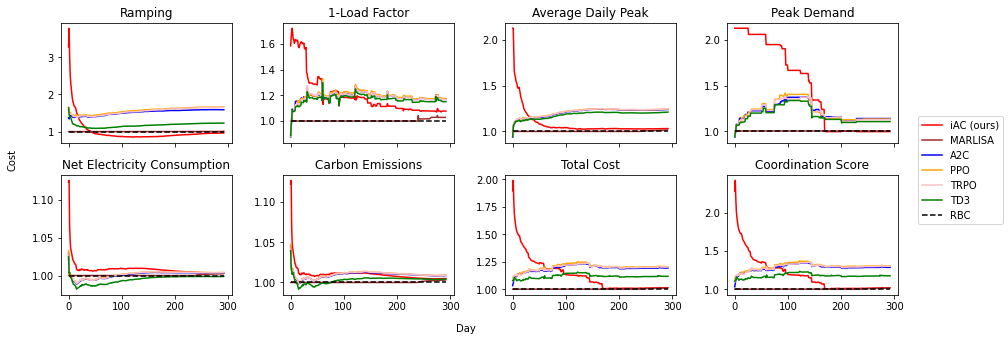

In [284]:
fig, ax = plt.subplots(2, 4, figsize=(15,5), sharex=True, sharey=False)

m = len(iAC_table["total"])


# ramping
ax[0, 0].set_title("Ramping")
ax[0, 0].plot(iAC_table["ramping"], 'r', label="iAC (ours)")
ax[0, 0].plot(marlisa_table["ramping"][-m:], color='brown', label="MARLISA")
ax[0, 0].plot(_ramping[:m], 'b', label="A2C")
ax[0, 0].plot(__ramping[:m], color='orange', label="PPO")
ax[0, 0].plot(___ramping[:m], color='pink', label="TRPO")
ax[0, 0].plot(ramping[:m], 'g', label="TD3")
ax[0, 0].plot(np.ones(m), 'k--', label="RBC")

# load factor
ax[0, 1].set_title("1-Load Factor")
ax[0, 1].plot(iAC_table["1-load_factor"], 'r', label="iAC")
ax[0, 1].plot(marlisa_table["1-load_factor"][365 - m:], color='brown', label="MARLISA")
ax[0, 1].plot(_load_factor[:m], 'b', label="A2C")
ax[0, 1].plot(__load_factor[:m], color='orange', label="PPO")
ax[0, 1].plot(___load_factor[:m], color='pink', label="TRPO")
ax[0, 1].plot(load_factor[:m], 'g', label="TD3")
ax[0, 1].plot(np.ones(m), 'k--', label="RBC")

# average daily peak
ax[0, 2].set_title("Average Daily Peak")
ax[0, 2].plot(iAC_table["average_daily_peak"], 'r', label="iAC")
ax[0, 2].plot(marlisa_table["average_daily_peak"][365 - m:], color='brown', label="MARLISA")
ax[0, 2].plot(_average_daily_peak[:m], 'b', label="A2C")
ax[0, 2].plot(__average_daily_peak[:m], color='orange', label="PPO")
ax[0, 2].plot(___average_daily_peak[:m], color='pink', label="TRPO")
ax[0, 2].plot(average_daily_peak[:m], 'g', label="TD3")
ax[0, 2].plot(np.ones(m), 'k--', label="RBC")

# Peak Demand
ax[0, 3].set_title("Peak Demand")
ax[0, 3].plot(iAC_table["peak_demand"], 'r', label="iAC")
ax[0, 3].plot(marlisa_table["peak_demand"][365 - m:], color='brown', label="MARLISA")
ax[0, 3].plot(_peak_demand[:m], 'b', label="A2C")
ax[0, 3].plot(__peak_demand[:m], color='orange', label="PPO")
ax[0, 3].plot(___peak_demand[:m], color="pink", label="TRPO")
ax[0, 3].plot(peak_demand[:m], 'g', label="TD3")
ax[0, 3].plot(np.ones(m), 'k--', label="RBC")

# Net Electricity Consumption
ax[1, 0].set_title("Net Electricity Consumption")
ax[1, 0].plot(iAC_table["net_electricity_consumption"], 'r', label="iAC")
ax[1, 0].plot(marlisa_table["net_electricity_consumption"][365 - m:], color='brown', label="MARLISA")
ax[1, 0].plot(_net_electricity_consumption[:m], 'b', label="A2C")
ax[1, 0].plot(__net_electricity_consumption[:m], color='orange', label="PPO")
ax[1, 0].plot(___net_electricity_consumption[:m], color="pink", label="TRPO")
ax[1, 0].plot(net_electricity_consumption[:m], 'g', label="TD3")
ax[1, 0].plot(np.ones(m), 'k--', label="RBC")

# Carbon Emmissions
ax[1, 1].set_title("Carbon Emissions")
ax[1, 1].plot(iAC_table["carbon_emissions"], 'r', label="iAC")
ax[1, 1].plot(marlisa_table["carbon_emissions"][365 - m:], color='brown', label="MARLISA")
ax[1, 1].plot(_carbon_emissions[:m], 'b', label="A2C")
ax[1, 1].plot(__carbon_emissions[:m], color='orange', label="PPO")
ax[1, 1].plot(___carbon_emissions[:m], color="pink", label="TRPO")
ax[1, 1].plot(carbon_emissions[:m], 'g', label="TD3")
ax[1, 1].plot(np.ones(m), 'k--', label="RBC")

# Total
ax[1, 2].set_title("Total Cost")
ax[1, 2].plot(iAC_table["total"], 'r', label="iAC")
ax[1, 2].plot(marlisa_table["total"][365 - m:], color='brown', label="MARLISA")
ax[1, 2].plot(_total[:m], 'b', label="A2C")
ax[1, 2].plot(__total[:m], color='orange', label="PPO")
ax[1, 2].plot(___total[:m], color="pink", label="TRPO")
ax[1, 2].plot(total[:m], 'g', label="TD3")
ax[1, 2].plot(np.ones(m), 'k--', label="RBC")

# Coordination Score
ax[1, 3].set_title("Coordination Score")
ax[1, 3].plot(iAC_table["coordination_score"], 'r', label="iAC")
ax[1, 3].plot(marlisa_table["coordination_score"][365 - m:], color='brown', label="MARLISA")
ax[1, 3].plot(_coordination_score[:m], 'b', label="A2C")
ax[1, 3].plot(__coordination_score[:m], color='orange', label="PPO")
ax[1, 3].plot(___coordination_score[:m], color="pink", label="TRPO")
ax[1, 3].plot(coordination_score[:m], 'g', label="TD3")
ax[1, 3].plot(np.ones(m), 'k--', label="RBC")

# legend and axis
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', ncol=1)
fig.text(0.5, 0.03, 'Day', ha='center', va='center')
fig.text(0.08, 0.5, 'Cost', ha='center', va='center', rotation='vertical')

plt.subplots_adjust(wspace=0.3, hspace=0.27)

plt.show()